In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [3]:
data = pd.read_excel('data.xlsx')
data.set_index('Year', inplace=True)

In [4]:
data

BDI-Population, total  BDI-Population growth (annual %)  \
Year                                                            
2005                7388874                          3.699797   
2006                7658190                          3.580031   
2007                7944609                          3.671792   
2008                8278109                          4.112098   
2009                8709366                          5.078444   
2010                9126605                          4.679478   
2011                9455733                          3.542745   
2012                9795479                          3.529973   
2013               10149577                          3.551108   
2014               10494913                          3.345863   
2015               10727148                          2.188706   
2016               10903327                          1.629025   
2017               11155593                          2.287301   
2018               11493472                          2.983824   
2019               11874838                          3.264249   
2020               12220227                          2.867082   
2021               12551213                          2.672478   
2022               12889576                          2.660161   

      BDI-Population density (people per sq. km of land area)  \
Year                                                            
2005                                         287.728738         
2006                                         298.216121         
2007                                         309.369509         
2008                                         322.356269         
2009                                         339.149766         
2010                                         355.397391         
2011                                         368.213902         
2012                                         381.443886         
2013                                         395.232749         
2014                                         408.680413         
2015                                         417.723832         
2016                                         424.584385         
2017                                         434.407827         
2018                                         447.565109         
2019                                         462.415810         
2020                                         475.865537         
2021                                         488.754400         
2022                                         488.754400         

      BDI-GNI, Atlas method (current US$)  \
Year                                        
2005                         9.955266e+08   
2006                         1.175593e+09   
2007                         1.332125e+09   
2008                         1.516882e+09   
2009                         1.667672e+09   
2010                         1.895261e+09   
2011                         2.104212e+09   
2012                         2.314488e+09   
2013                         2.477671e+09   
2014                         2.602424e+09   
2015                         2.652740e+09   
2016                         2.698514e+09   
2017                         2.772947e+09   
2018                         2.751049e+09   
2019                         2.752978e+09   
2020                         2.699979e+09   
2021                         2.815868e+09   
2022                         3.117740e+09   

      BDI-GNI per capita, Atlas method (current US$)  \
Year                                                   
2005                                             130   
2006                                             150   
2007                                             170   
2008                                             180   
2009                                             190   
2010                                             210   
2011                                             220   

In [5]:
# Identify the target variable and exogenous variables for SARIMAX modeling

y = data['container_port_traffic']
X = data.drop('container_port_traffic', axis=1)

sarimax_model = SARIMAX(y, exog=X, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_model = sarimax_model.fit()

sarimax_model.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          138     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.77735D+00    |proj g|=  7.62838D+24


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  138      1     21      1     0     0   7.628D+24  -1.777D+00
  F =  -1.7773495071578707     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:             container_port_traffic   No. Observations:                   18
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  31.992
Date:                            Fri, 02 Feb 2024   AIC                            212.015
Time:                                    21:01:11   BIC                            158.118
Sample:                                         0   HQIC                            67.360
                                             - 18                                         
Covariance Type:                              opg                                         
=======================================================================================================================================
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
BDI-Population, total                                               -9.002e-11   2.24e-15  -4.03e+04      0.000      -9e-11      -9e-11
BDI-Population growth (annual %)                                     8.098e-16   9.66e-21   8.38e+04      0.000     8.1e-16     8.1e-16
BDI-Population density (people per sq. km of land area)             -1.201e-15   1.13e-19  -1.07e+04      0.000    -1.2e-15    -1.2e-15
BDI-GNI, Atlas method (current US$)                                  2.127e-07      7e-12   3.04e+04      0.000    2.13e-07    2.13e-07
BDI-GNI per capita, Atlas method (current US$)                       3.125e-14   8.63e-19   3.62e+04      0.000    3.13e-14    3.13e-14
BDI-GNI, PPP (current international $)                               3.186e-08   4.47e-12   7134.680      0.000    3.18e-08    3.19e-08
BDI-GNI per capita, PPP (current international $)                    2.062e-14   6.66e-19    3.1e+04      0.000    2.06e-14    2.06e-14
BDI-Urban population growth (annual %)                               8.086e-16   9.97e-21   8.11e+04      0.000    8.09e-16    8.09e-16
BDI-GDP (current US$)                                                1.457e-07   6.81e-12   2.14e+04      0.000    1.46e-07    1.46e-07
BDI-GDP growth (annual %)                                           -2.781e-15   1.54e-20  -1.81e+05      0.000   -2.78e-15   -2.78e-15
BDI-Inflation, GDP deflator (annual %)                               1.279e-14   2.76e-19   4.63e+04      0.000    1.28e-14    1.28e-14
BDI-Industry (including construction), value added (% of GDP)        2.677e-15   8.05e-21   3.33e+05      0.000    2.68e-15    2.68e-15
BDI-Exports of goods and services (% of GDP)                         3.327e-15   7.89e-20   4.21e+04      0.000    3.33e-15    3.33e-15
BDI-Imports of goods and services (% of GDP)                        -3.543e-15   2.07e-20  -1.71e+05      0.000   -3.54e-15   -3.54e-15
BDI-Gross capital formation (% of GDP)                              -7.794e-15   9.97e-20  -7.82e+04      0.000   -7.79e-15   -7.79e-15
BDI-Merchandise trade (% of GDP)                                    -2.525e-14   2.43e-19  -1.04e+05      0.000   -2.52e-14   -2.52e-14
BDI-Net barter terms of trade index (2015 = 100)                    -2.323e-14   2.28e-19  -1.02e+05      0.000   -2.32e-14   -2.32e-14
BDI-Liner shipping connectivity index (maximum value in 2004 = 100)          0         -0        nan        nan           0           0
BDI-Container port traffic (TEU: 20 foot equivalent units)                   0         -0        nan        nan           0           0
COD-Population, total                                               -1.243e-09   2.96e-14   -4.2e+04      0.000   -1.24e-09   -1.24e-09
COD-P

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = 'data.xlsx'
df = pd.read_excel(file_path)

# Identify the target variable and exogenous variables for SARIMAX modeling
X = df.iloc[:, 1:134]  # Exclude the 'Year' column and select the first 10 columns as exogenous variables
y = df['container_port_traffic']

# Fit ARIMA models for each exogenous variable to make future predictions
future_exog_predictions = {}
for column in X.columns:
    model = ARIMA(df[column], order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=20)
    future_exog_predictions[column] = forecast

# Convert future exogenous variable values to a DataFrame
future_exog_df = pd.DataFrame(future_exog_predictions)

# Build and train the SARIMAX model
sarimax_model = SARIMAX(y, exog=X, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
sarimax_result = sarimax_model.fit(disp=False)

# Make predictions for the 'container_port_traffic' variable for the next 10 years
forecast_container_port_traffic = sarimax_result.get_forecast(steps=20, exog=future_exog_df)
forecast_values = forecast_container_port_traffic.predicted_mean
confidence_intervals = forecast_container_port_traffic.conf_int()

C:\Users\ygurbuz\AppData\Local\Temp\ipykernel_23388\4046497865.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# For example, let's simulate predicted values and confidence intervals (replace with actual prediction results)
# Convert predicted values and confidence intervals to a DataFrame
forecast_df_example = pd.DataFrame({
    'Year': range(2023, 2043),
    'Predicted container_port_traffic': forecast_values
})

forecast_df_example

Year  Predicted container_port_traffic
18  2023                      1.531146e+06
19  2024                      1.522449e+06
20  2025                      1.551019e+06
21  2026                      1.577829e+06
22  2027                      1.631956e+06
23  2028                      1.624207e+06
24  2029                      1.651700e+06
25  2030                      1.677584e+06
26  2031                      1.730777e+06
27  2032                      1.722098e+06
28  2033                      1.748665e+06
29  2034                      1.773626e+06
30  2035                      1.825900e+06
31  2036                      1.816306e+06
32  2037                      1.841962e+06
33  2038                      1.866015e+06
34  2039                      1.917385e+06
35  2040                      1.906892e+06
36  2041                      1.931652e+06
37  2042                      1.954814e+06

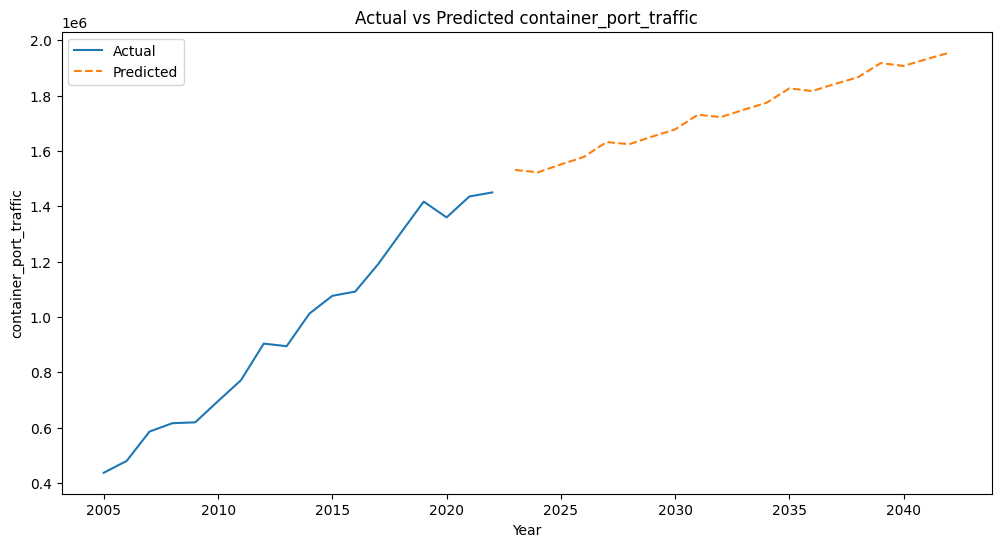

In [4]:
import matplotlib.pyplot as plt

# Plot 1: Time series plot for 'container_port_traffic' variable
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['container_port_traffic'], label='Actual')
plt.plot(forecast_df_example['Year'], forecast_df_example['Predicted container_port_traffic'], label='Predicted', linestyle='dashed')
plt.title('Actual vs Predicted container_port_traffic')
plt.xlabel('Year')
plt.ylabel('container_port_traffic')
plt.legend()
plt.show()


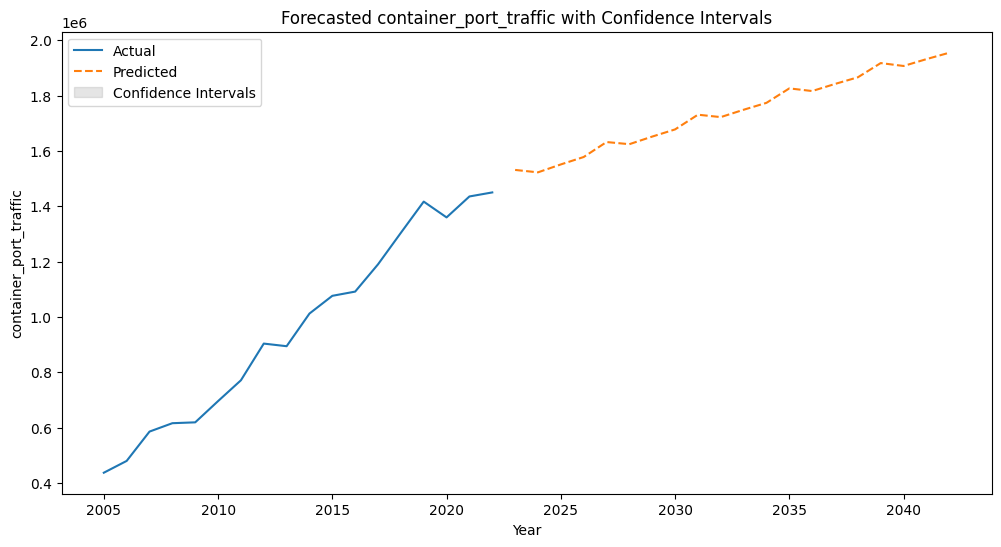

In [5]:
# Plot 2: Forecasted values and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['container_port_traffic'], label='Actual')
plt.plot(forecast_df_example['Year'], forecast_df_example['Predicted container_port_traffic'], label='Predicted', linestyle='dashed')
plt.fill_between(forecast_df_example['Year'], confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='gray', alpha=0.2, label='Confidence Intervals')
plt.title('Forecasted container_port_traffic with Confidence Intervals')
plt.xlabel('Year')
plt.ylabel('container_port_traffic')
plt.legend()
plt.show()

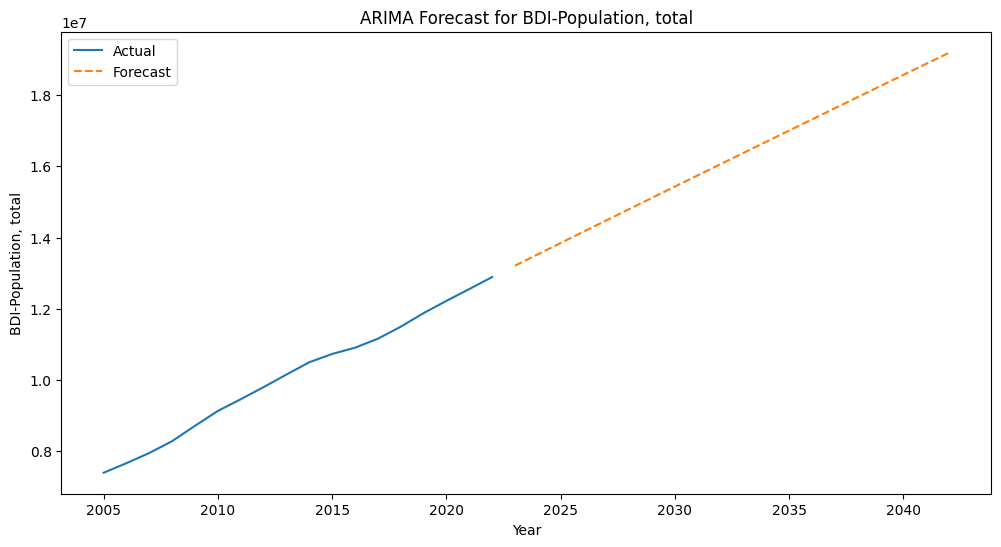

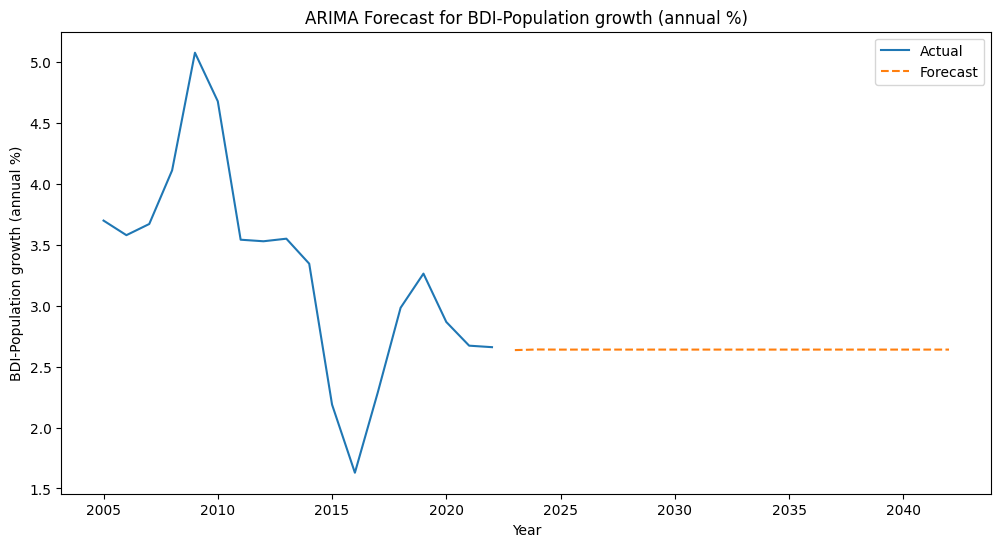

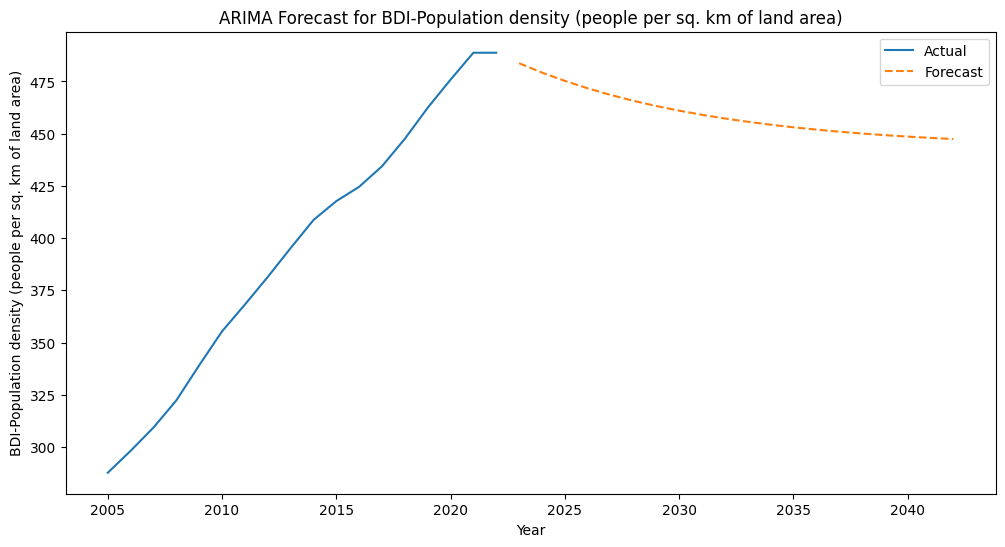

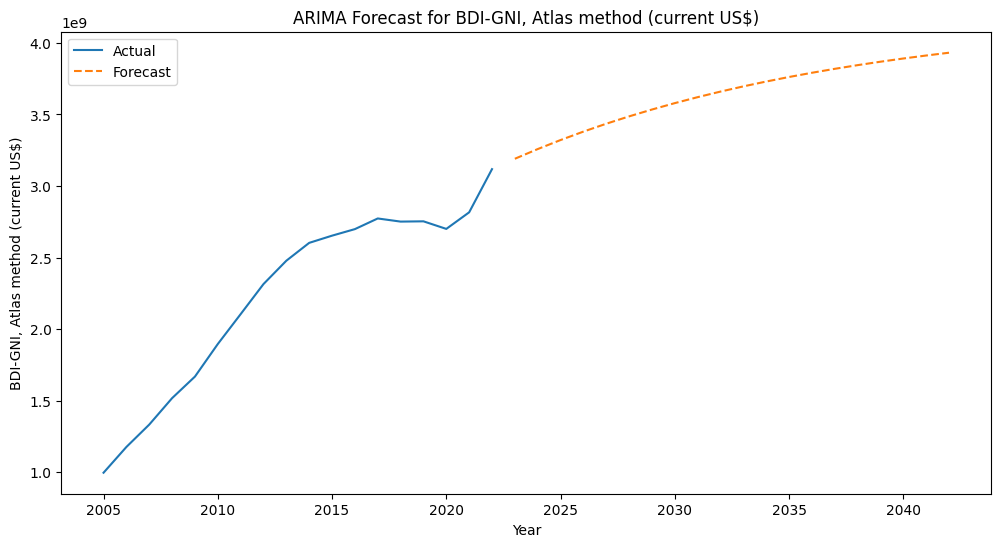

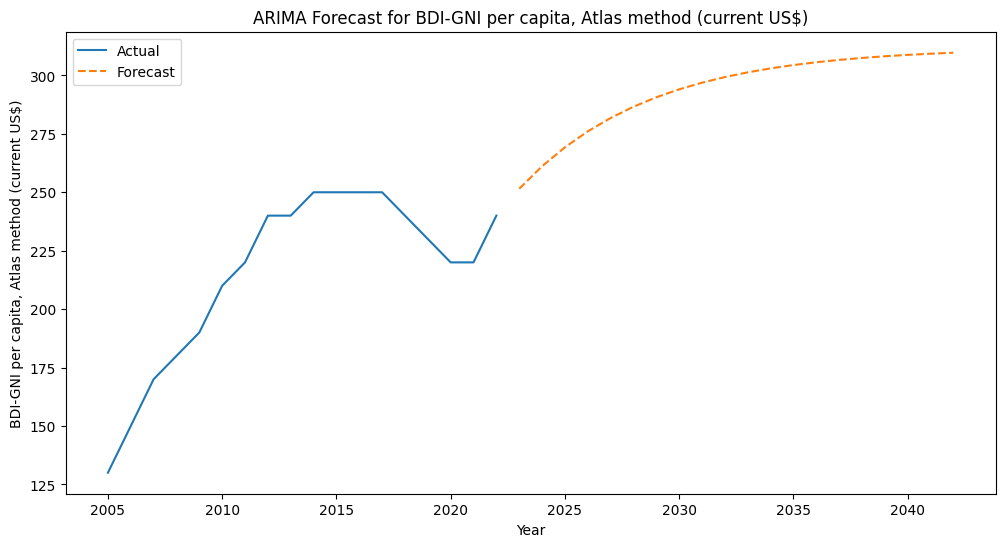

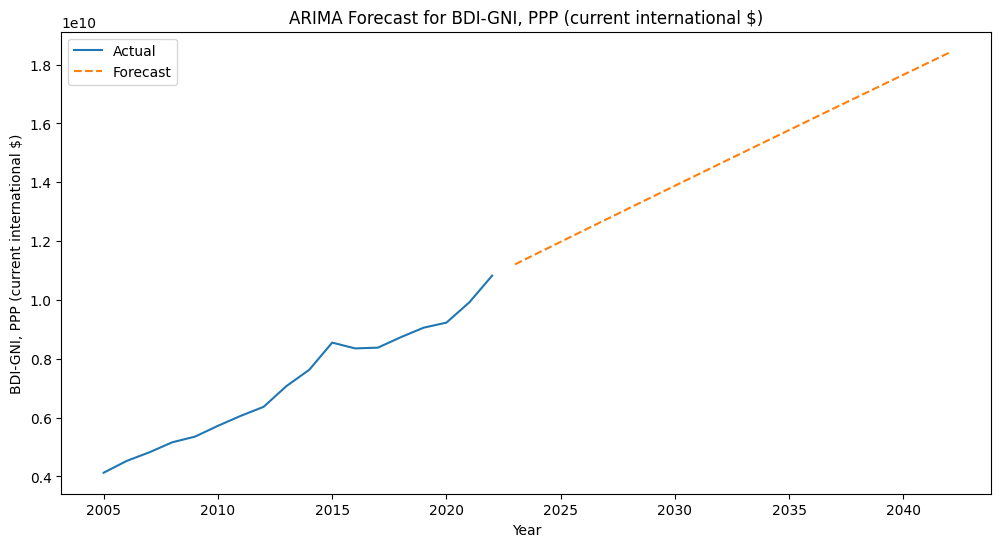

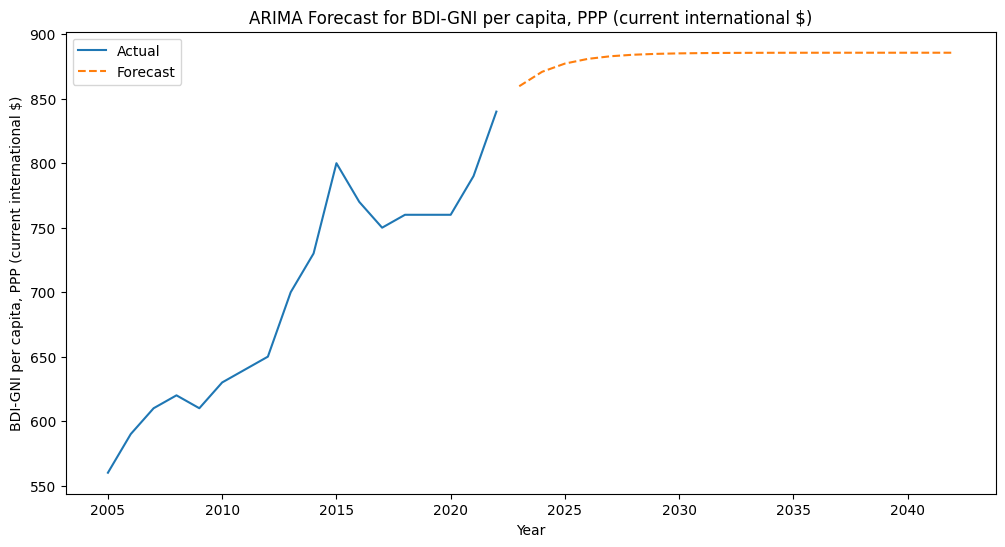

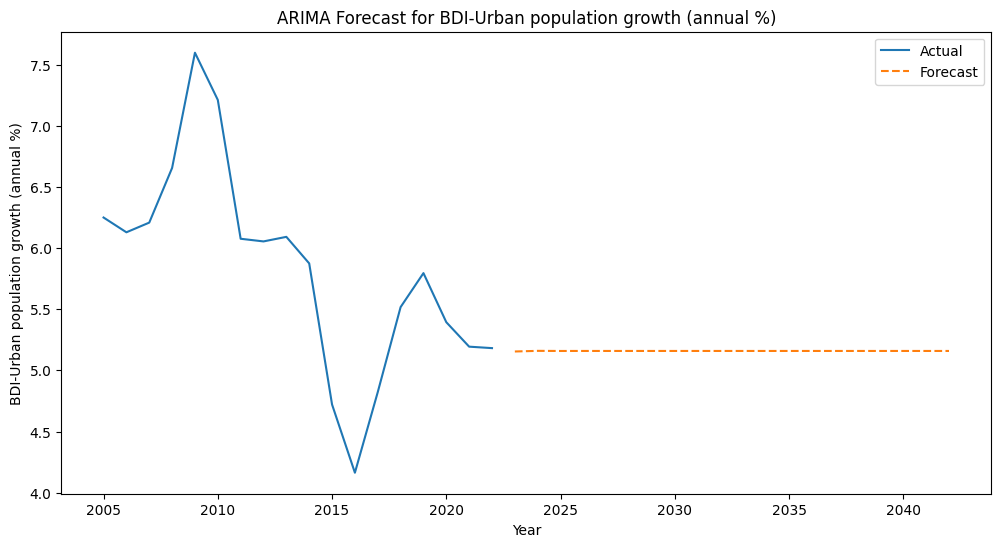

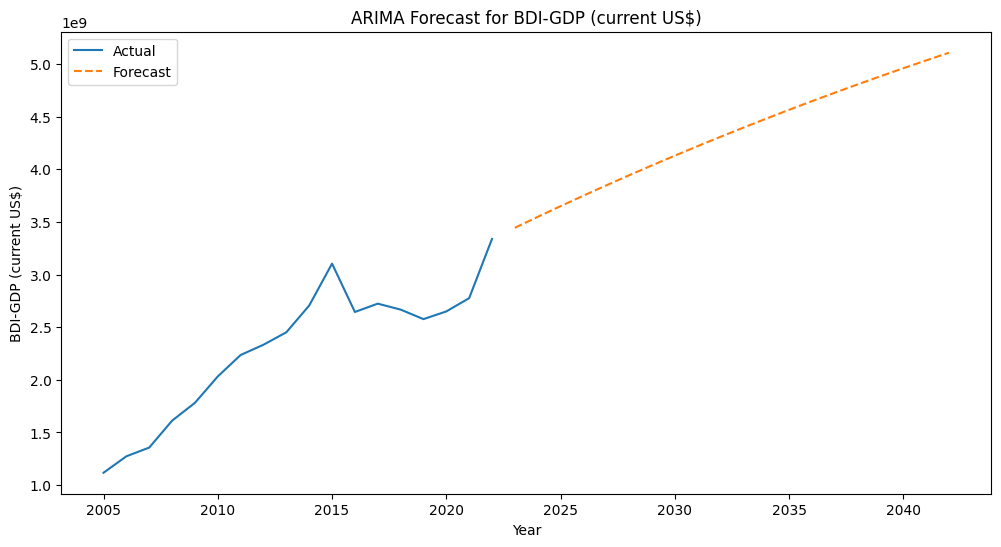

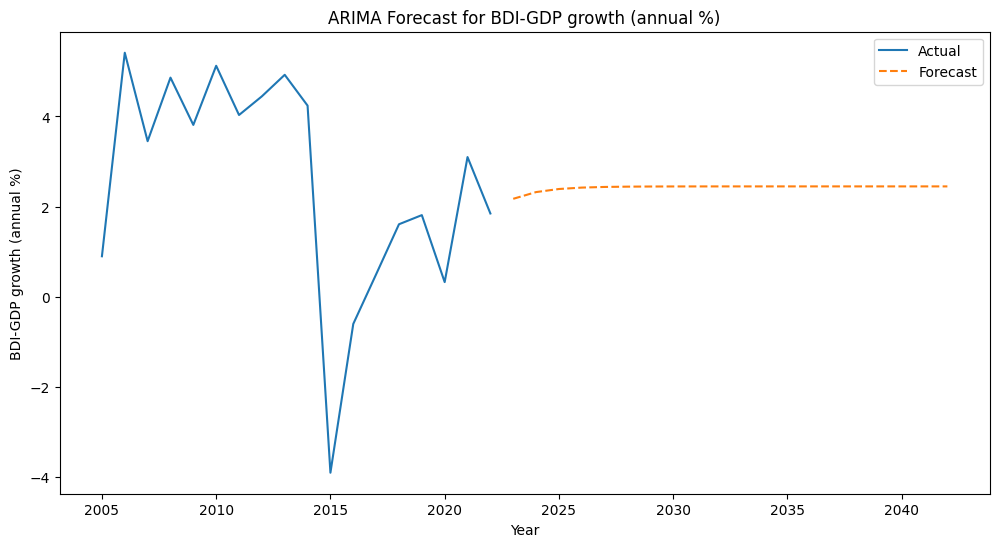

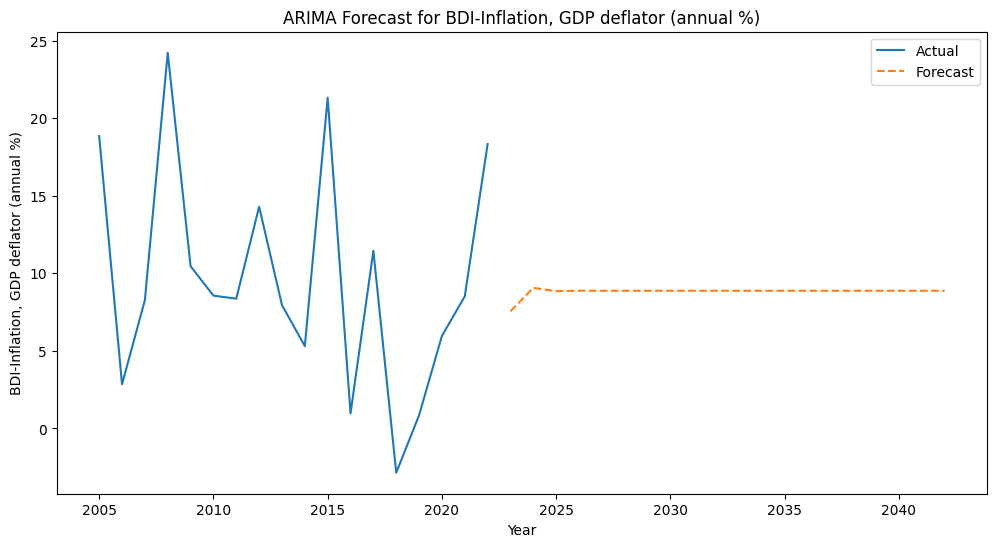

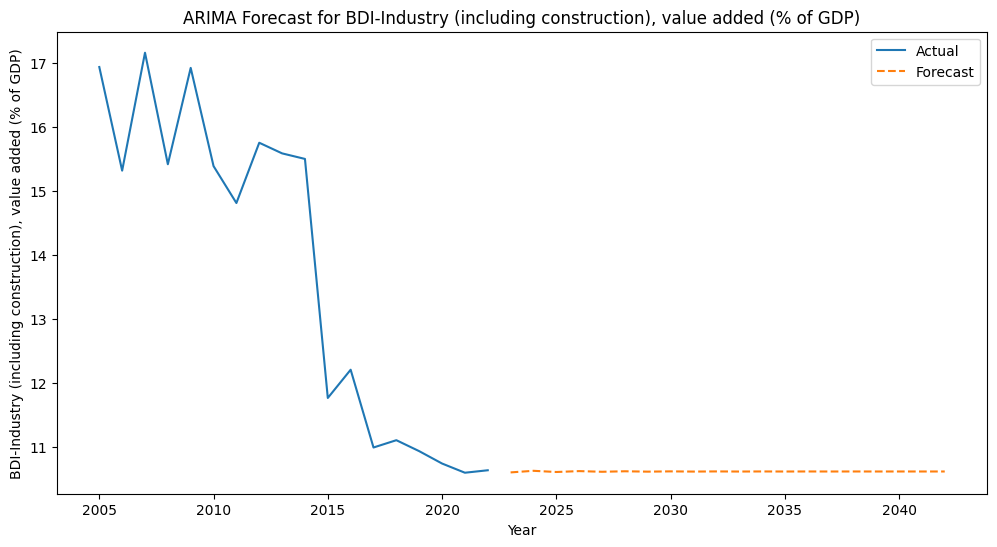

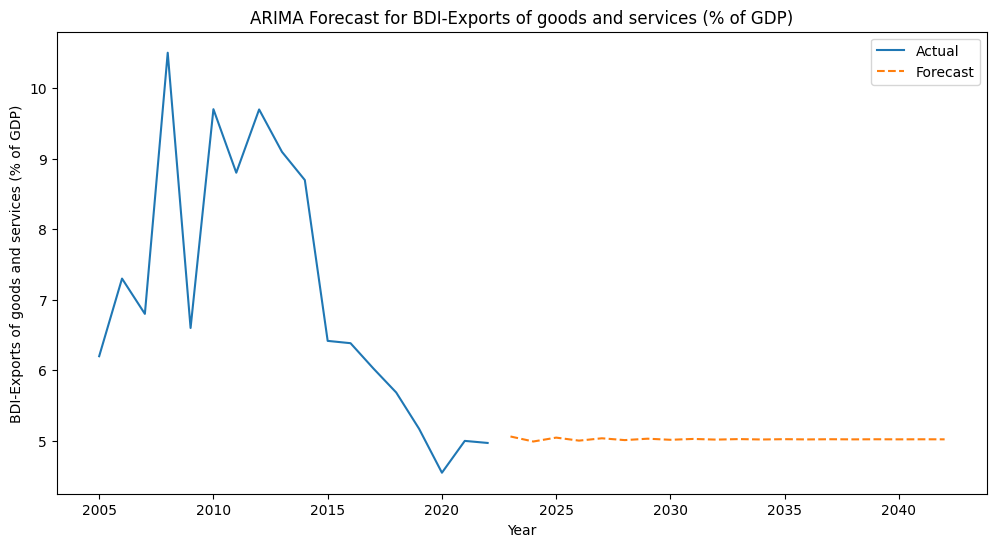

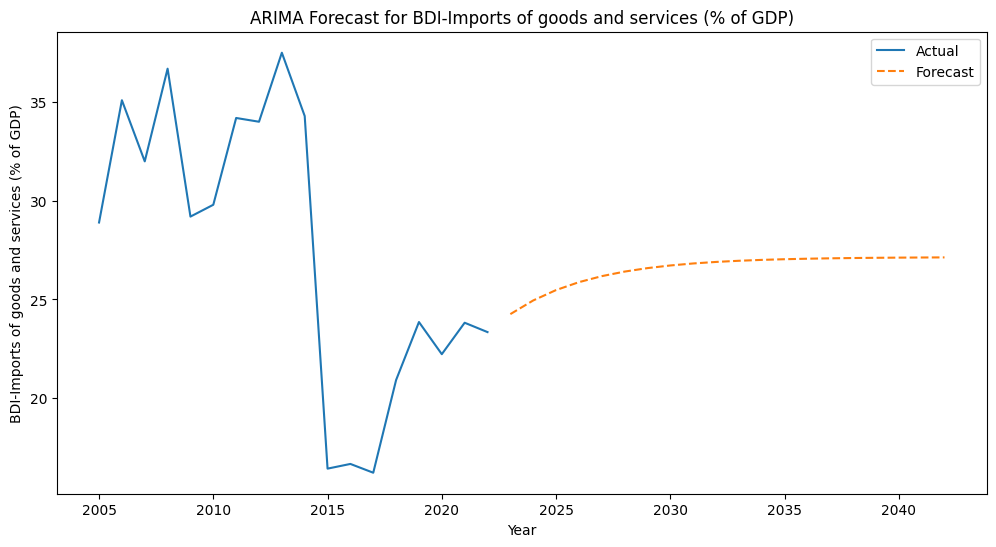

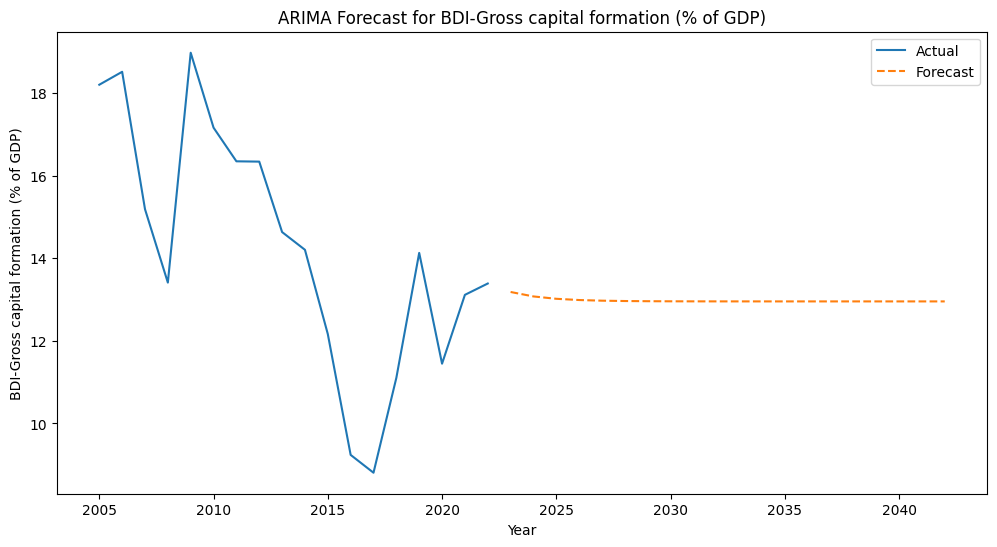

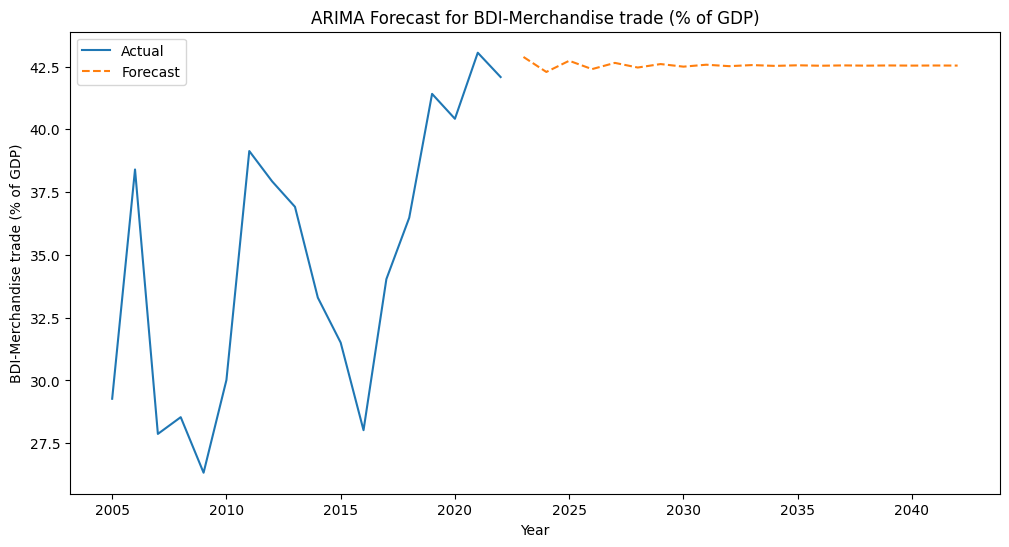

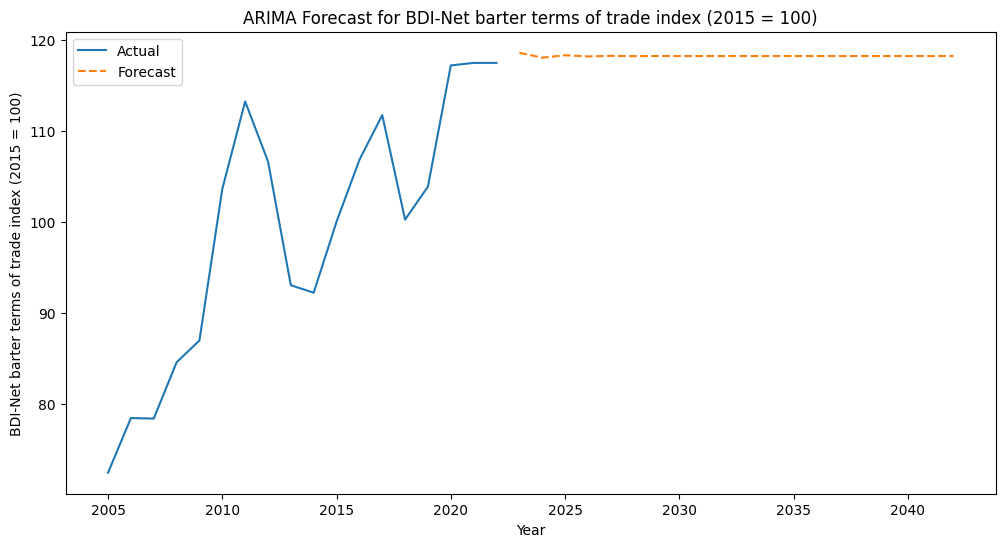

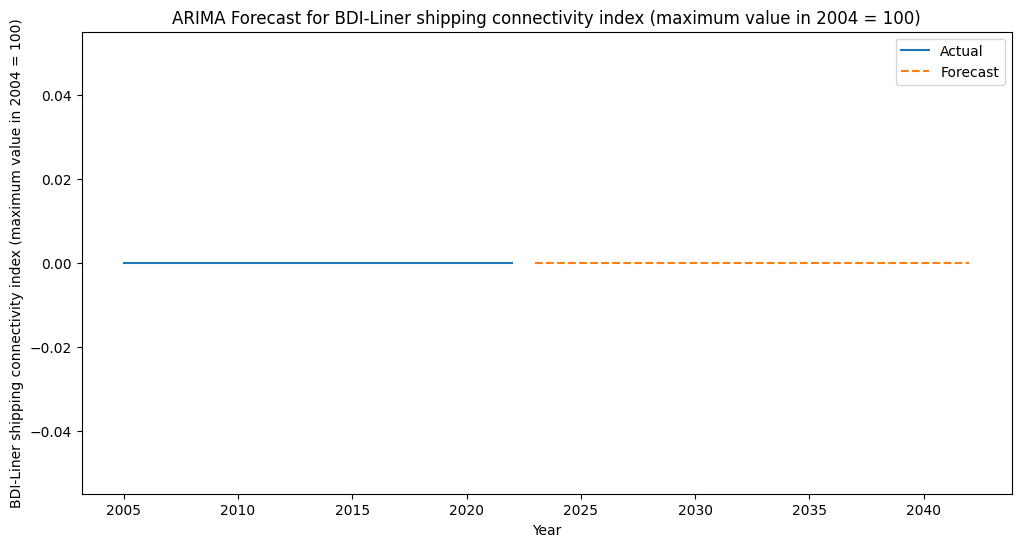

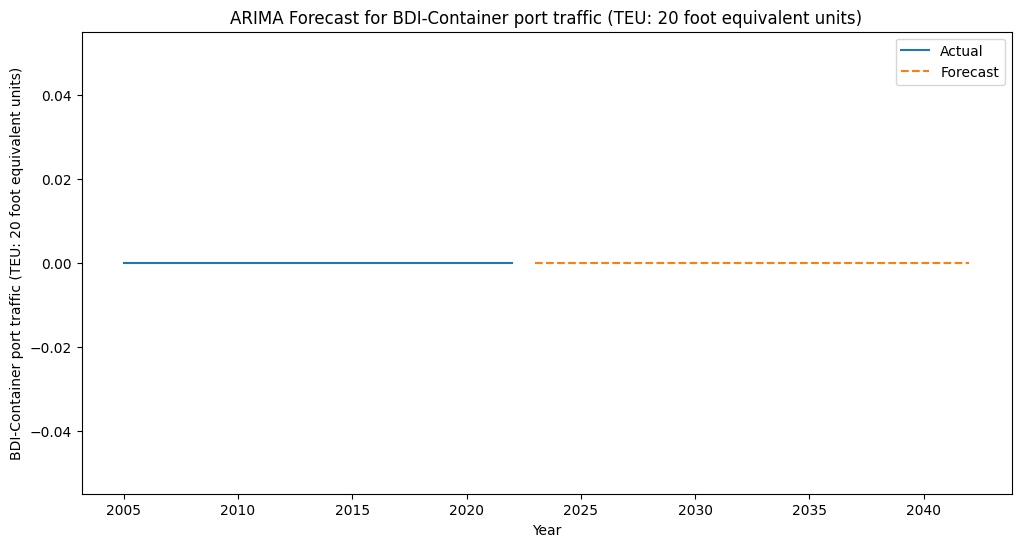

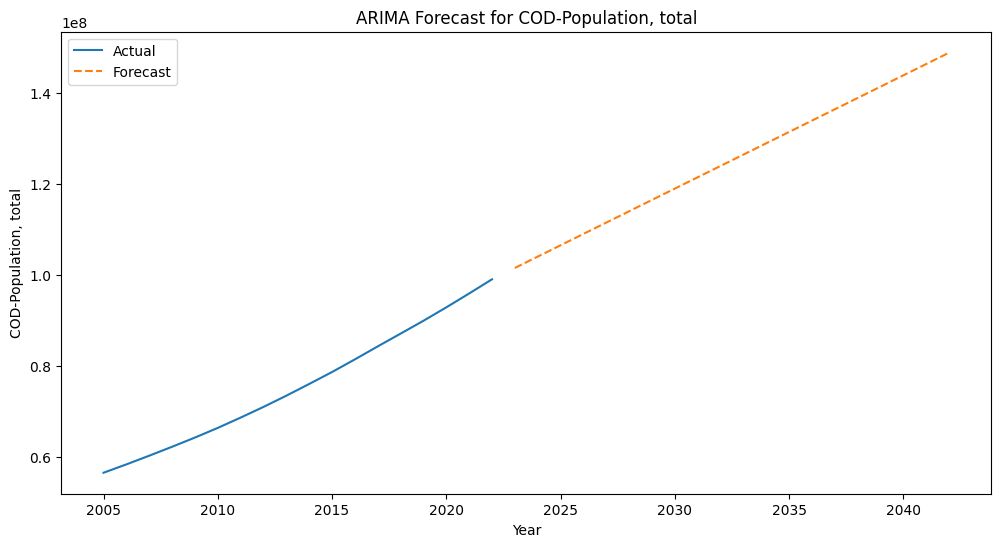

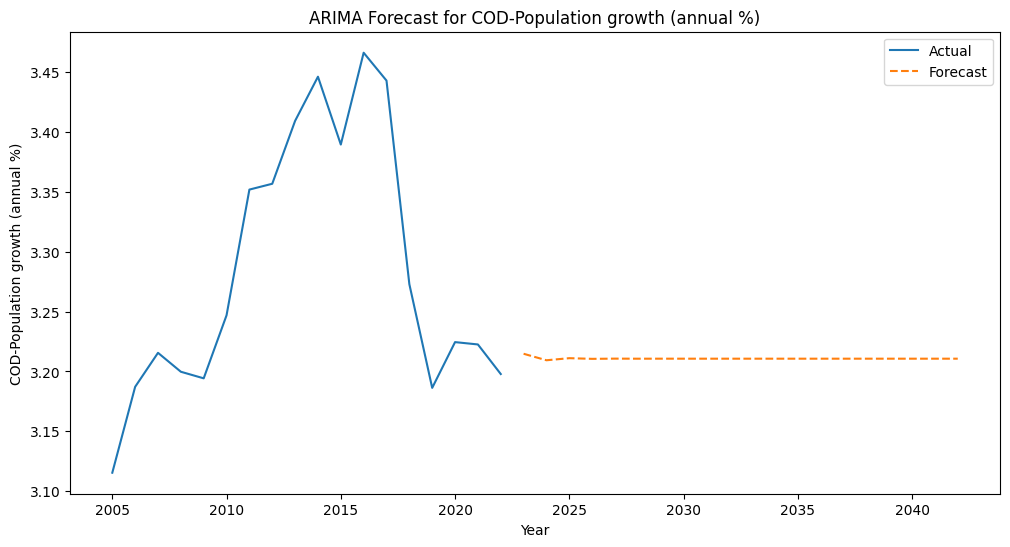

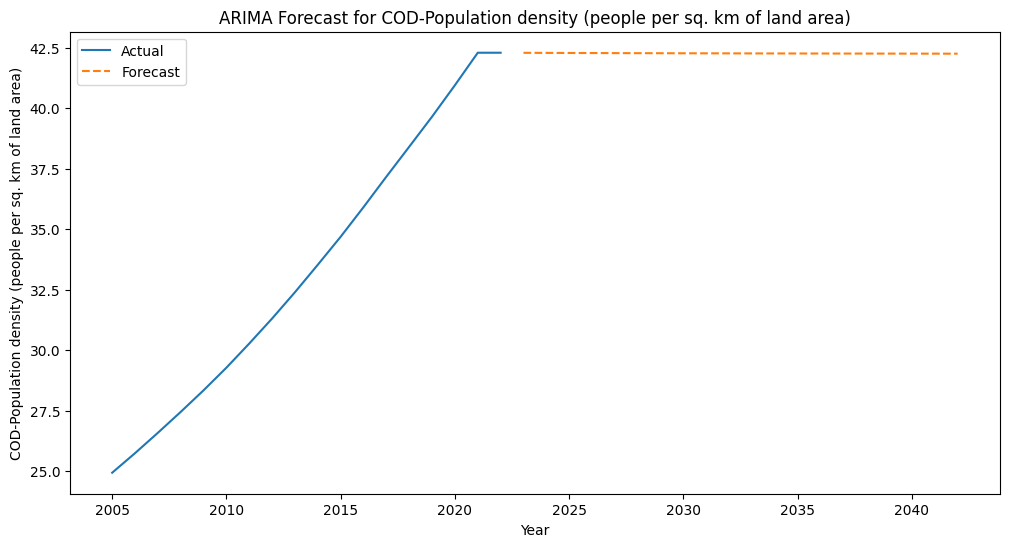

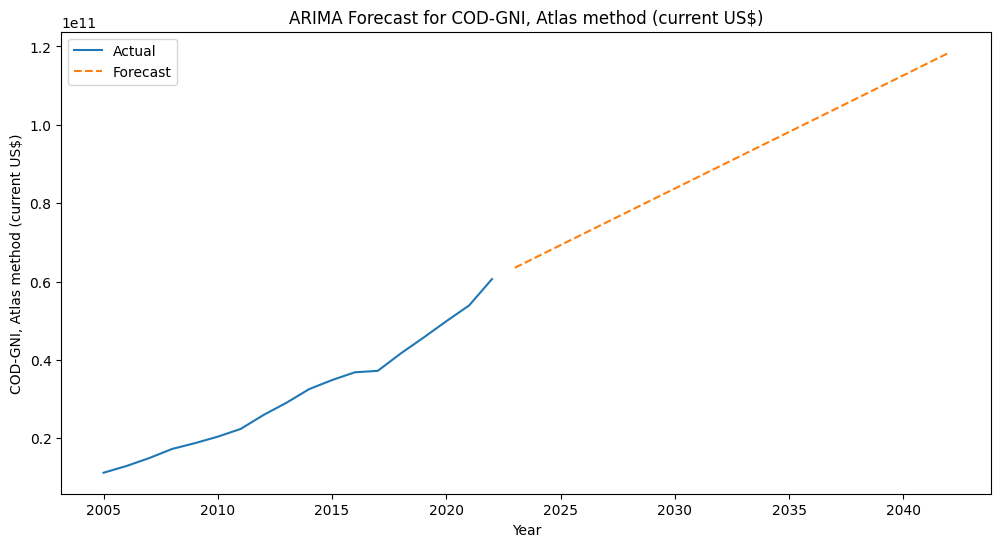

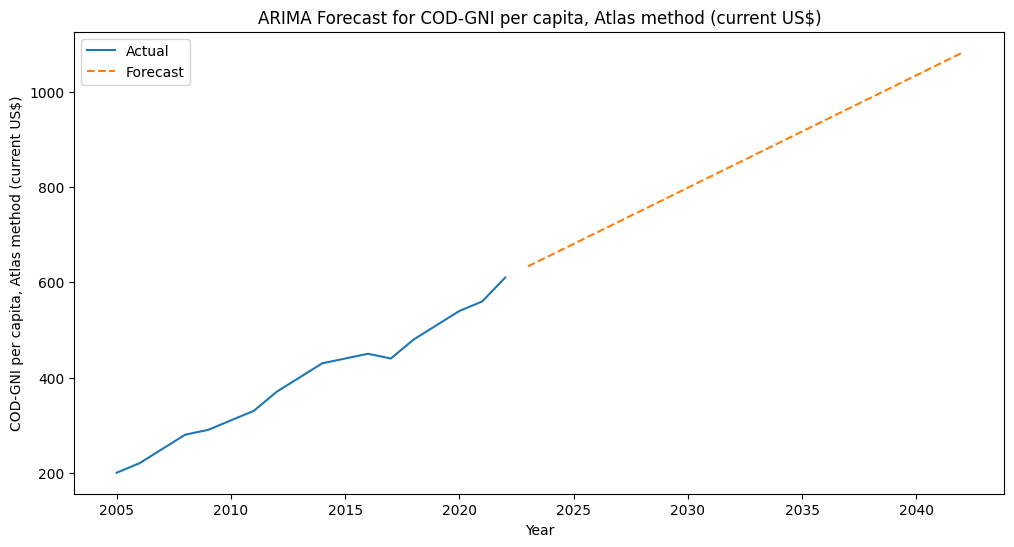

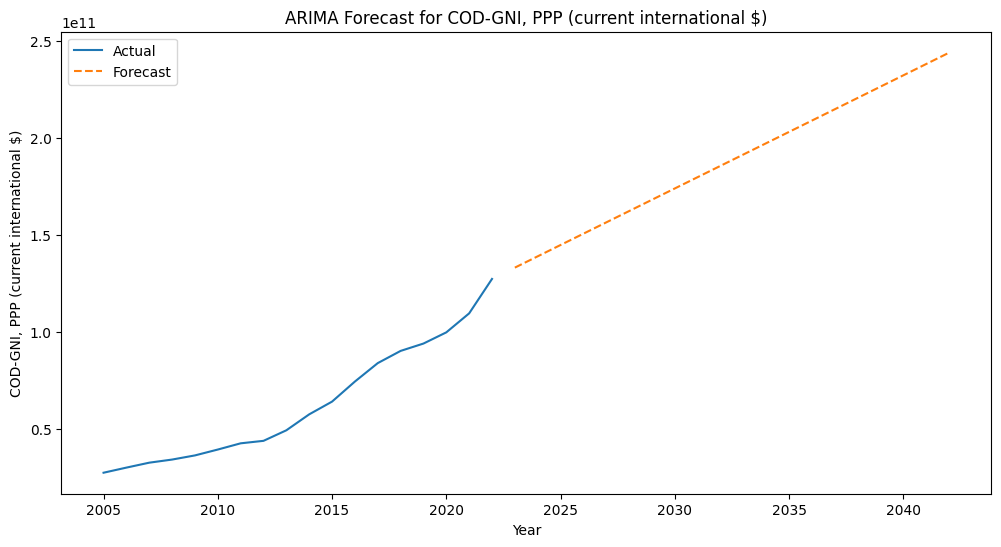

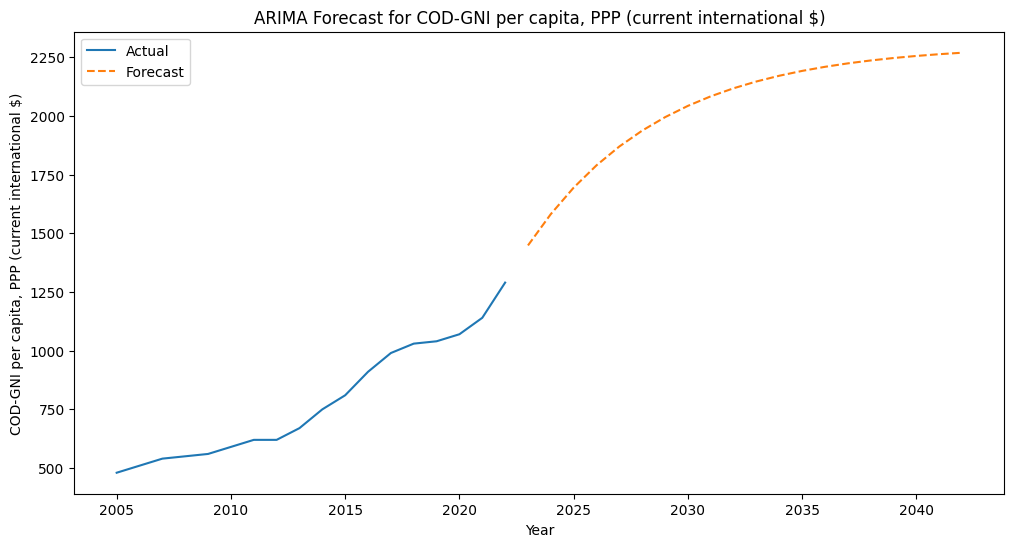

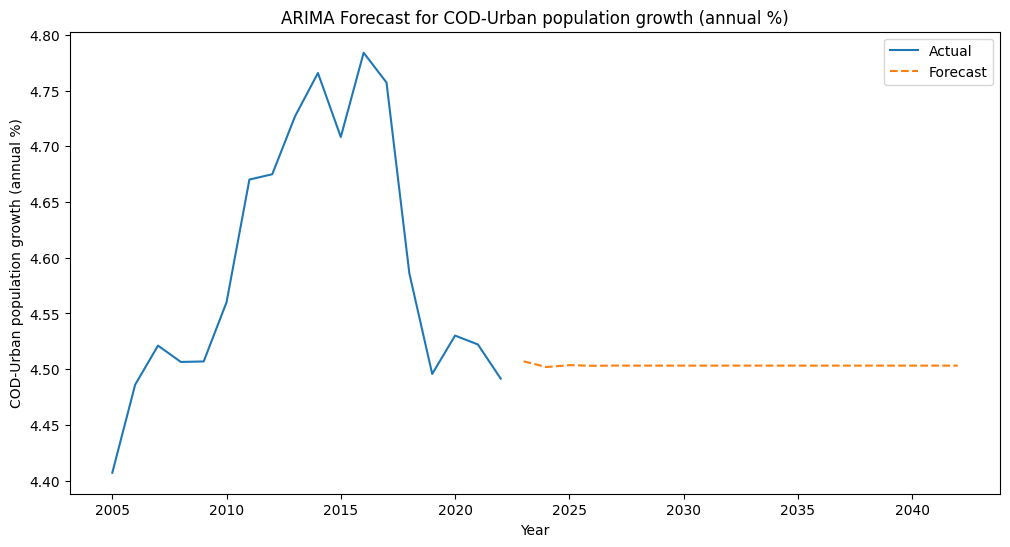

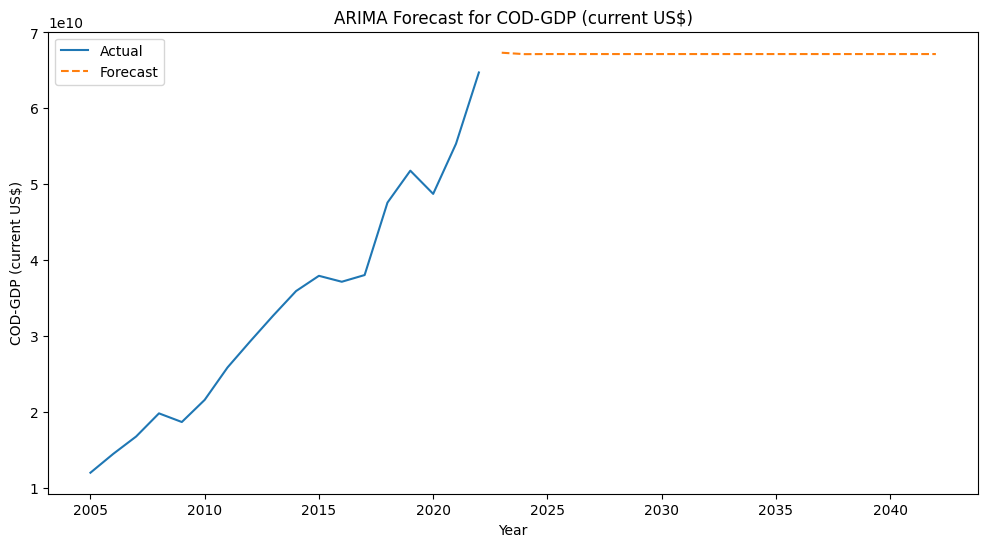

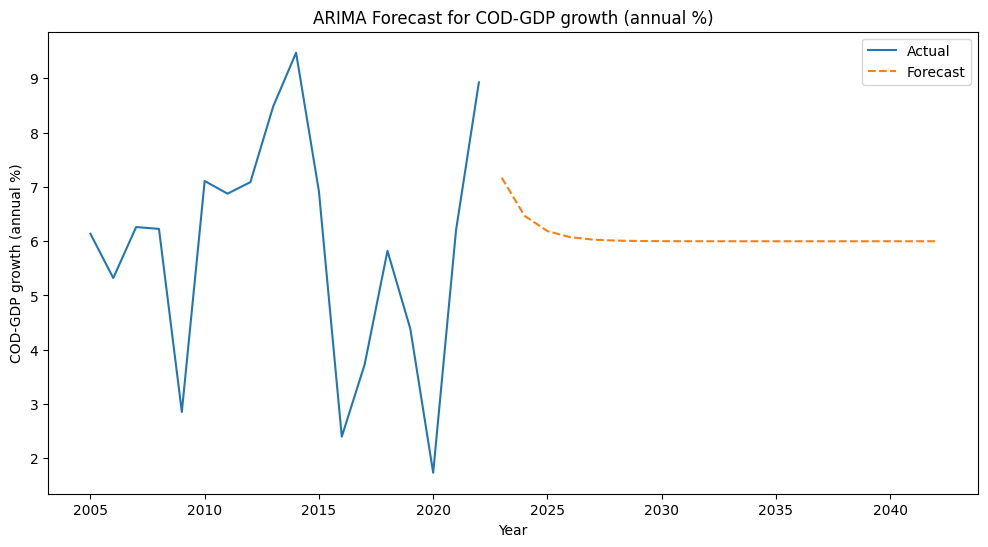

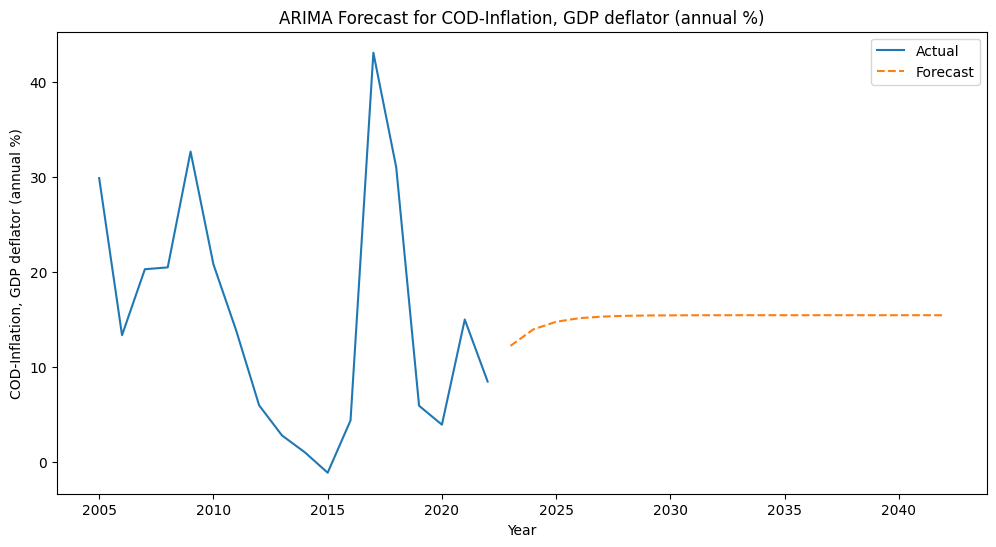

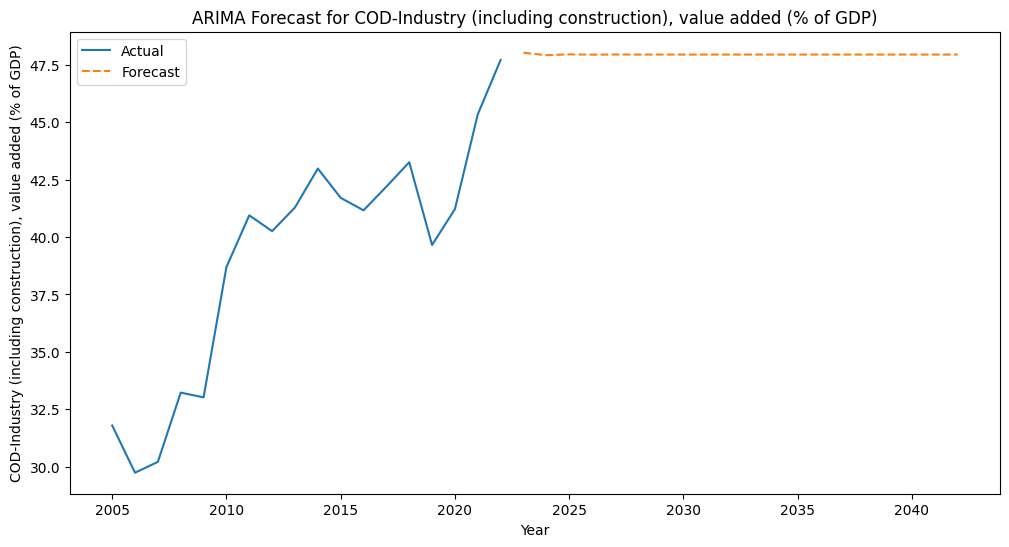

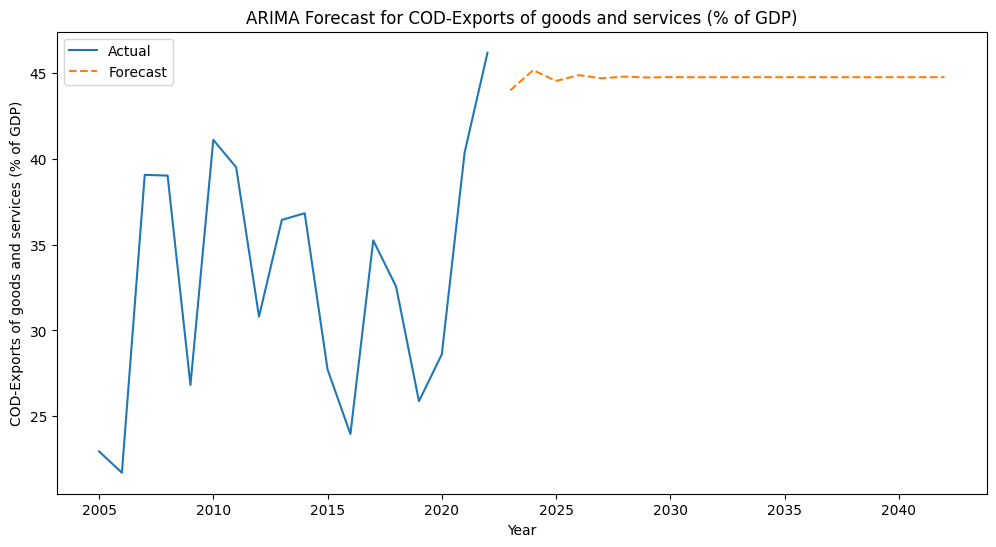

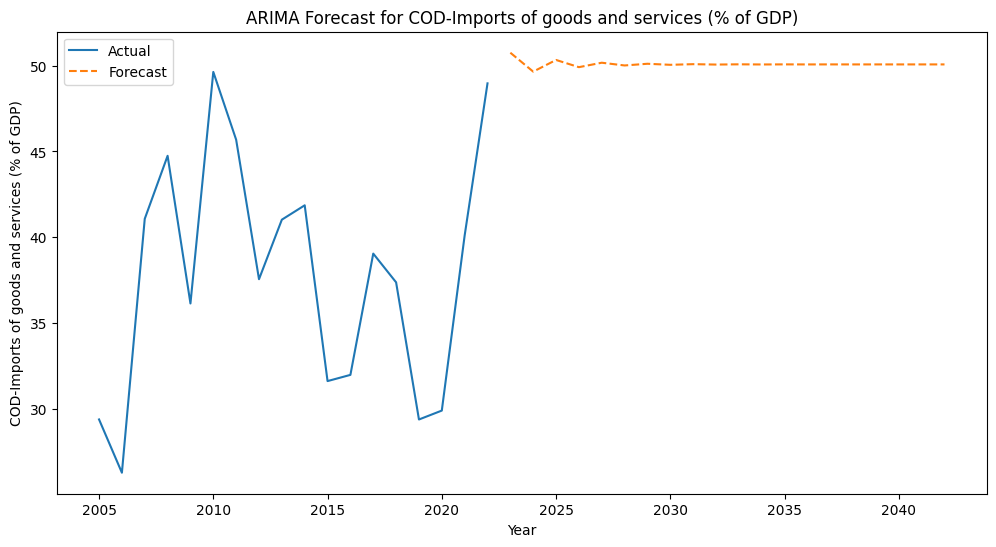

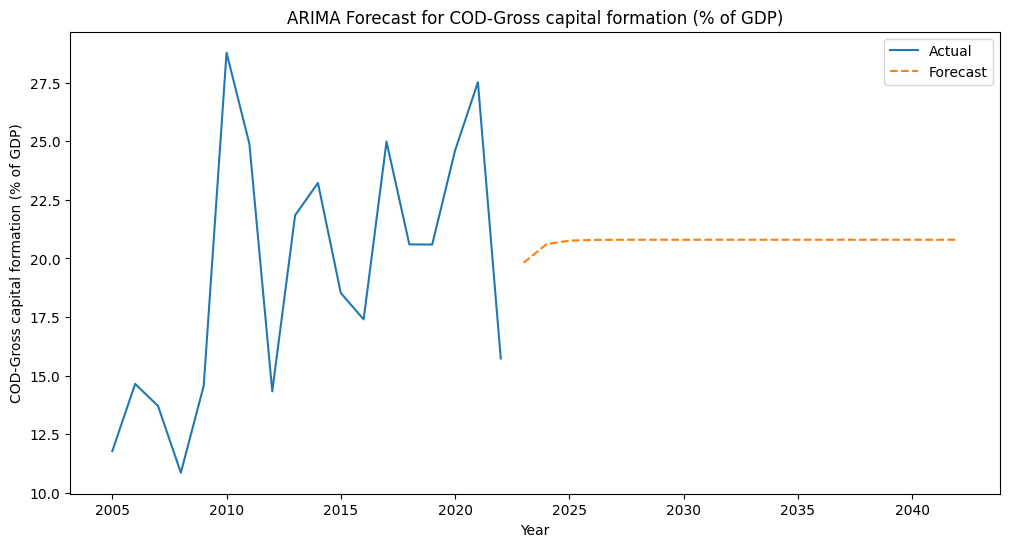

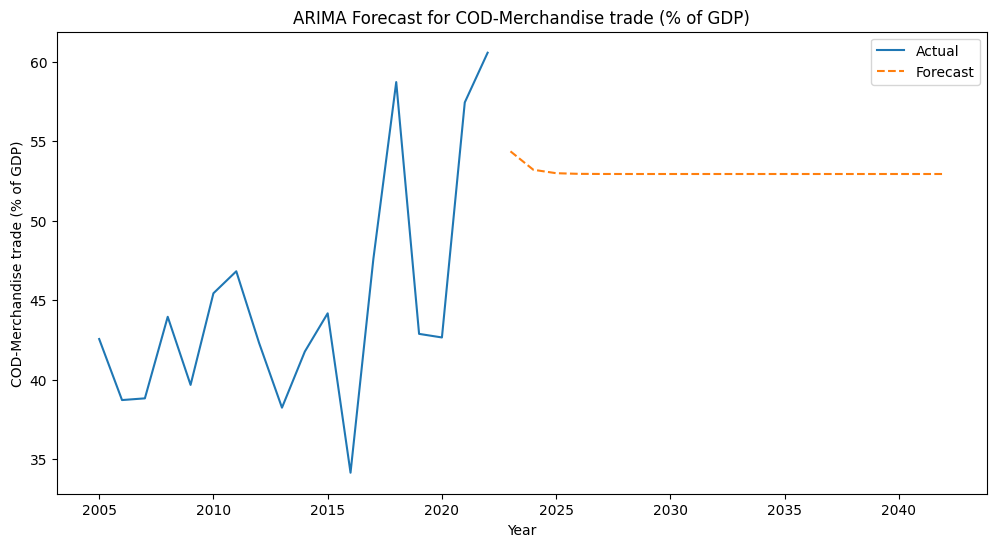

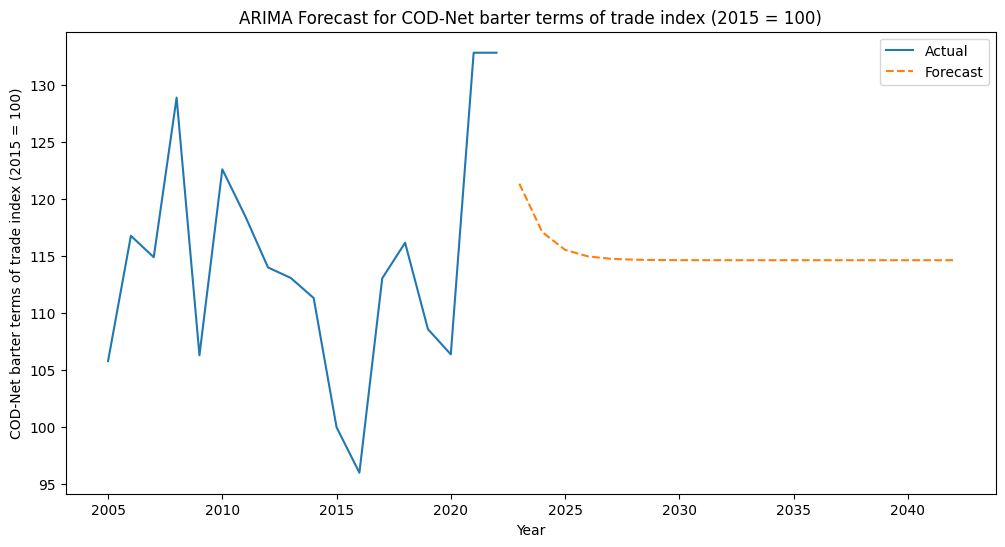

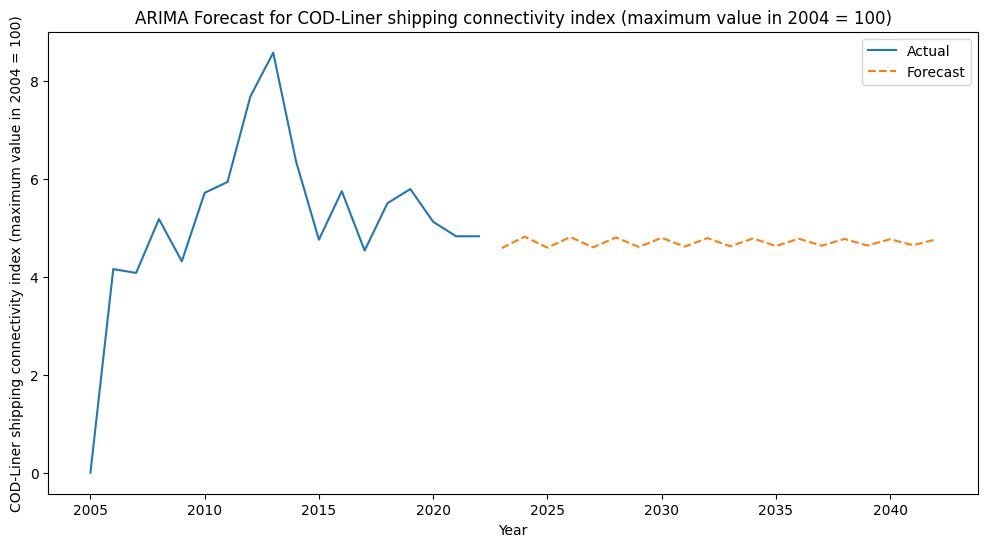

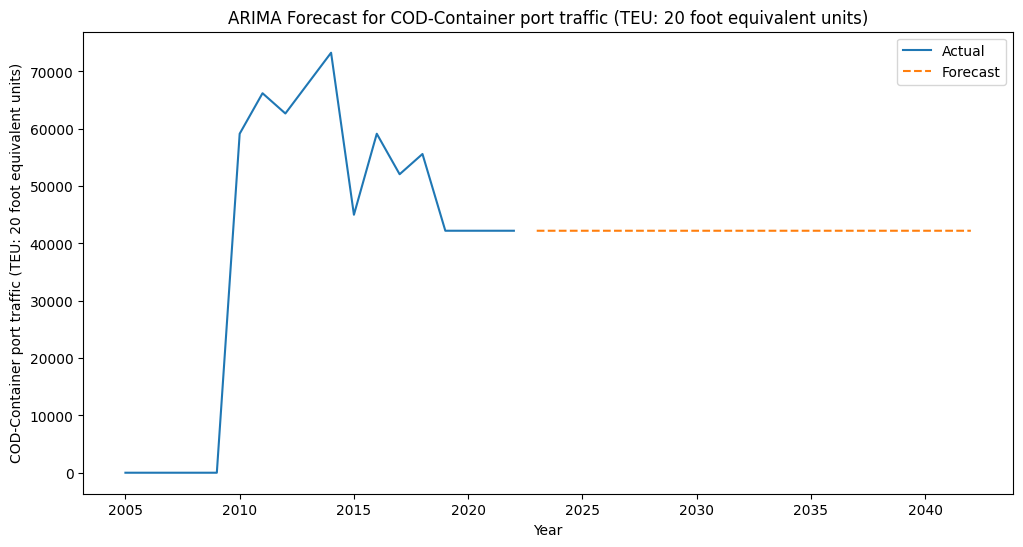

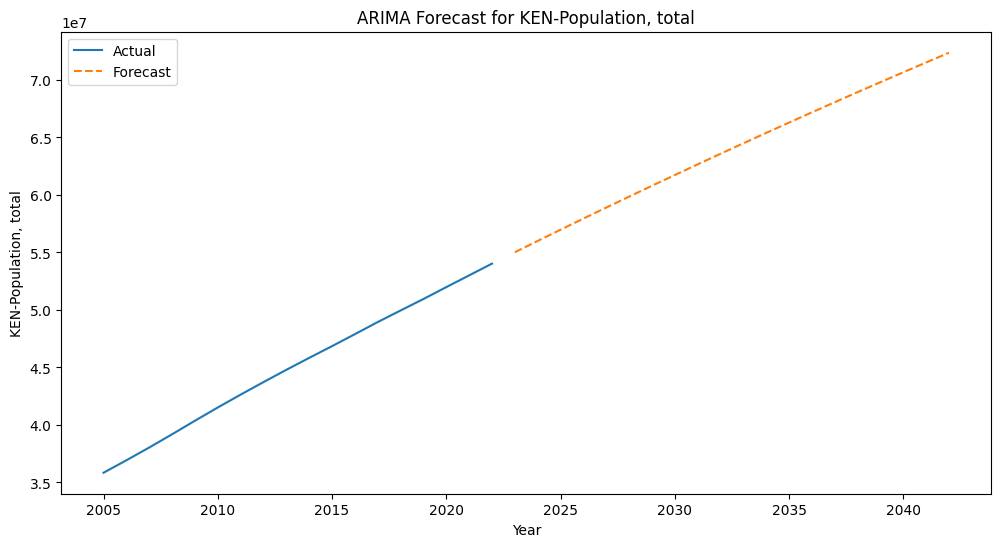

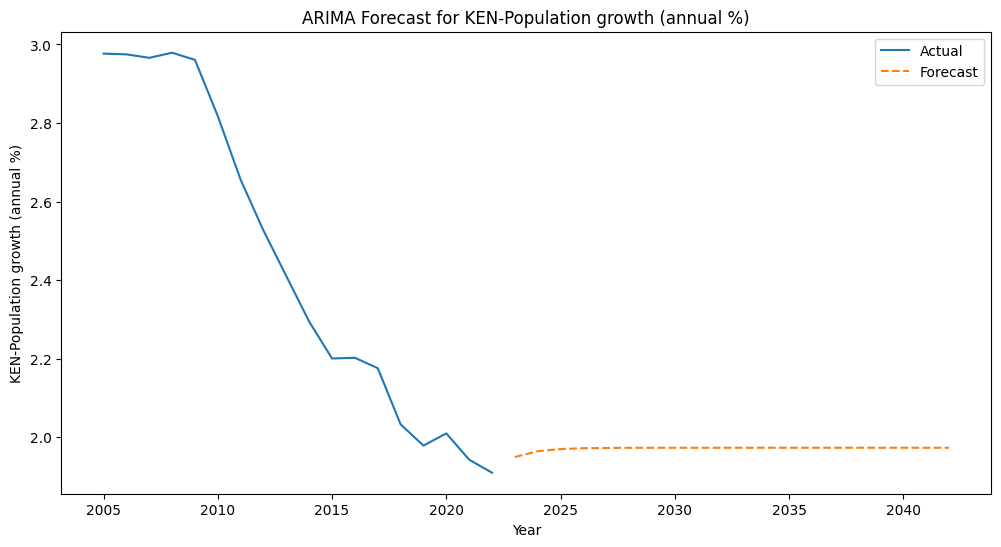

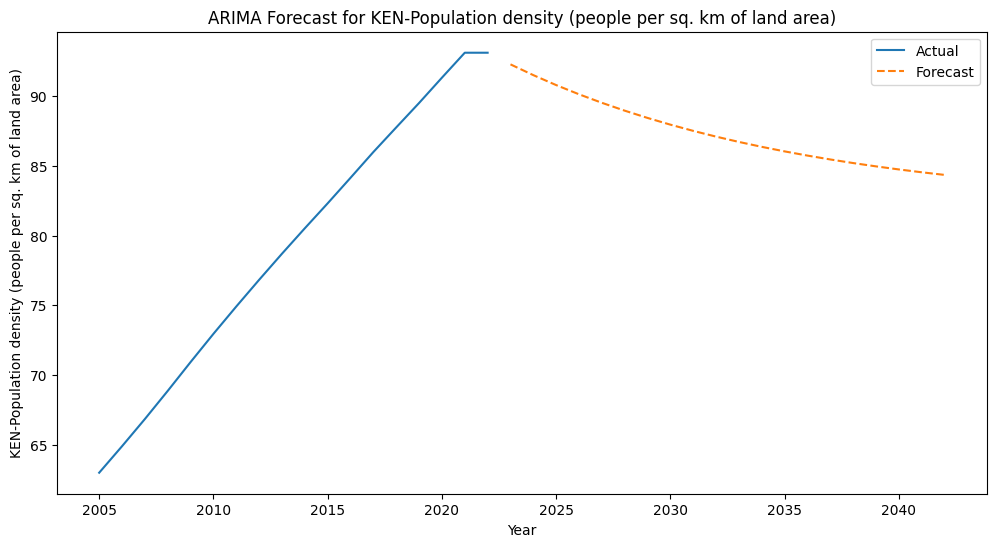

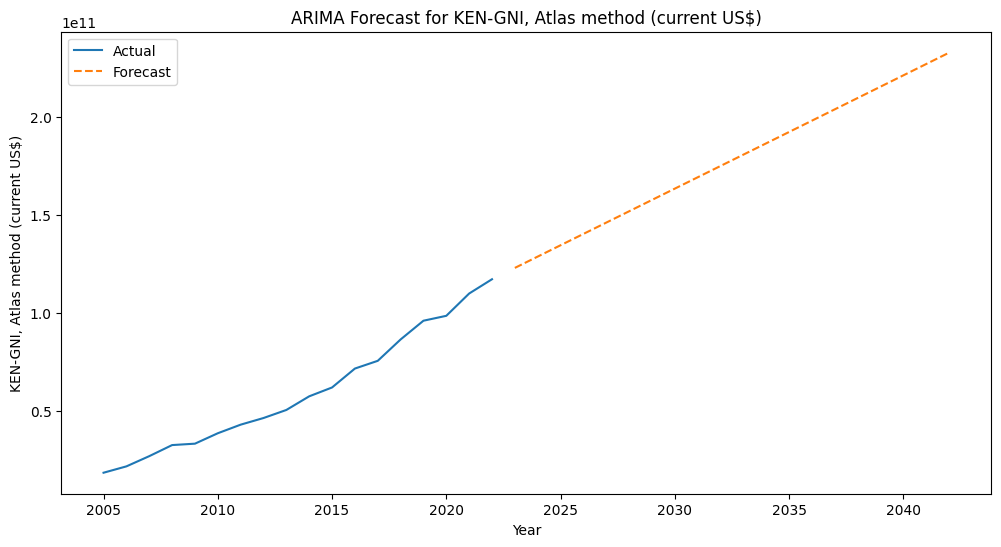

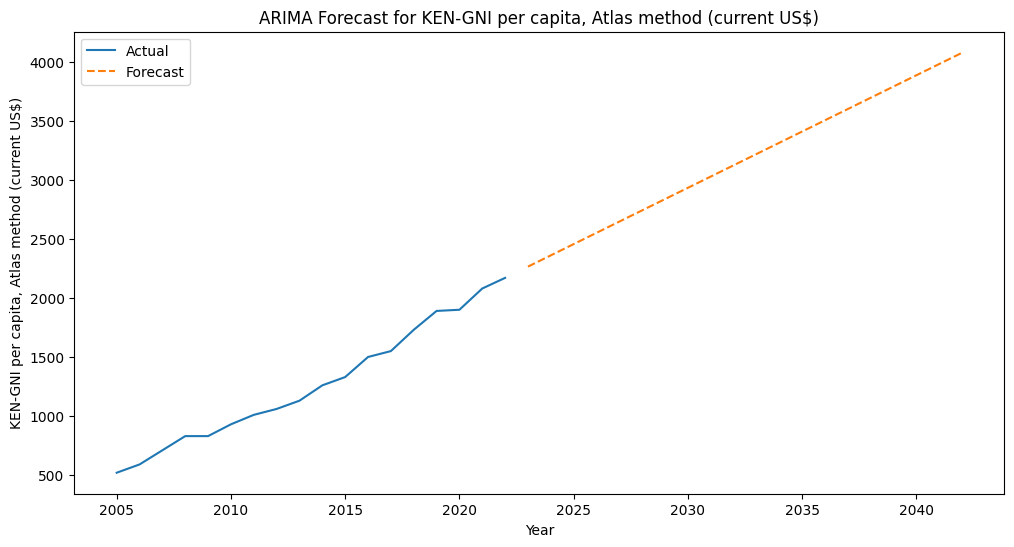

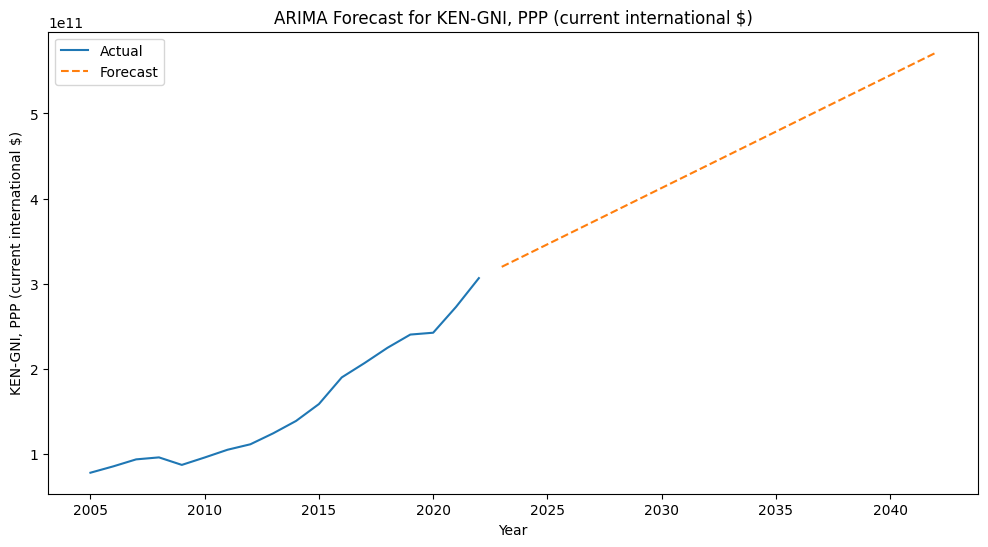

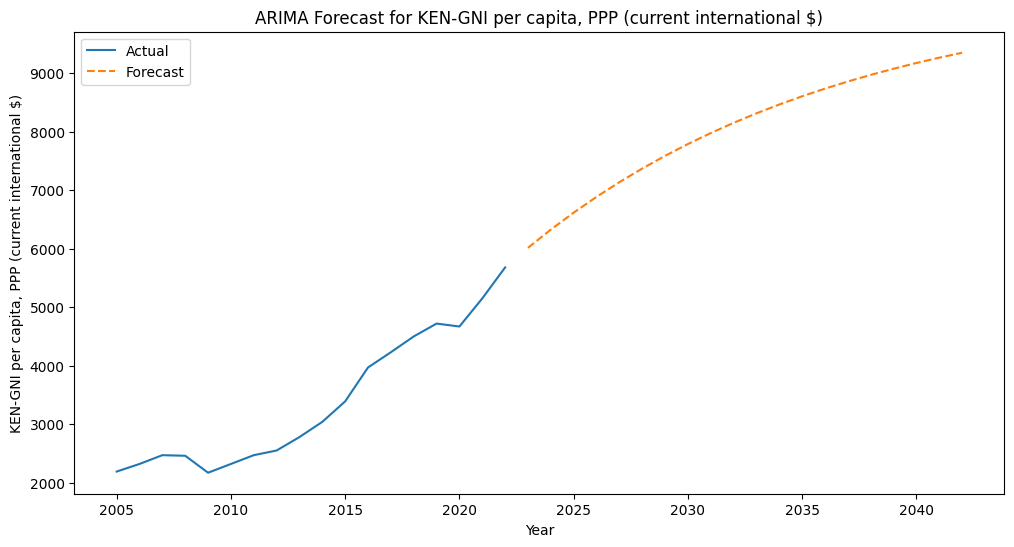

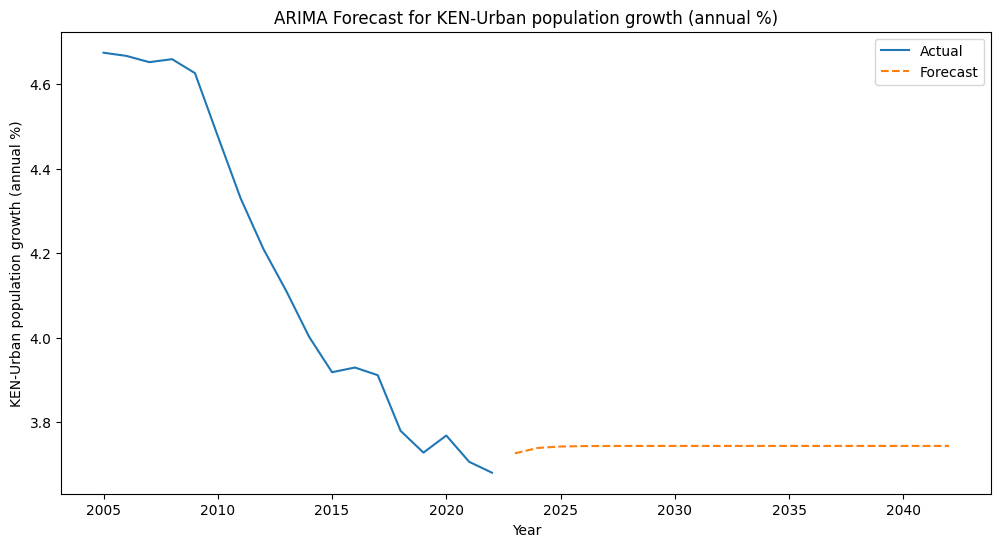

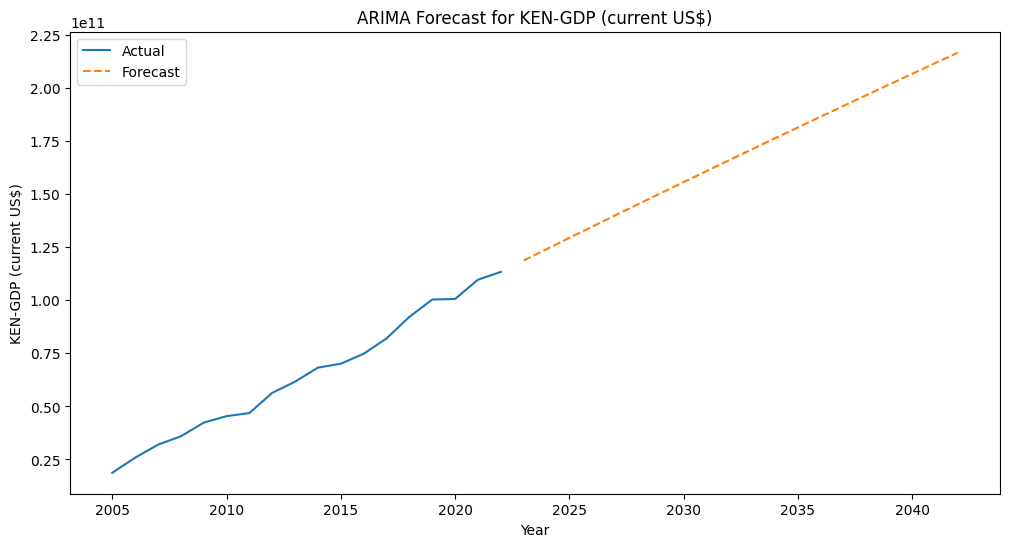

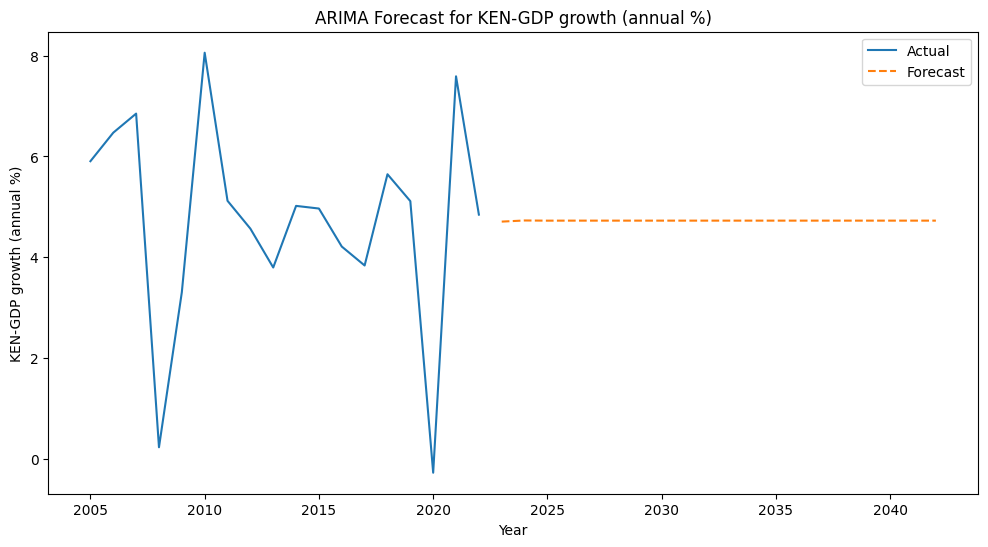

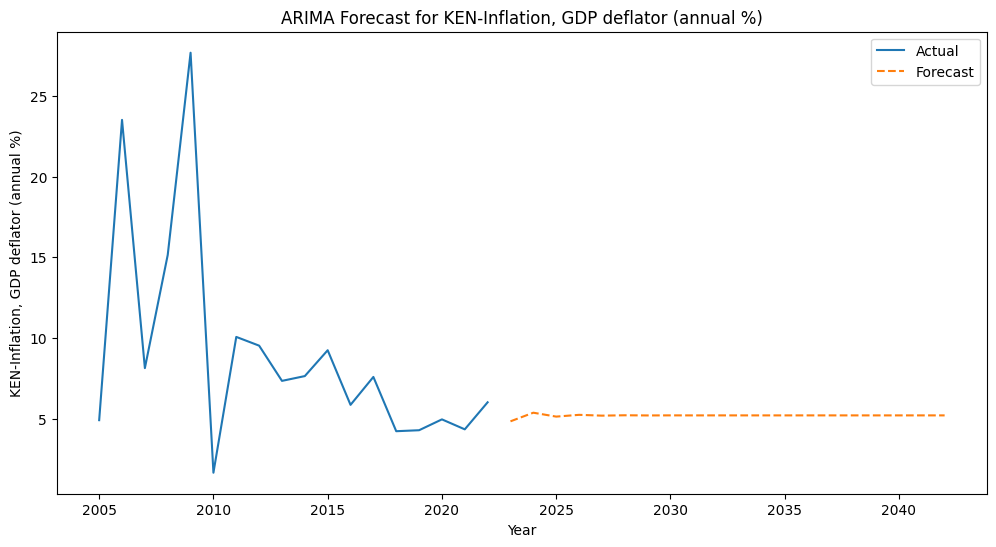

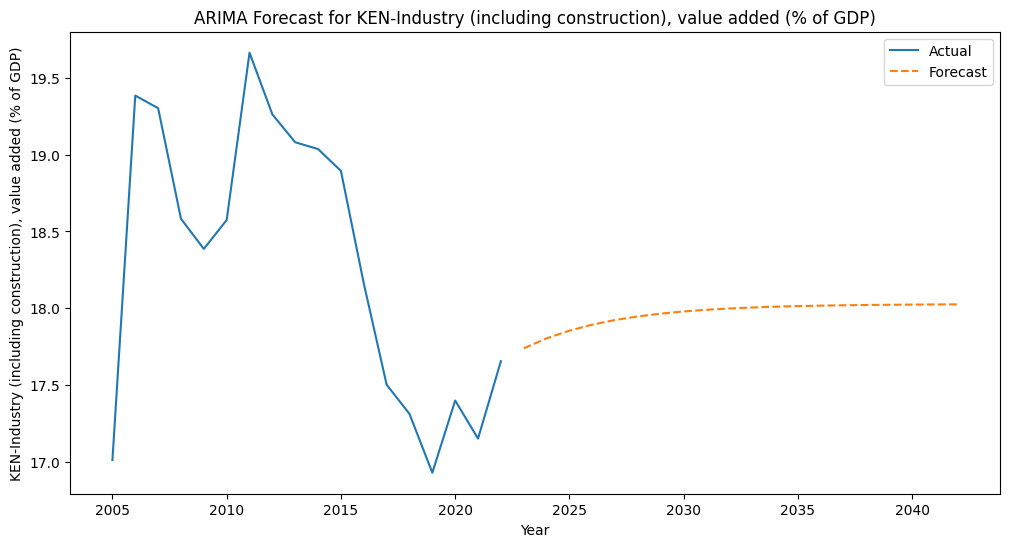

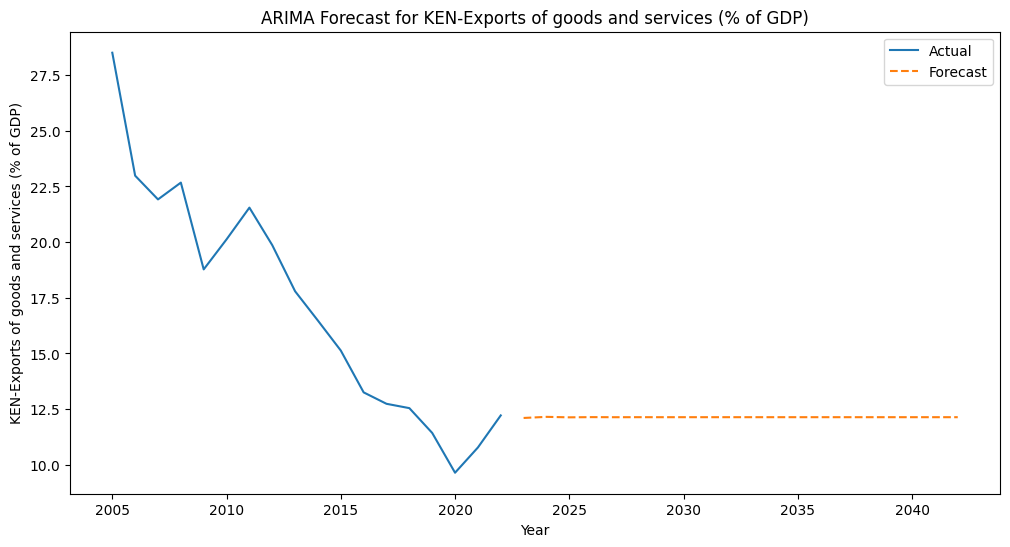

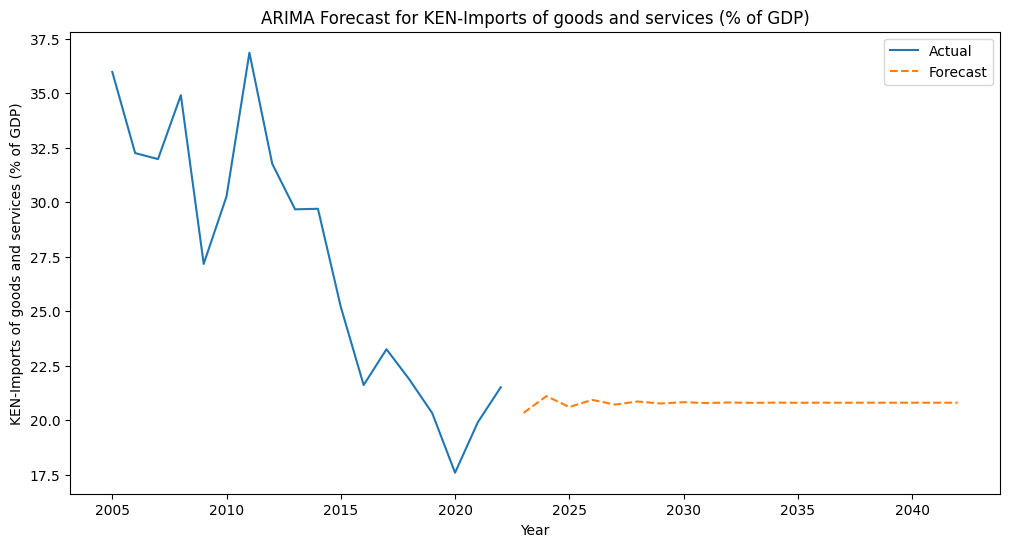

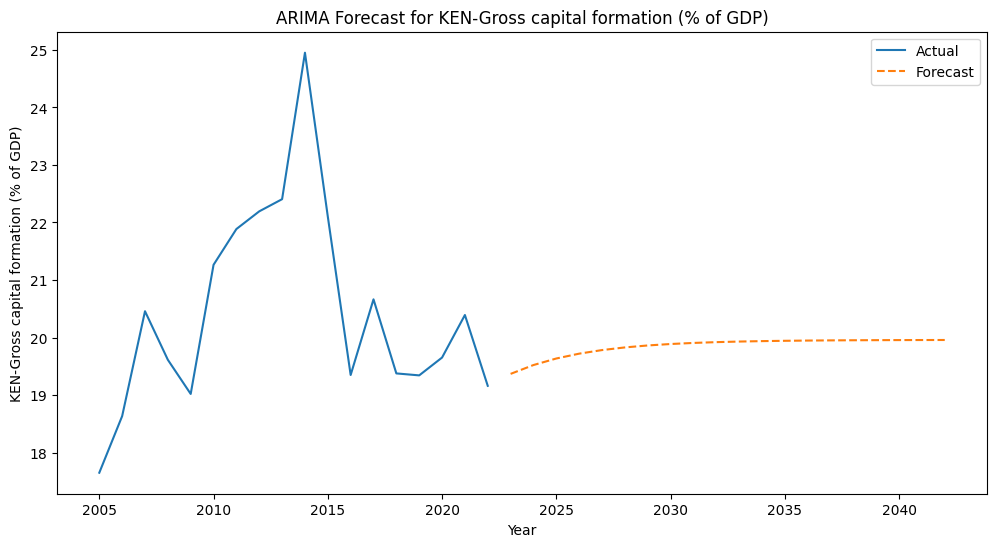

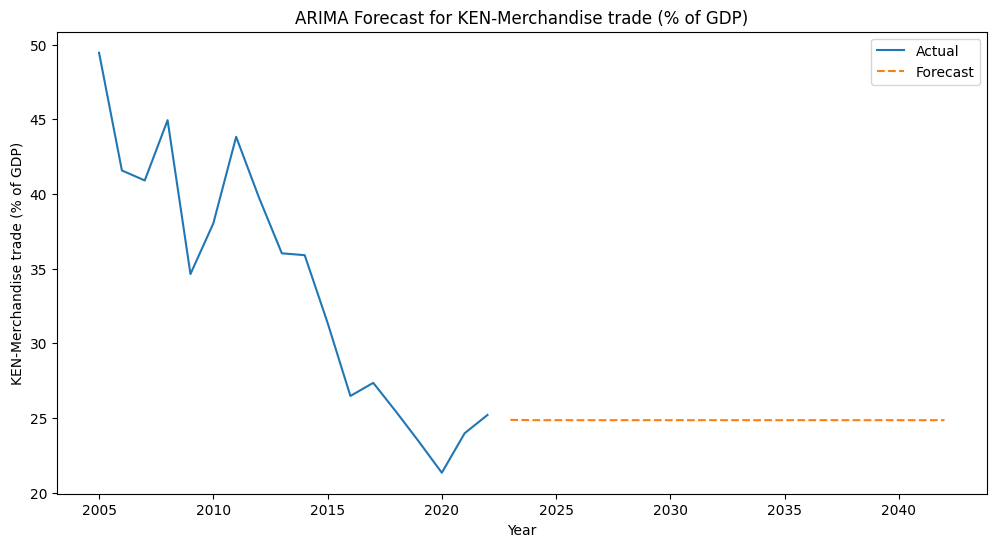

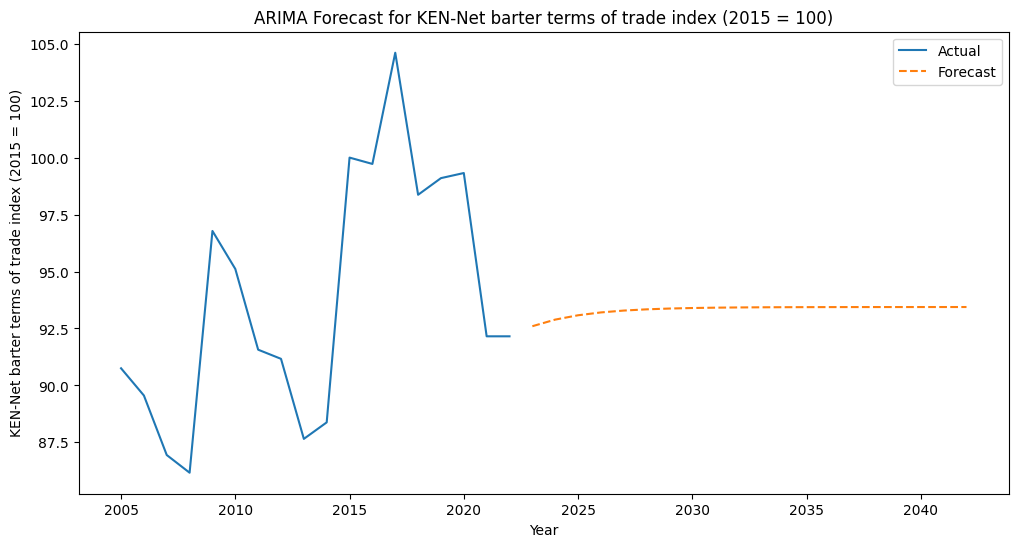

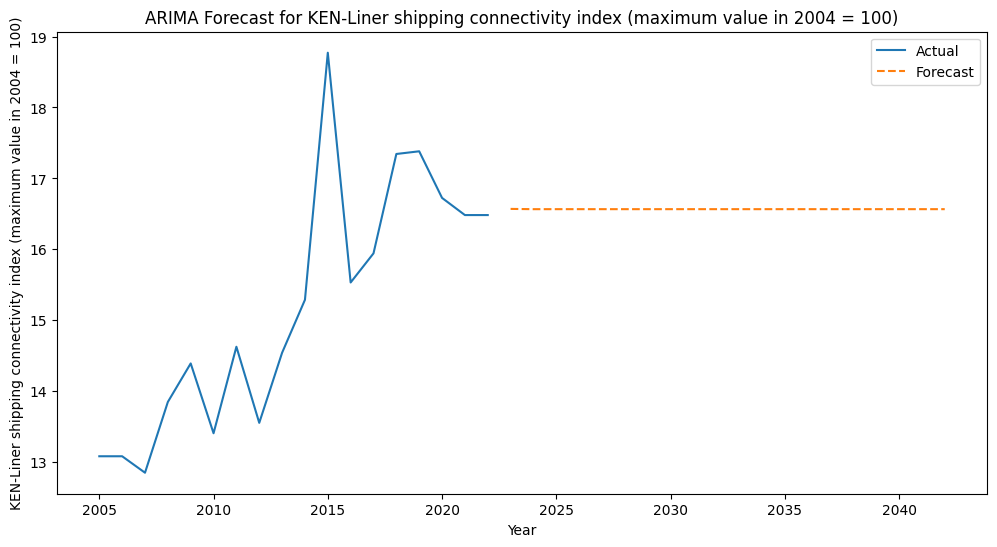

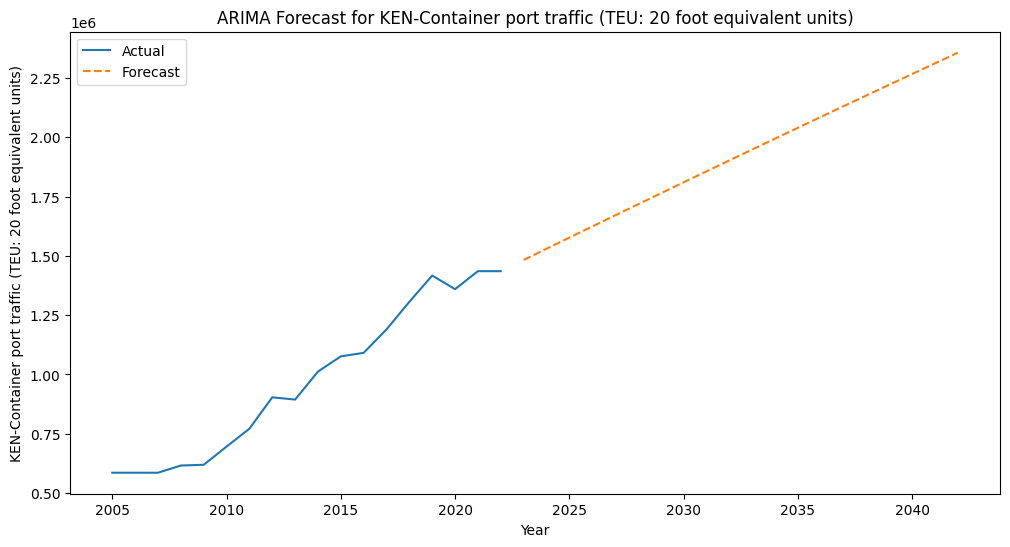

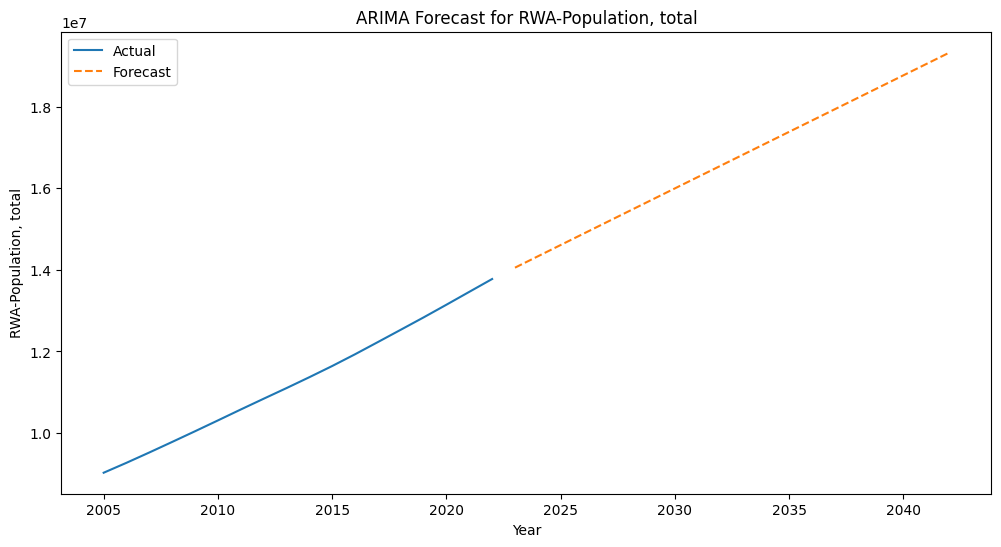

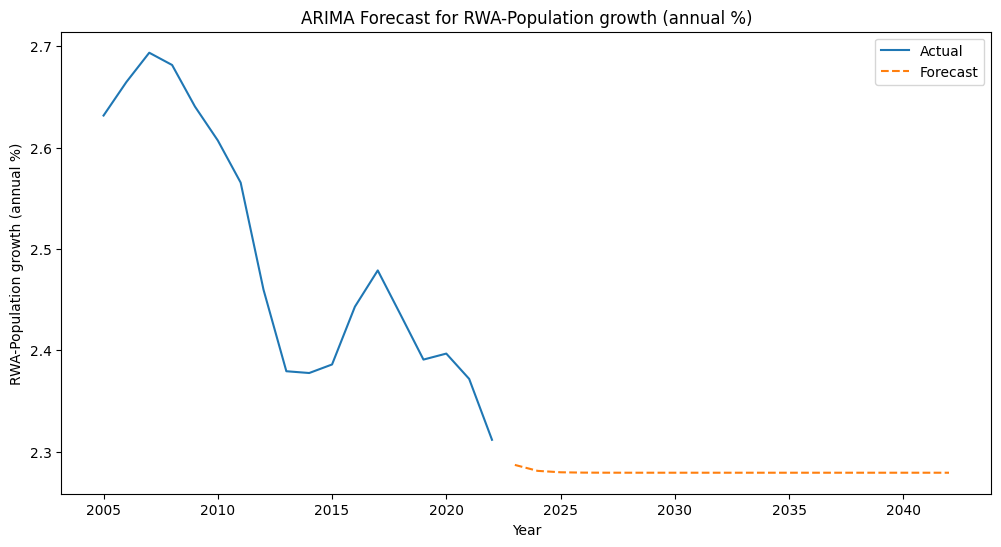

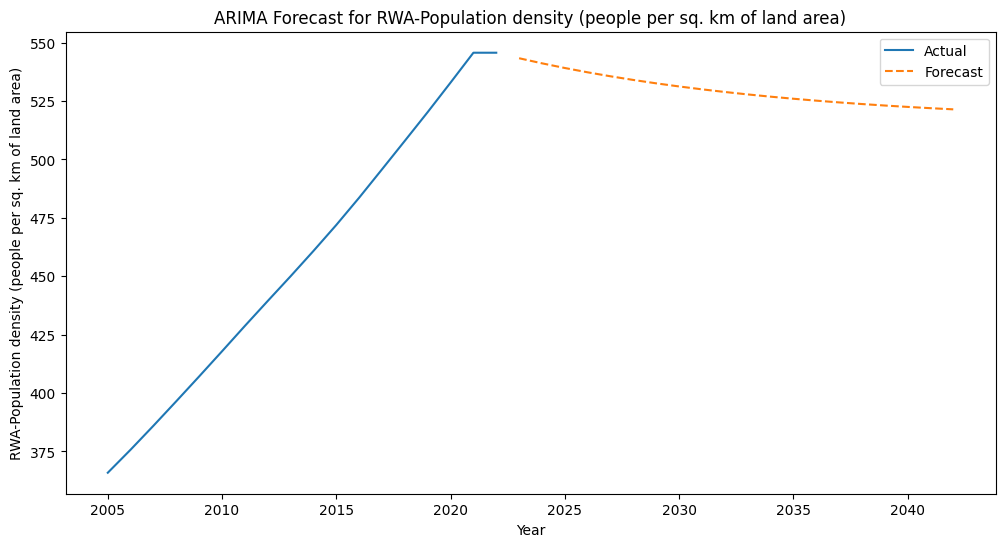

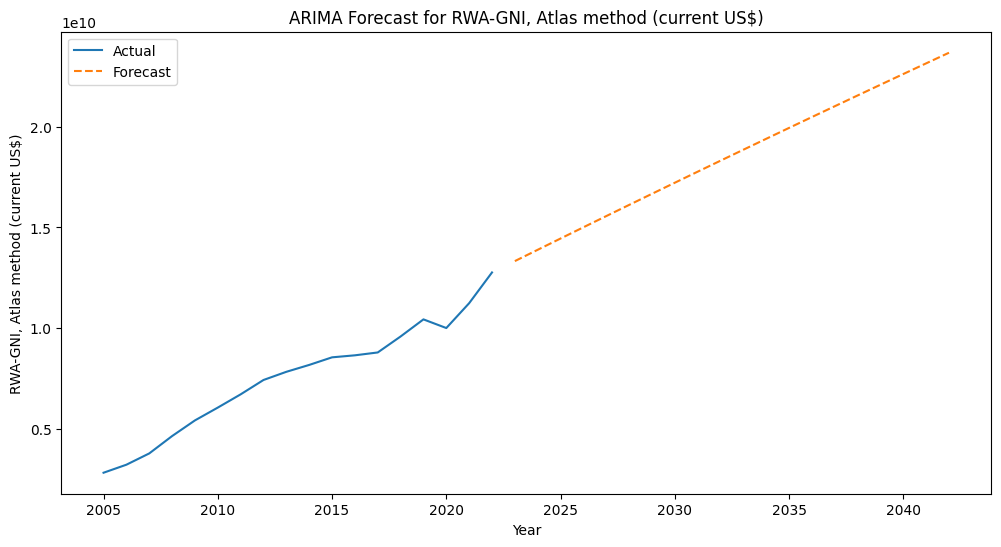

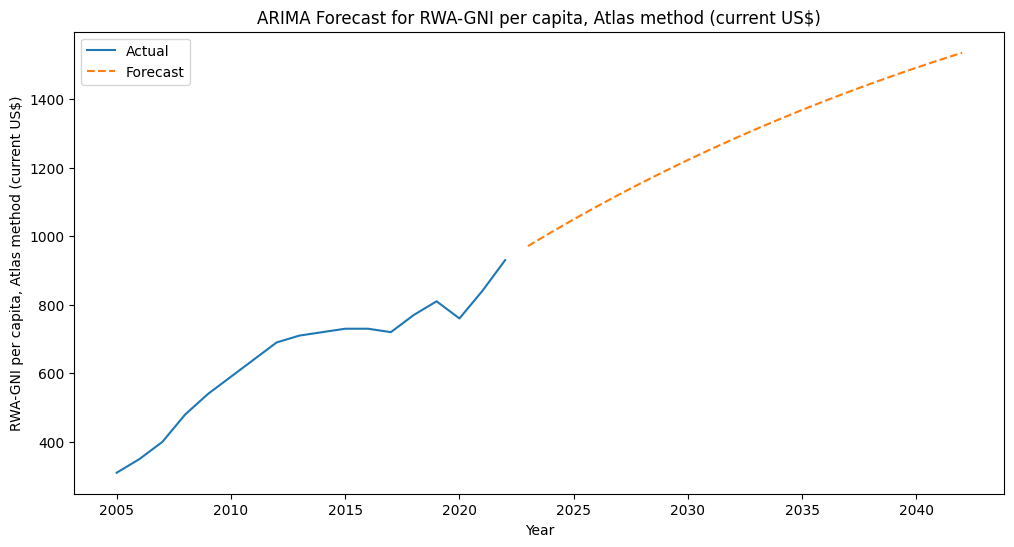

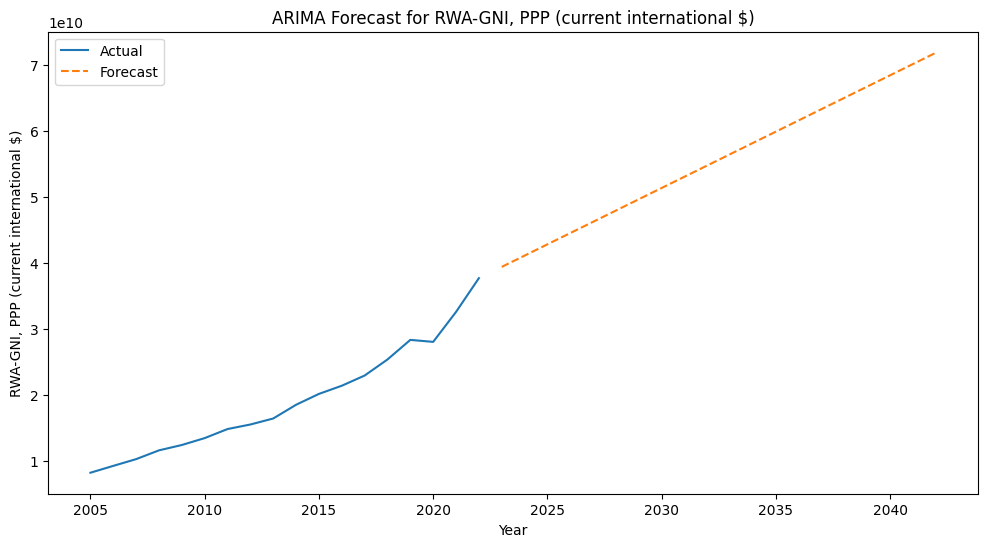

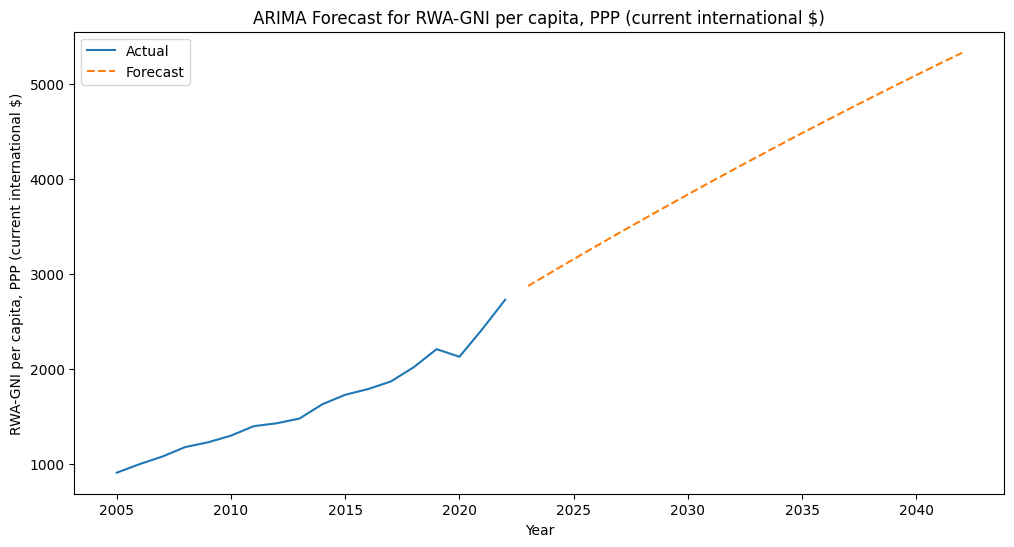

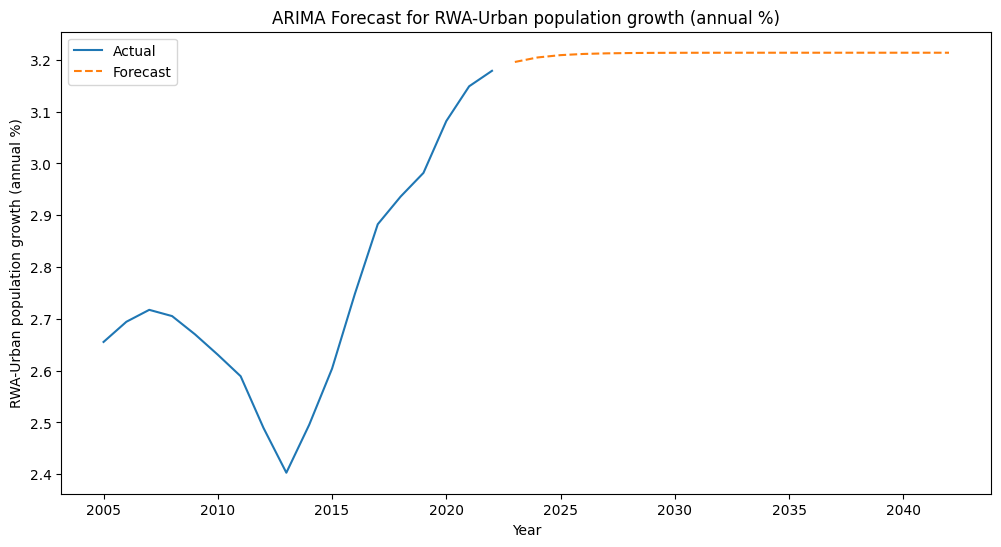

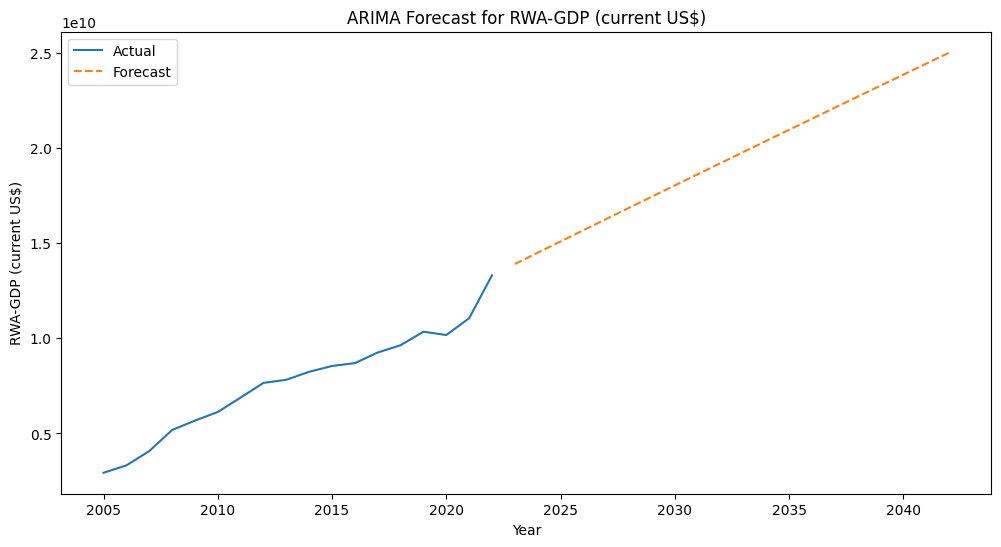

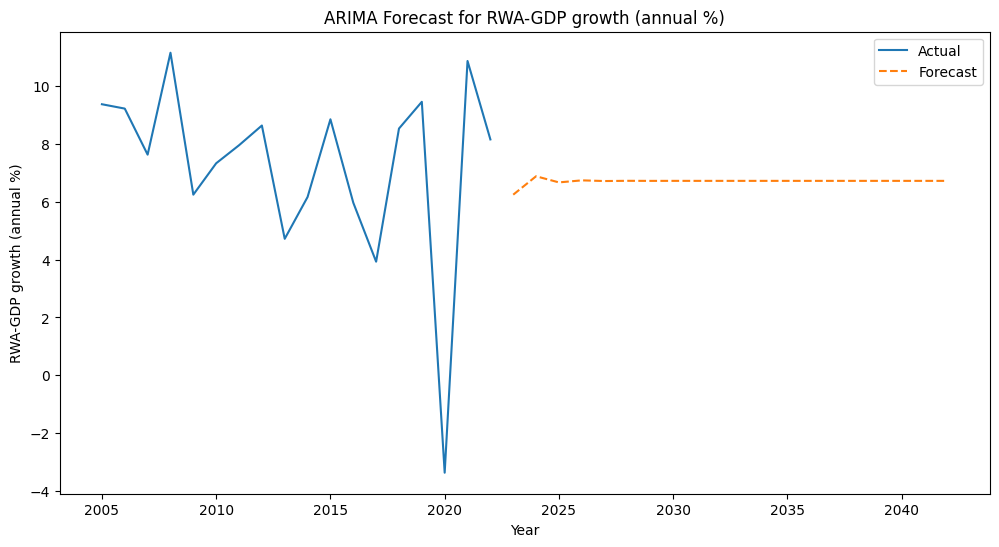

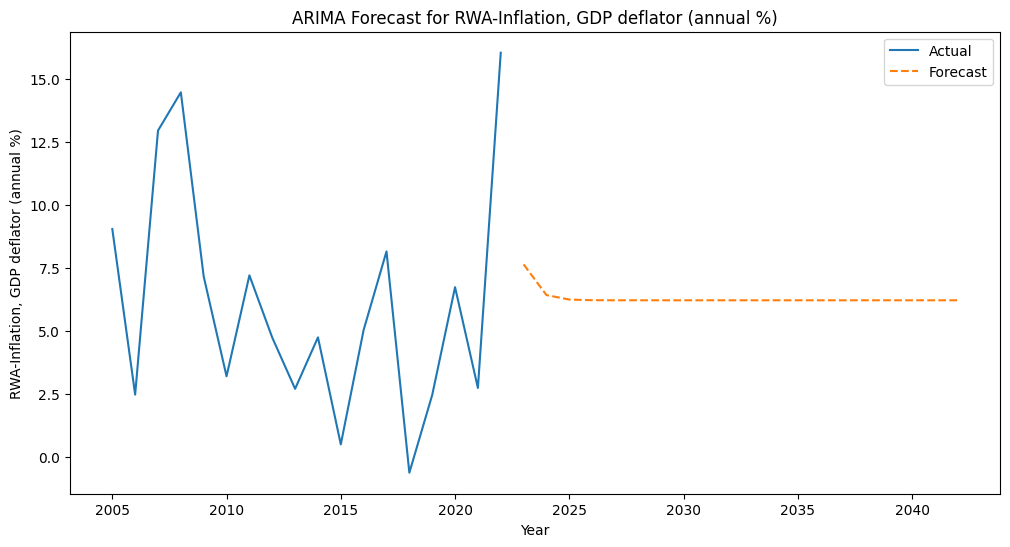

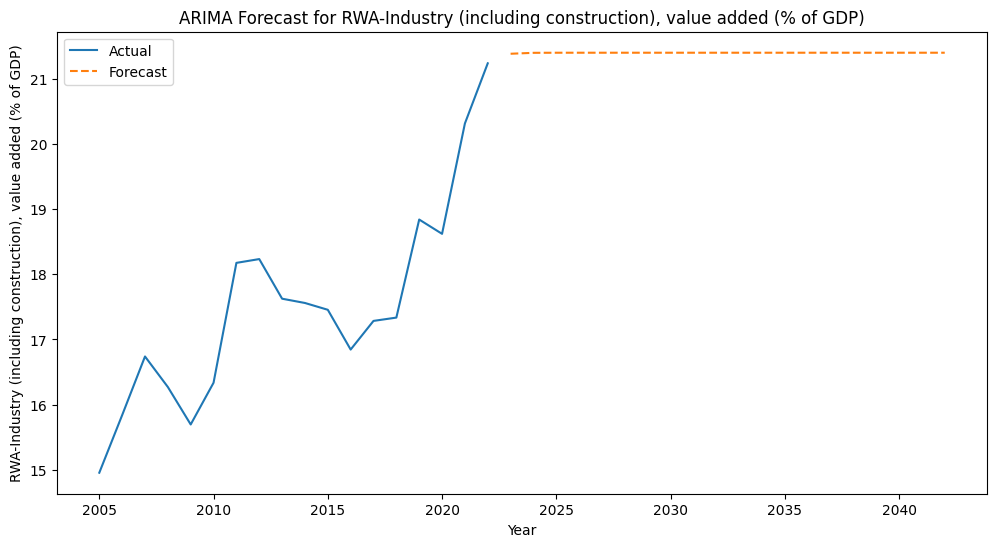

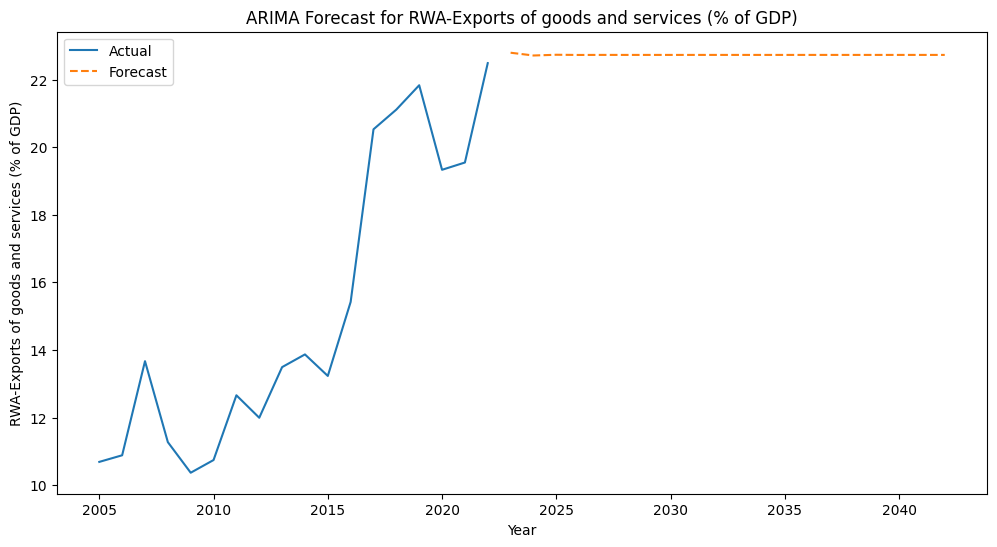

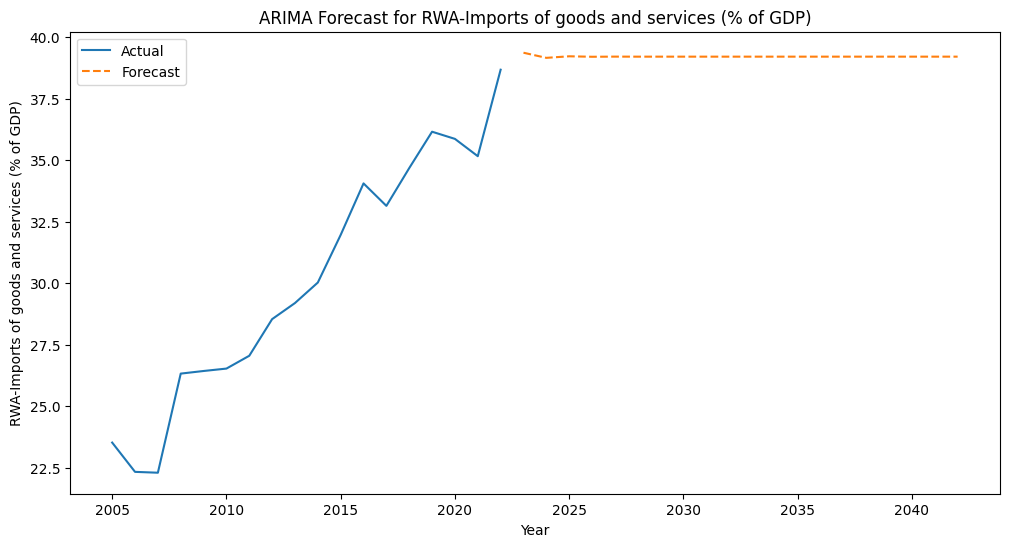

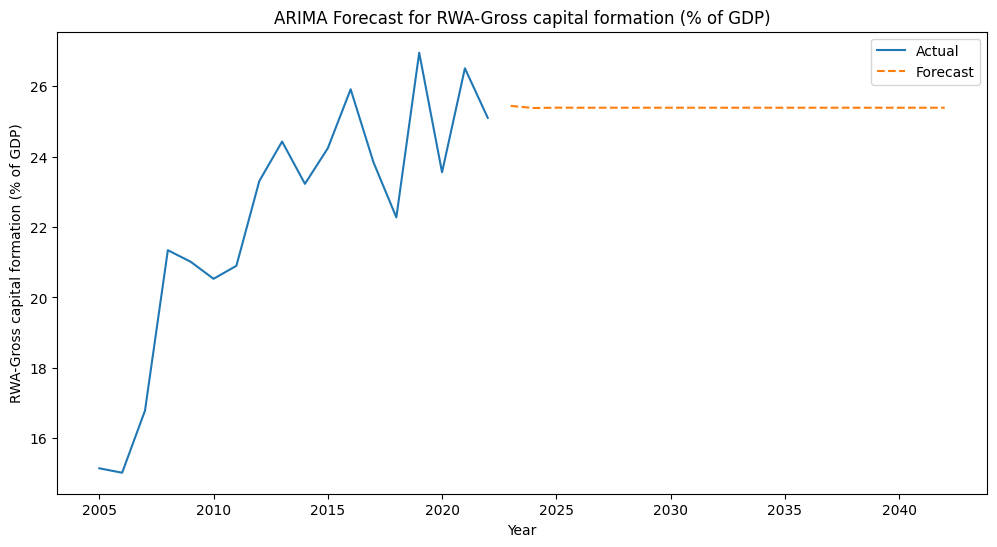

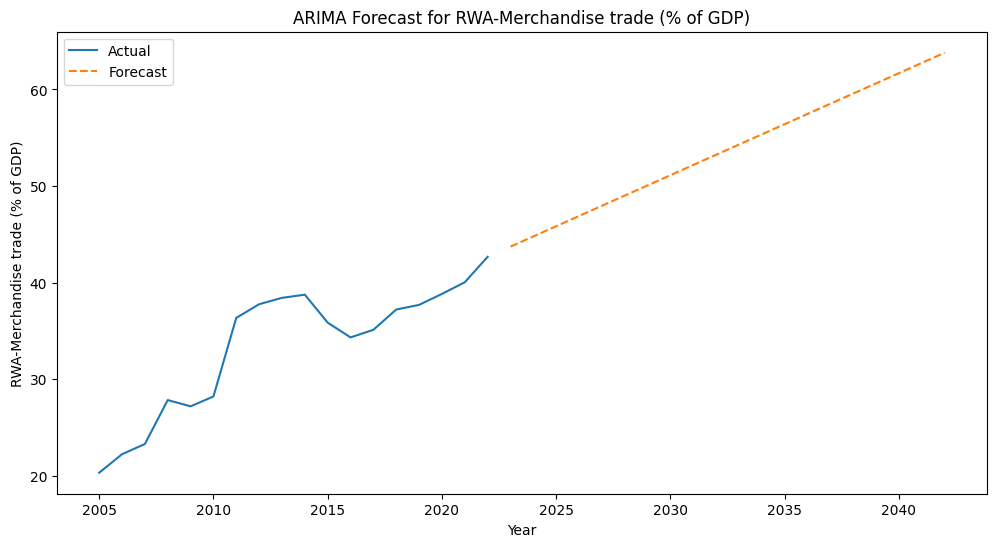

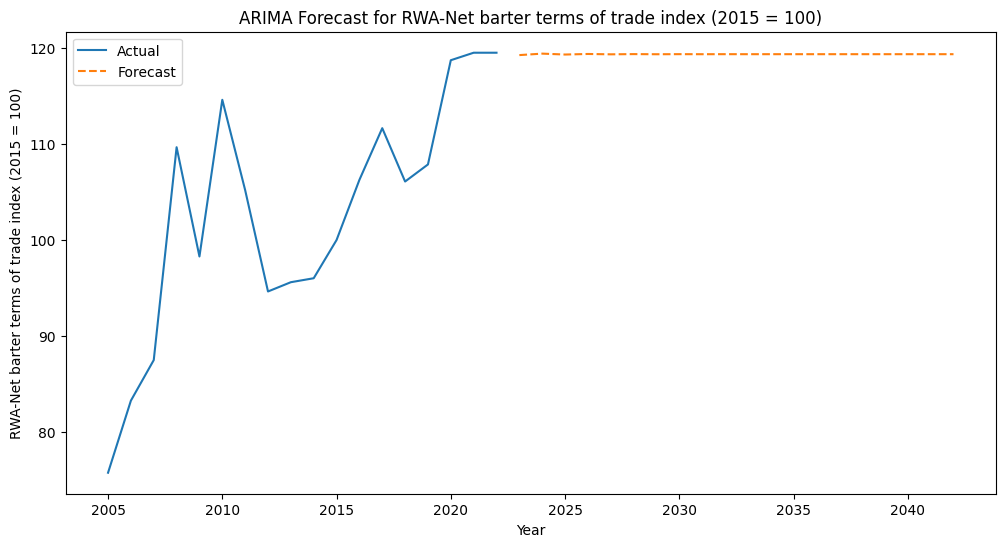

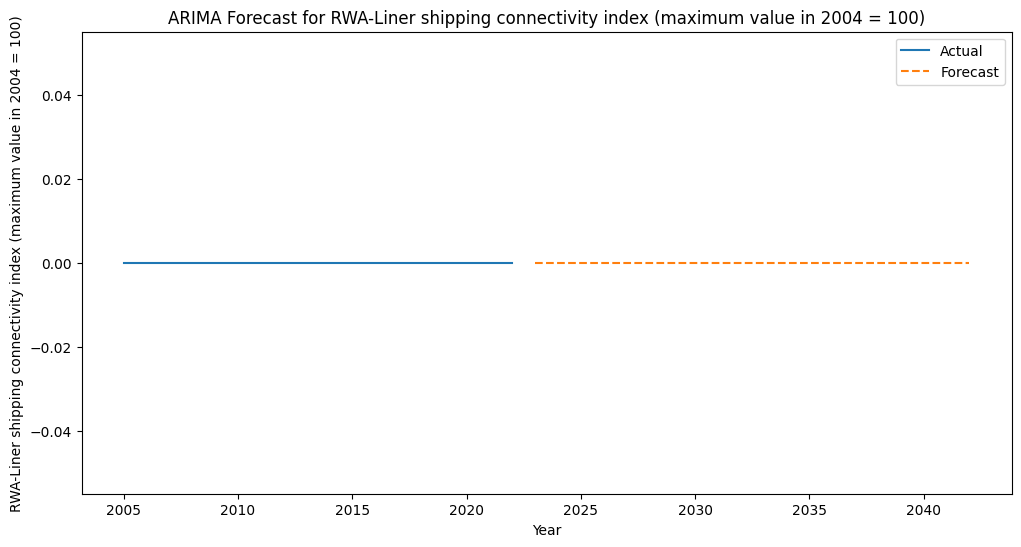

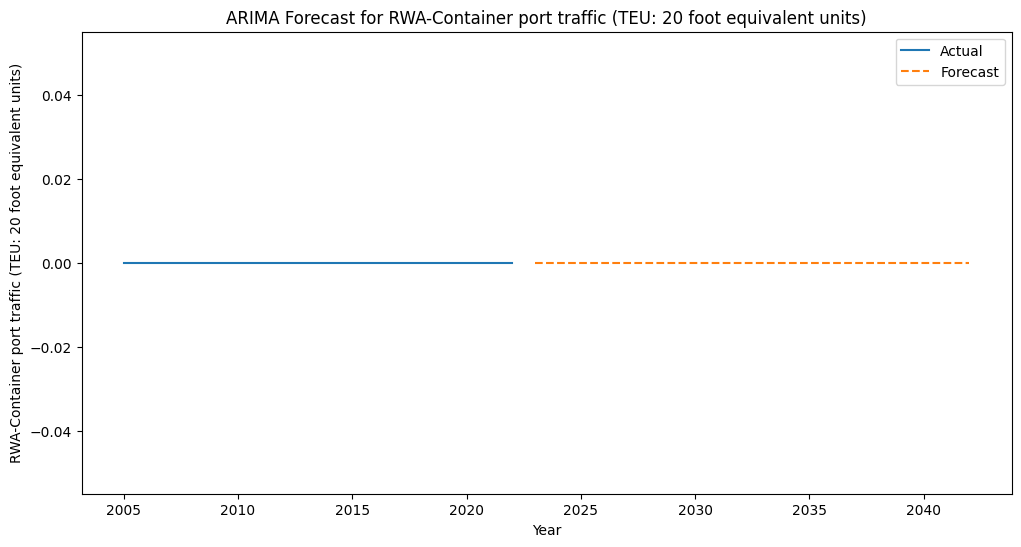

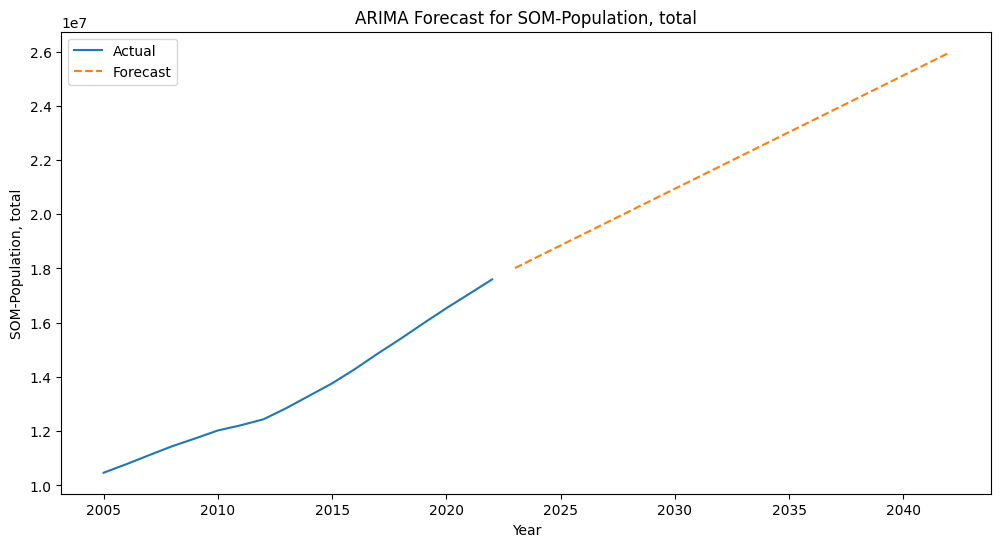

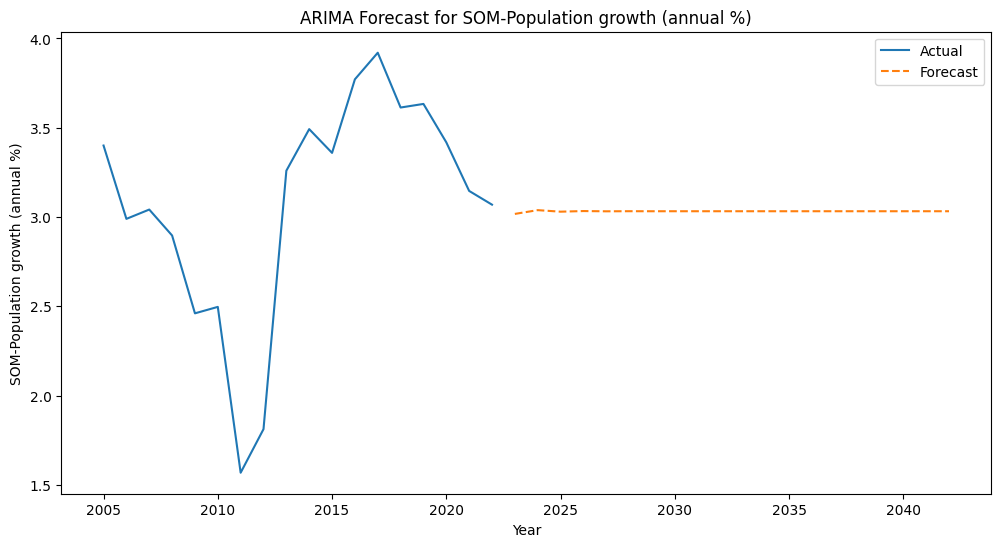

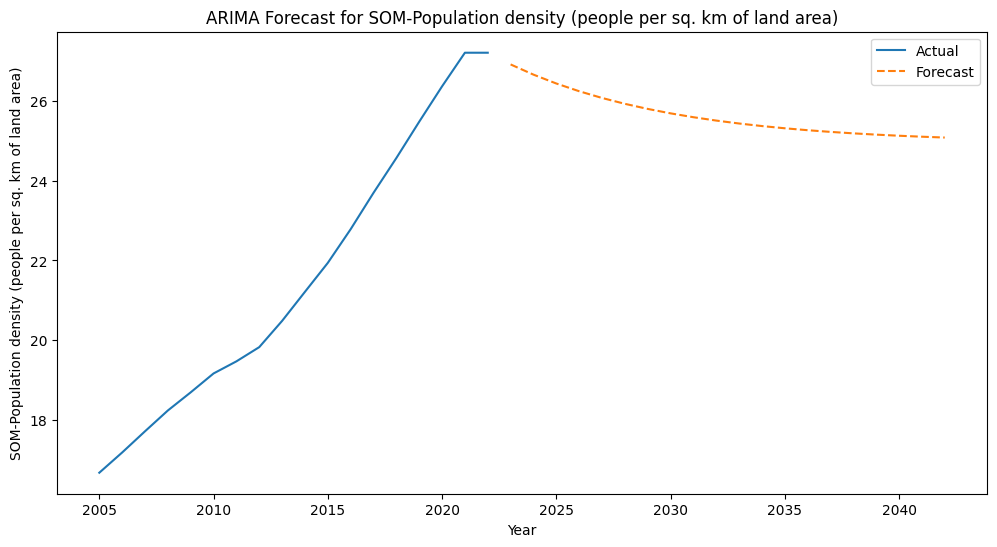

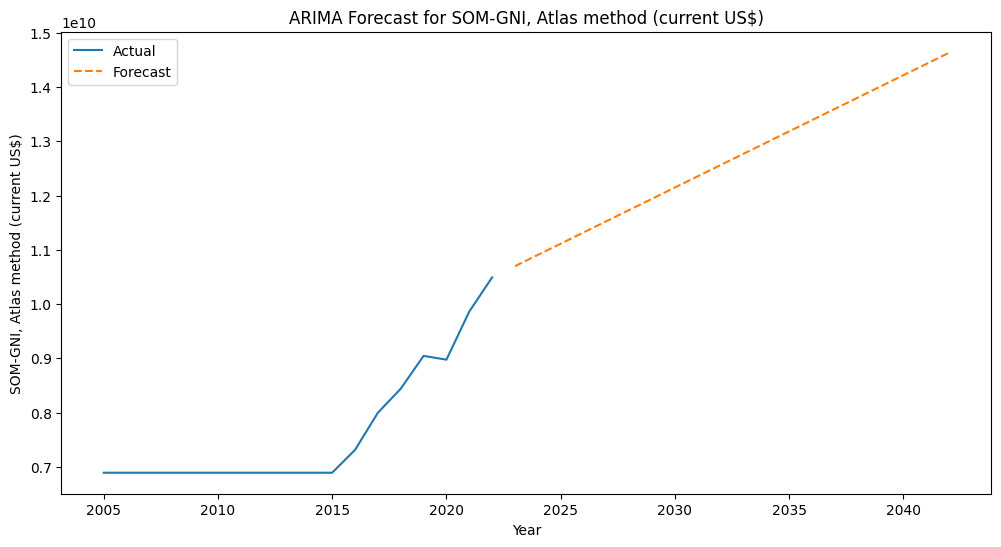

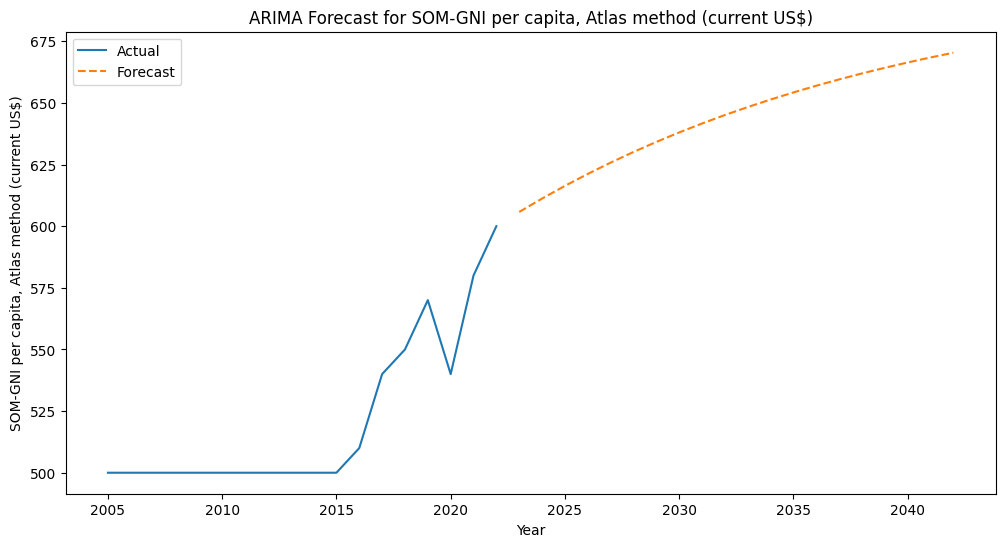

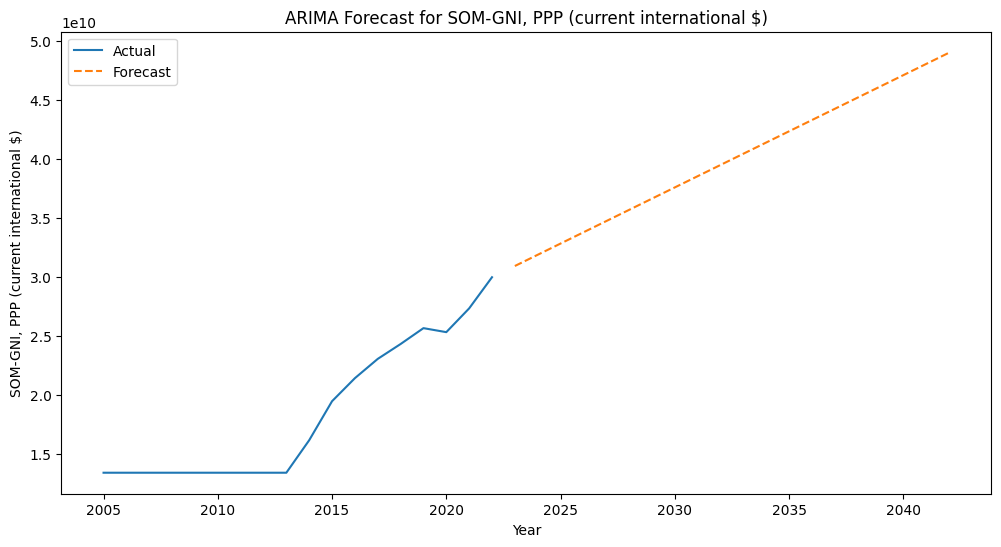

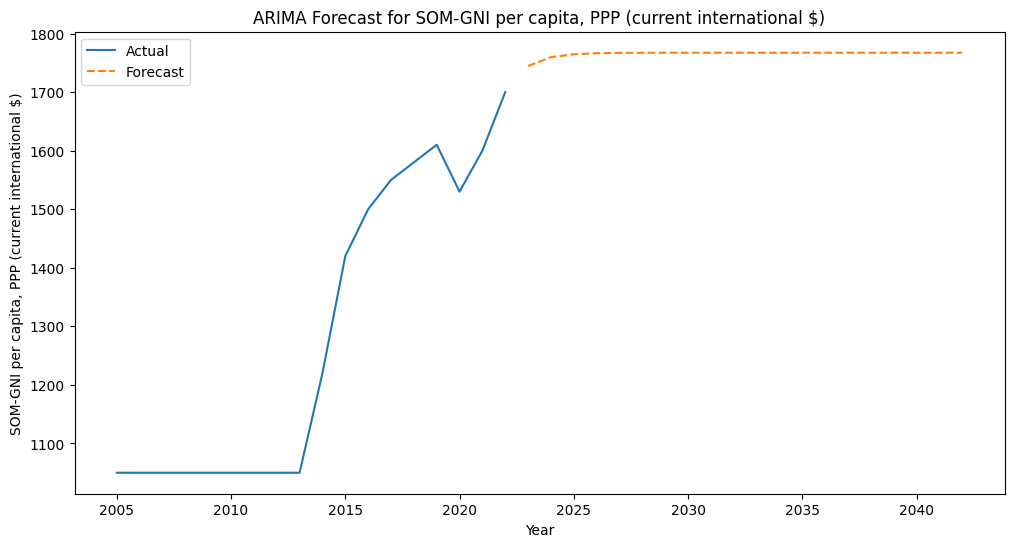

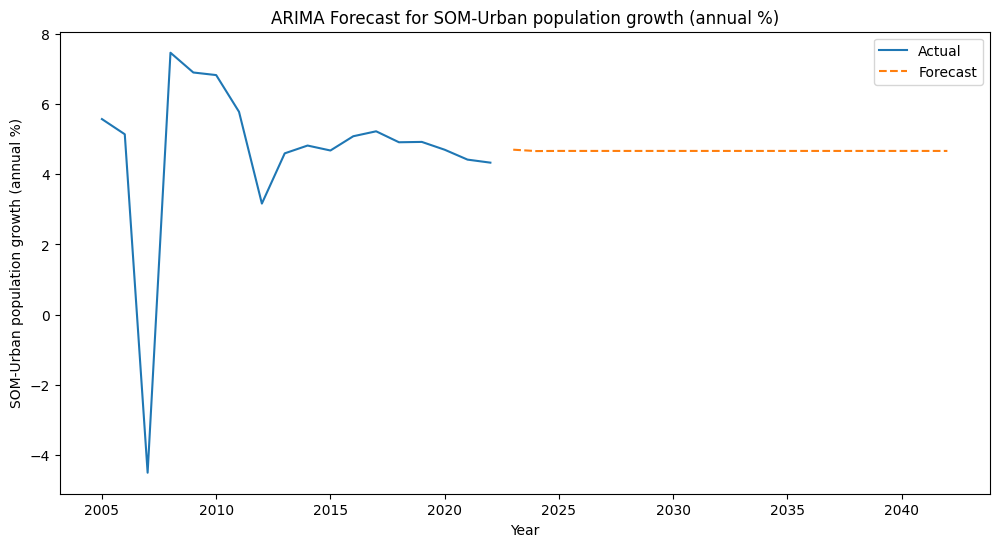

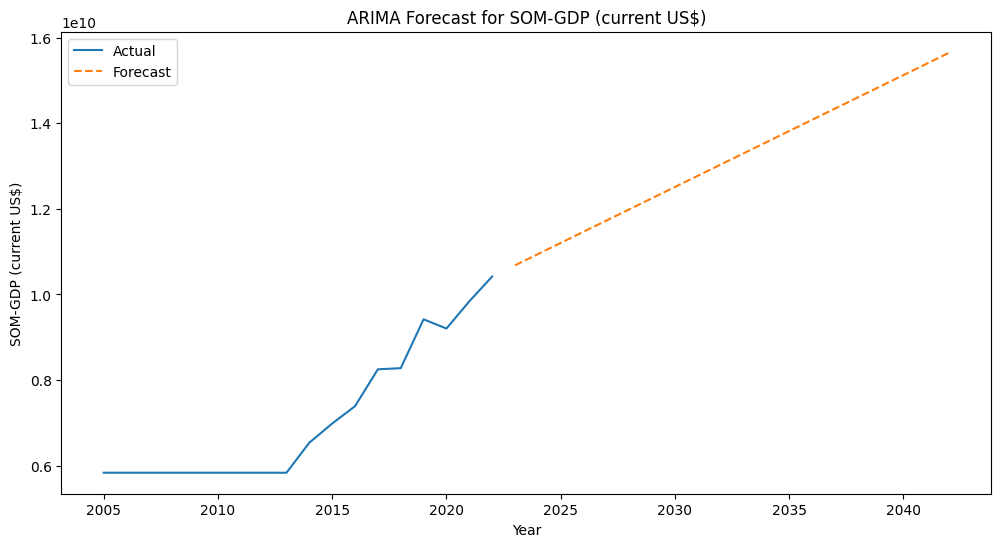

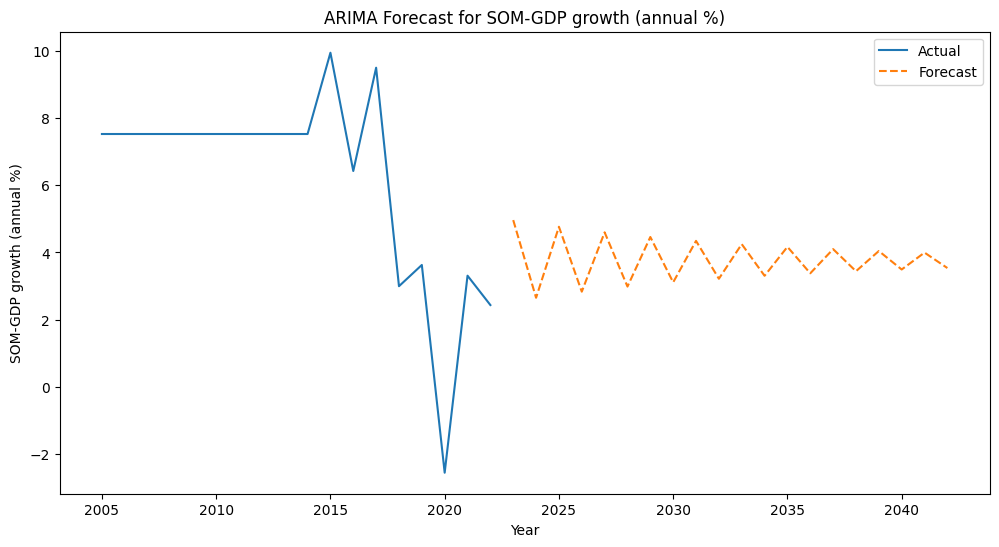

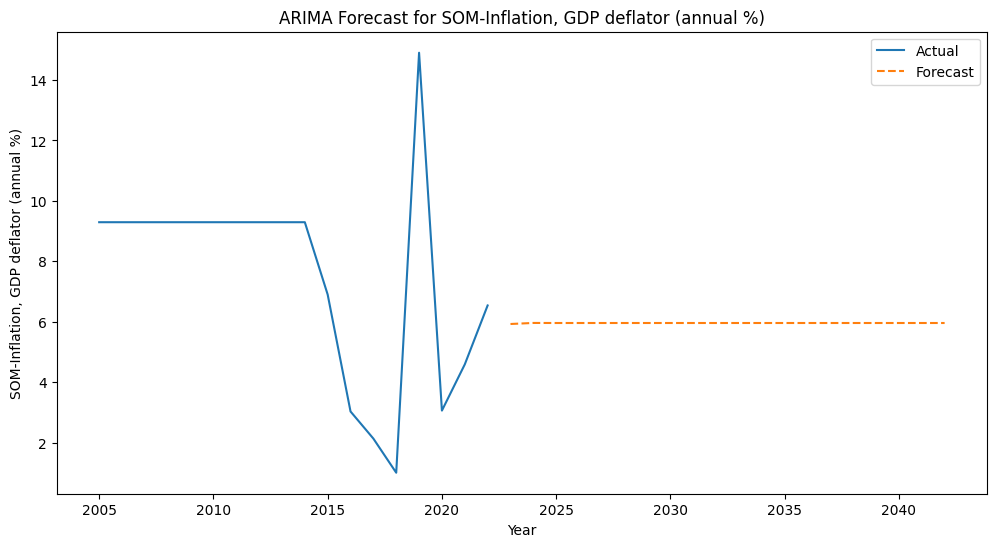

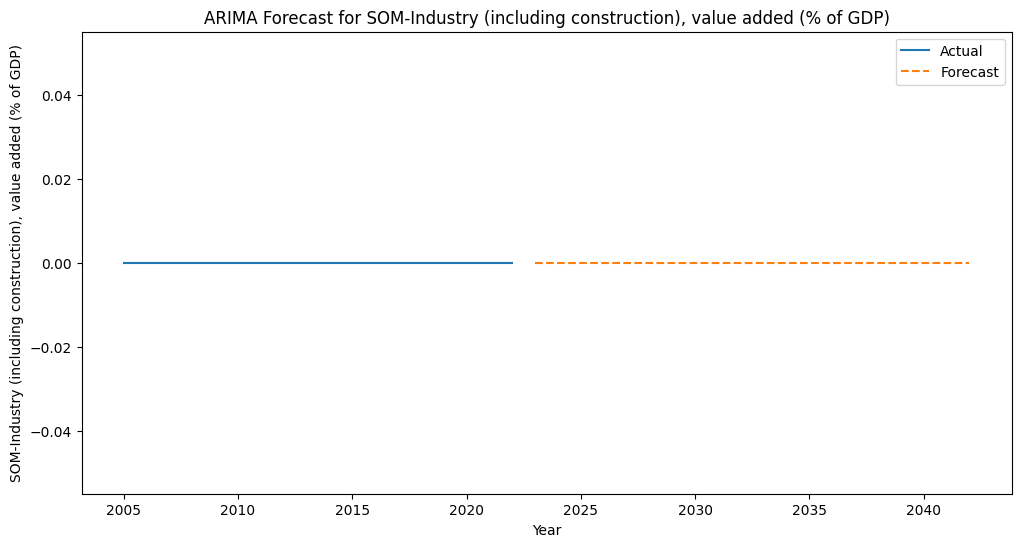

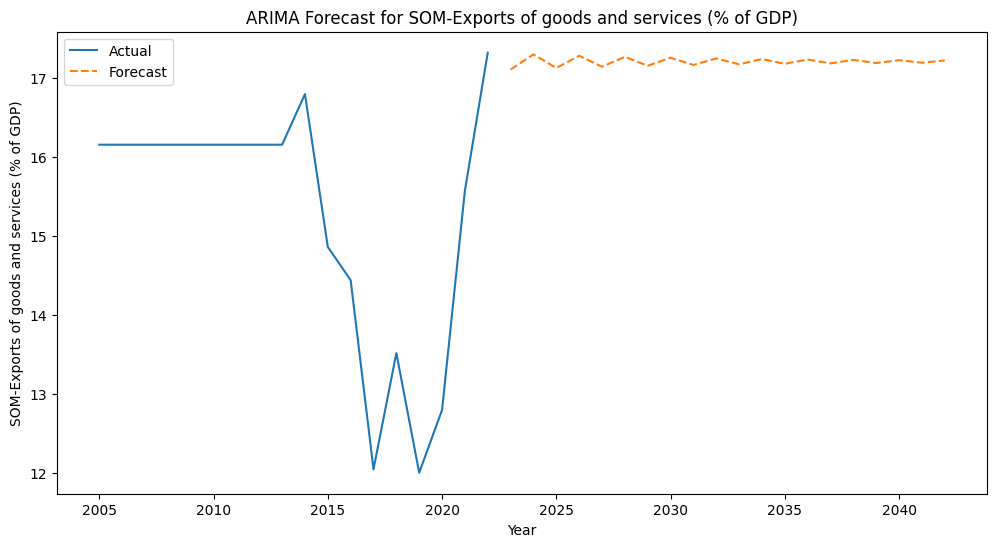

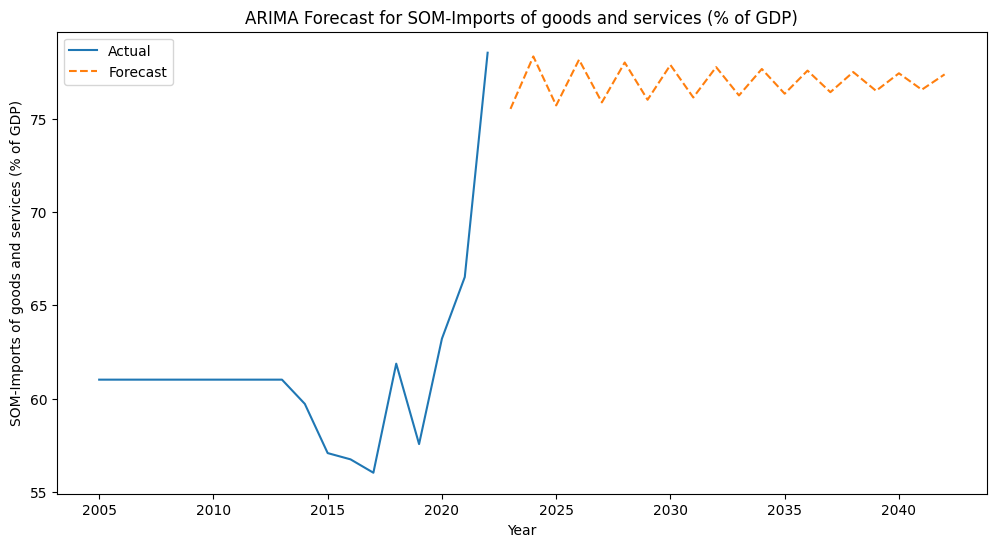

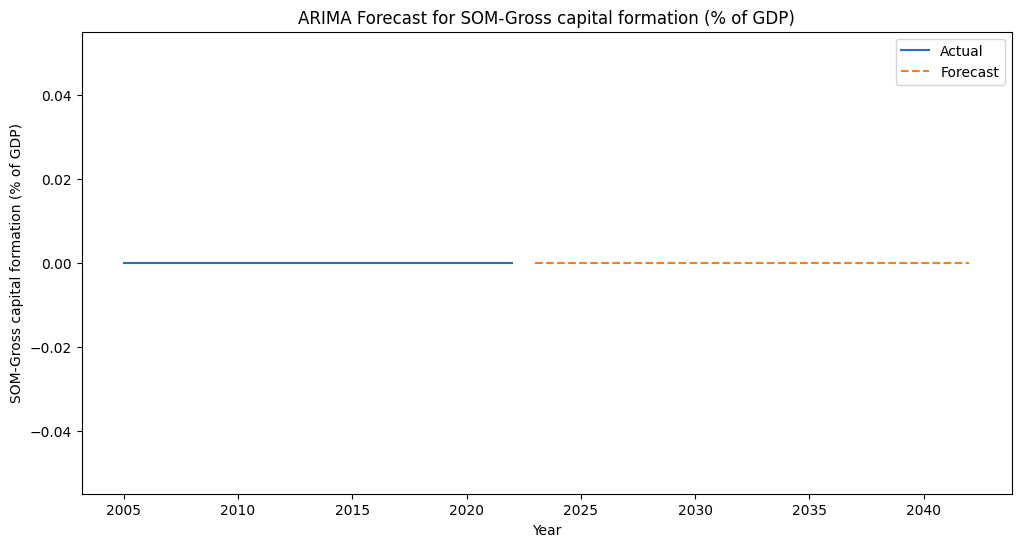

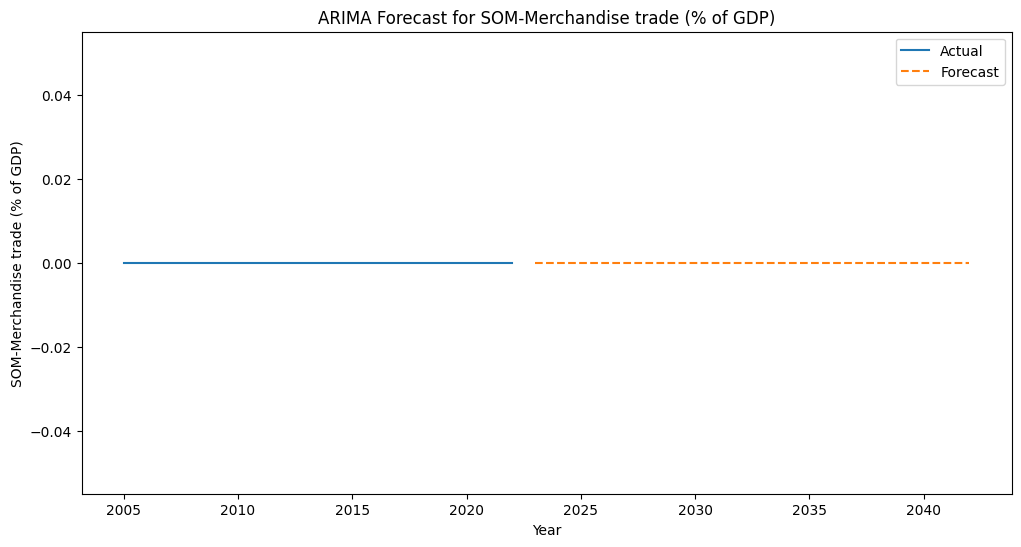

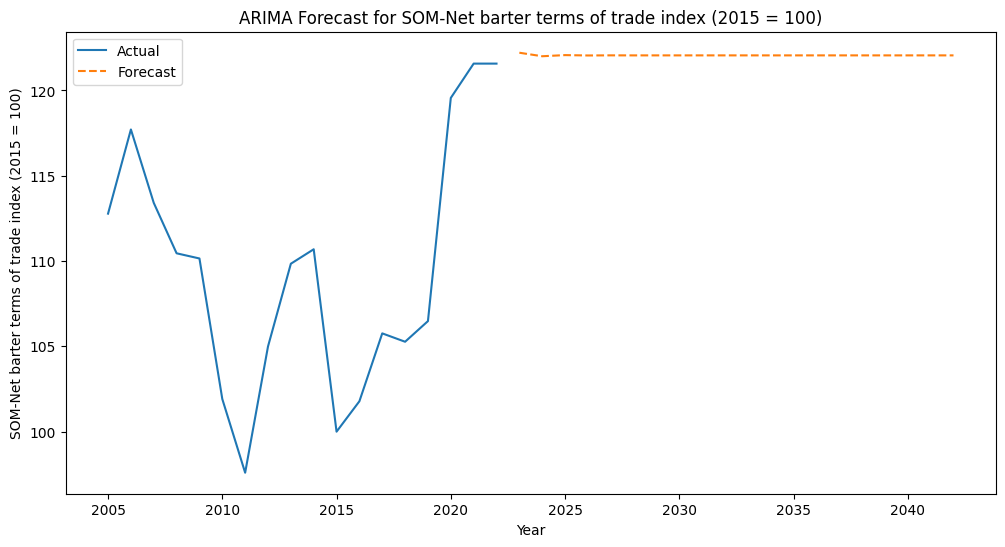

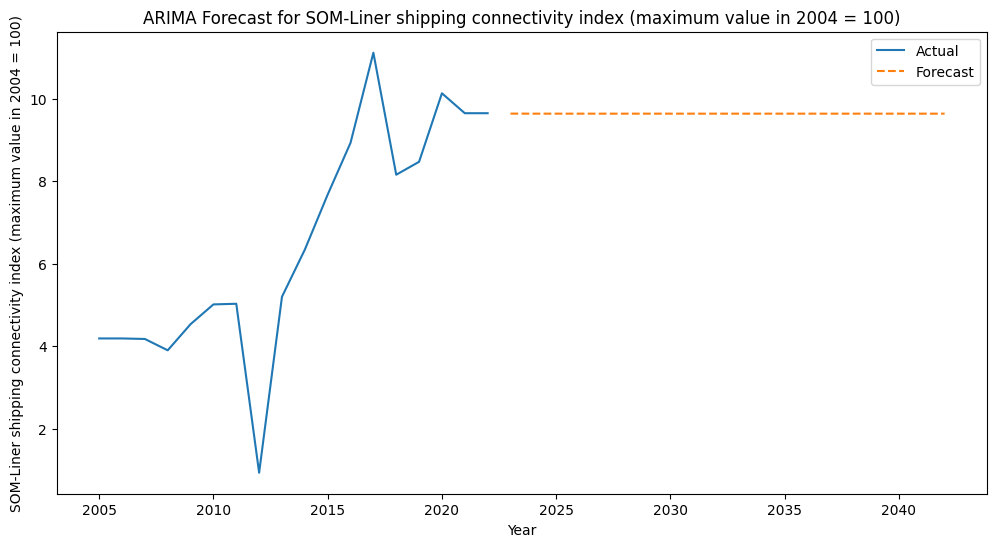

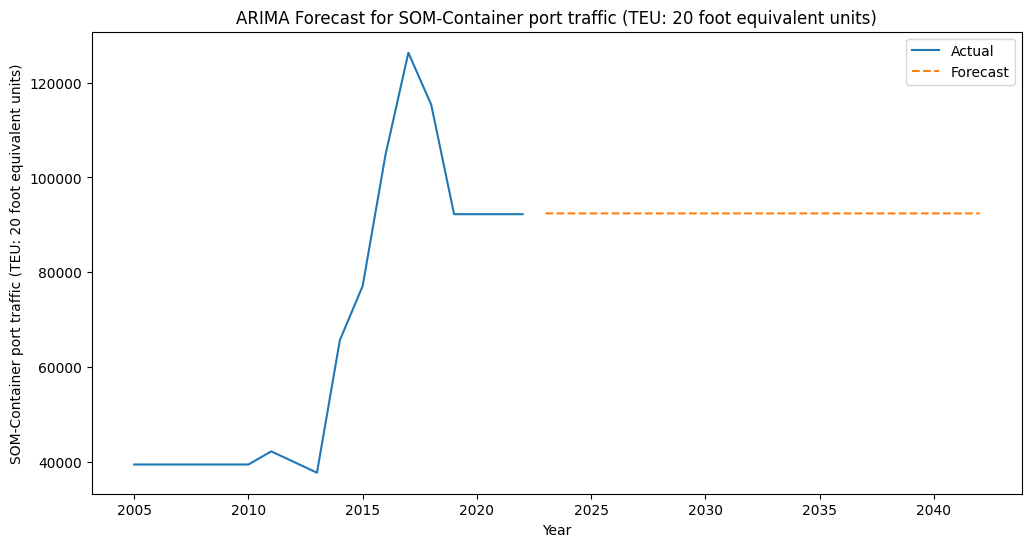

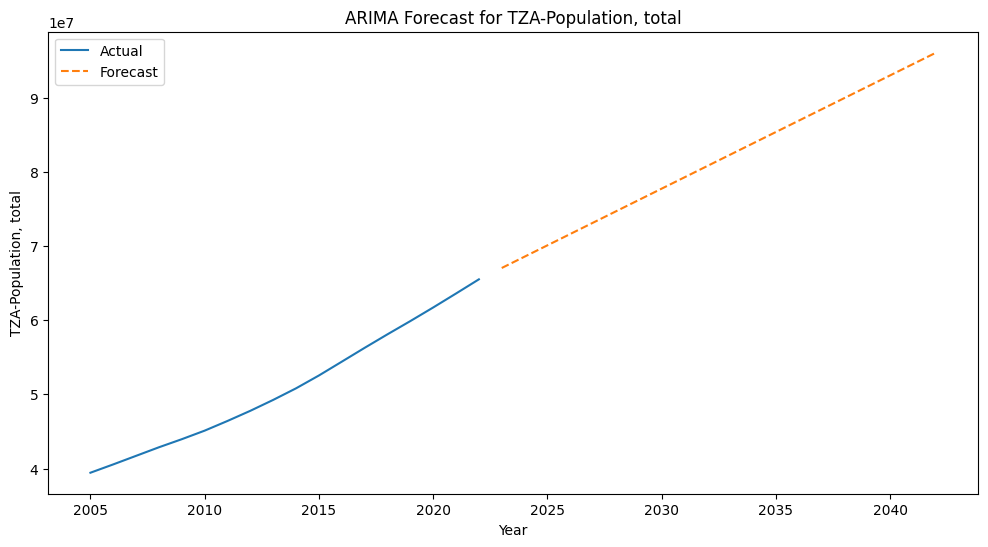

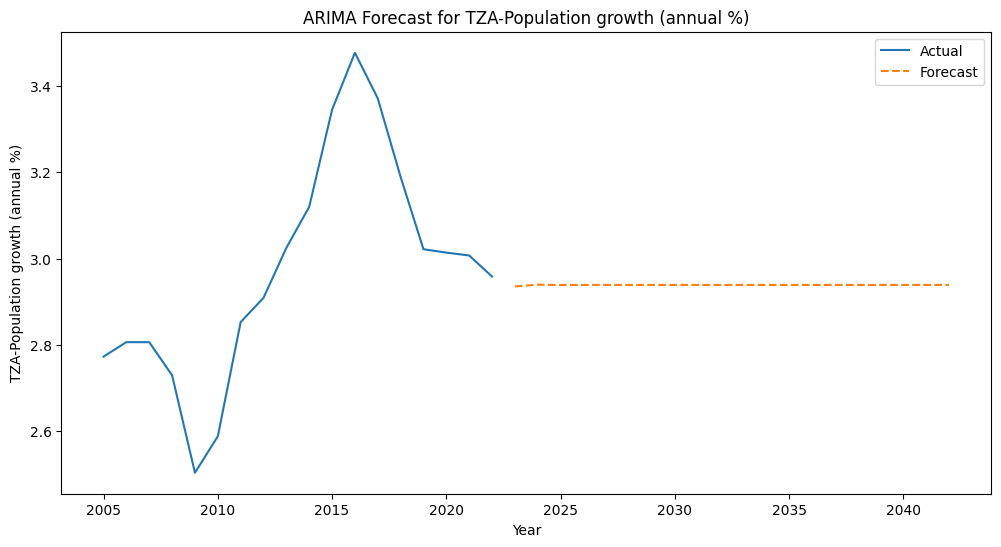

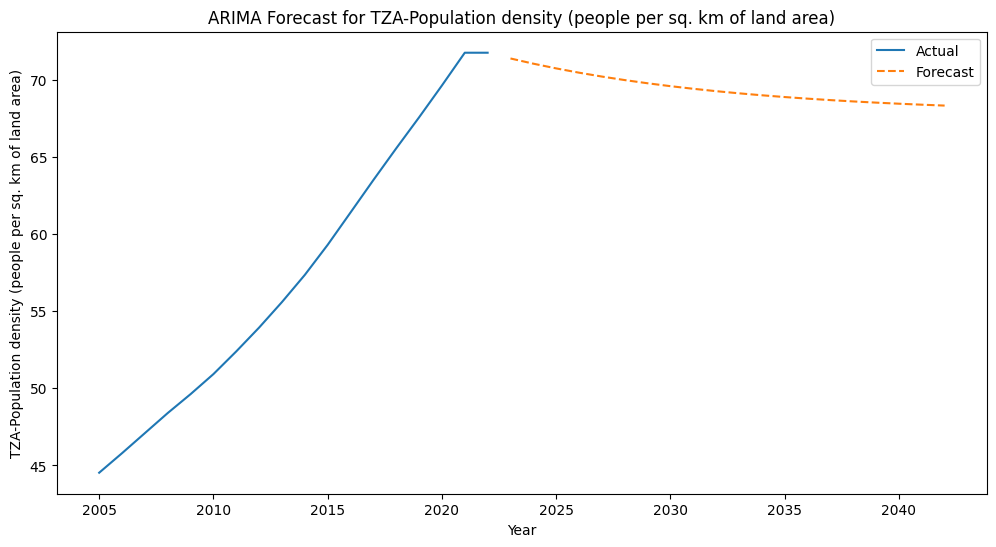

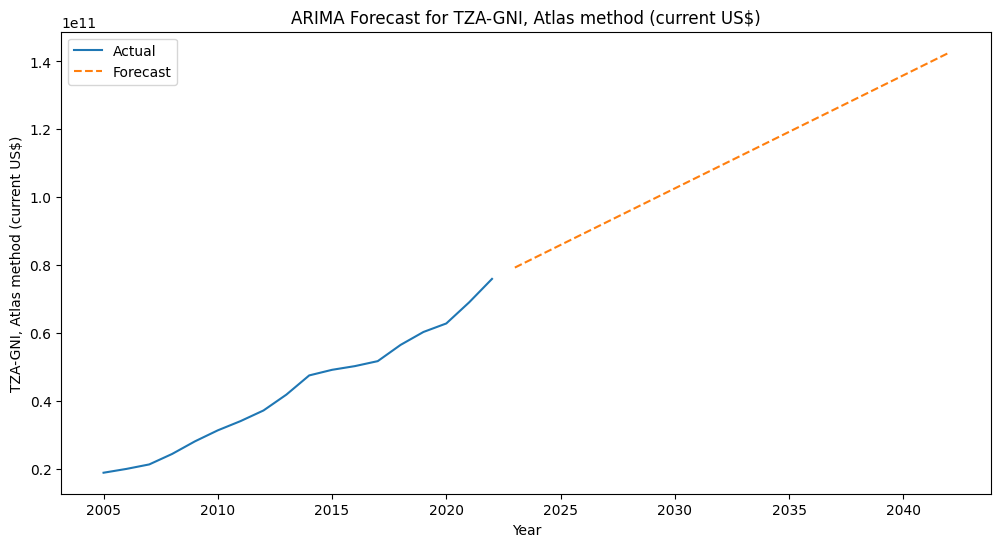

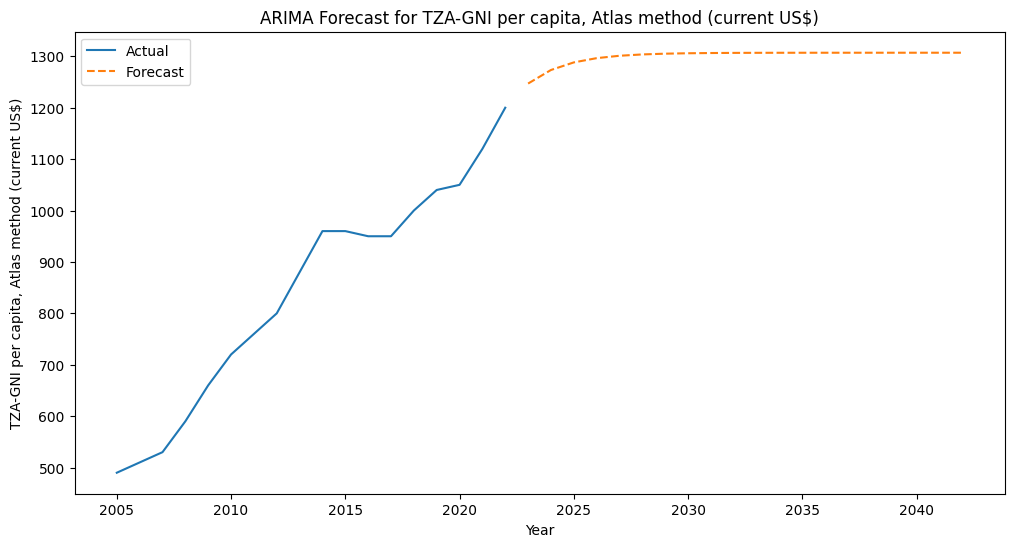

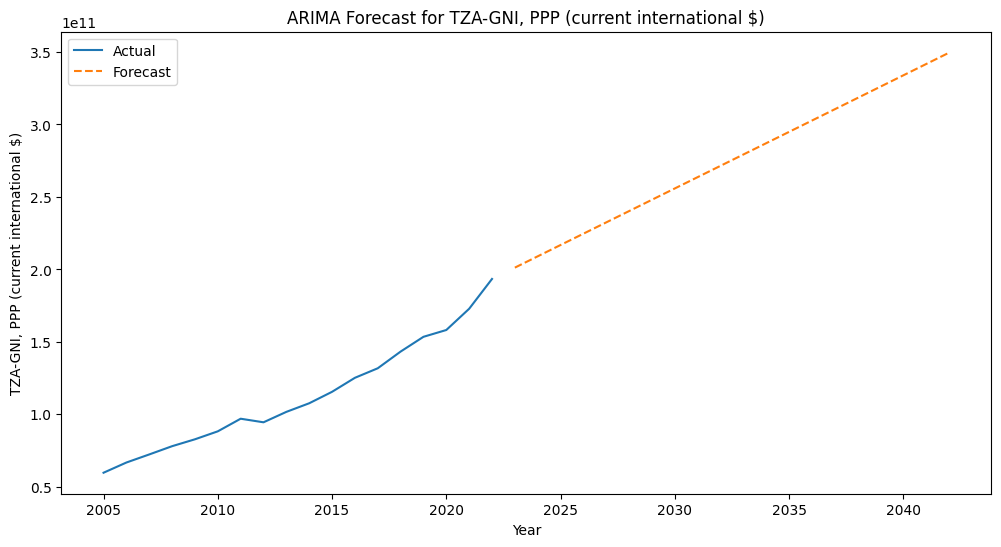

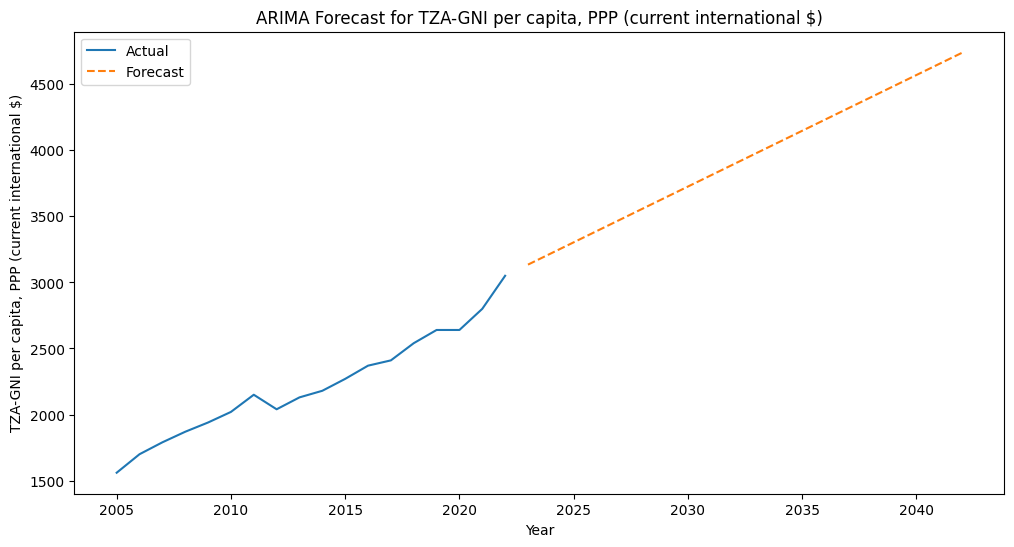

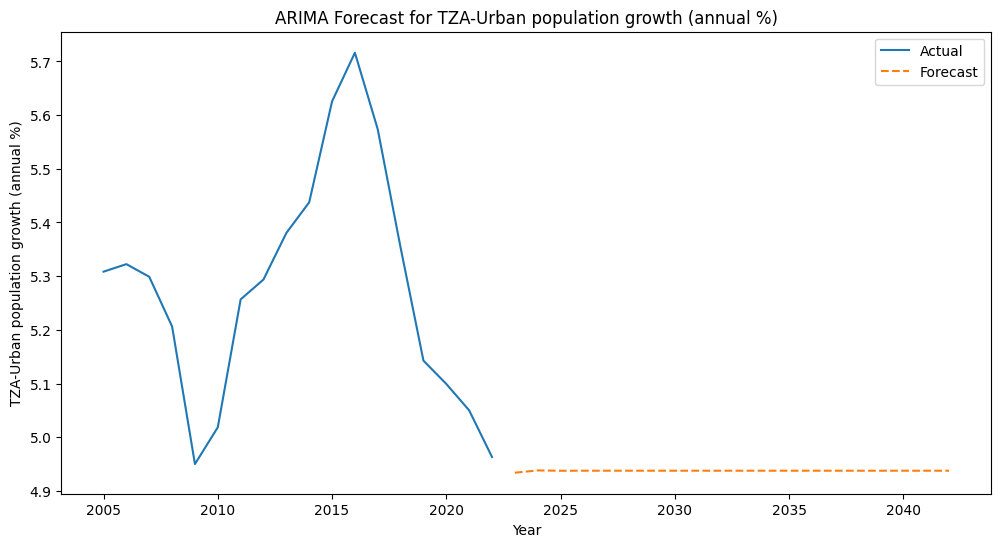

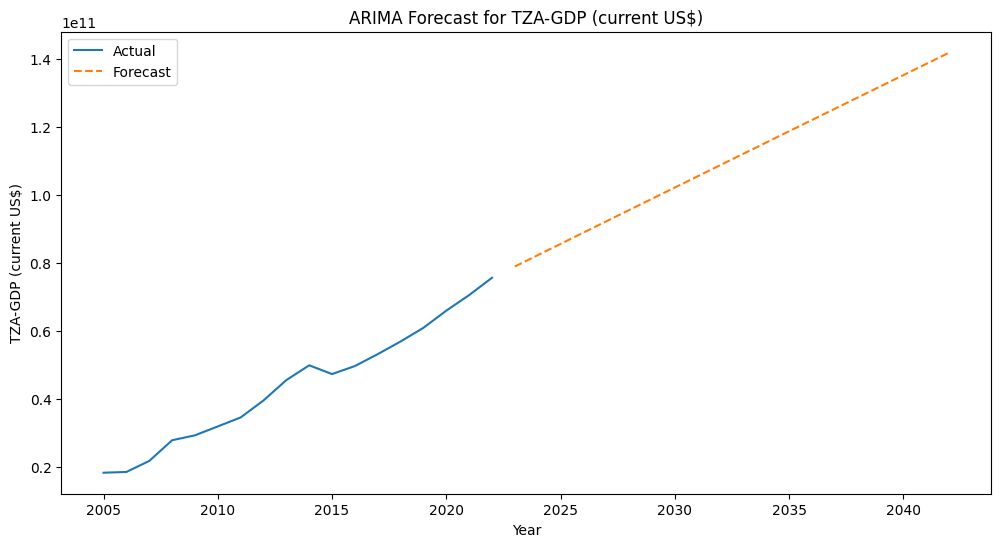

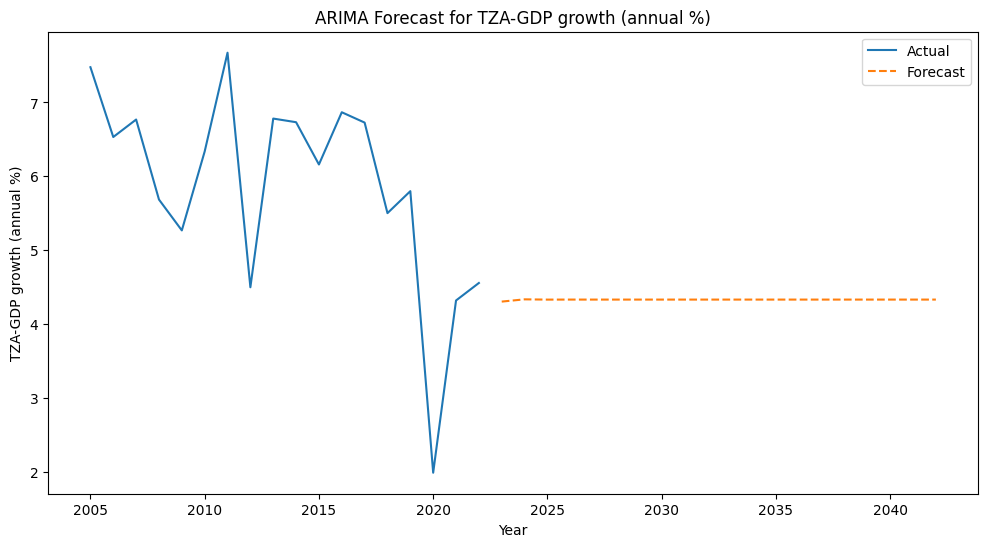

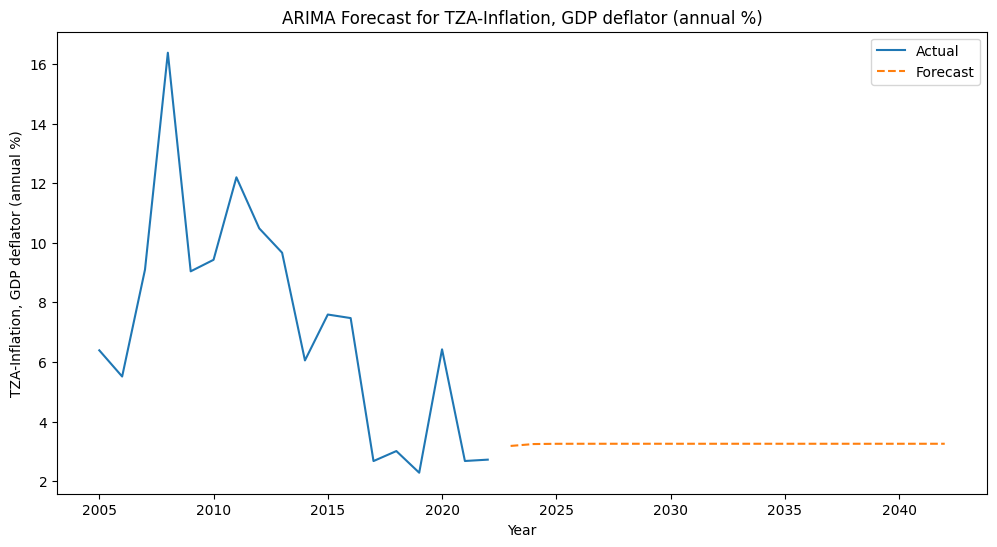

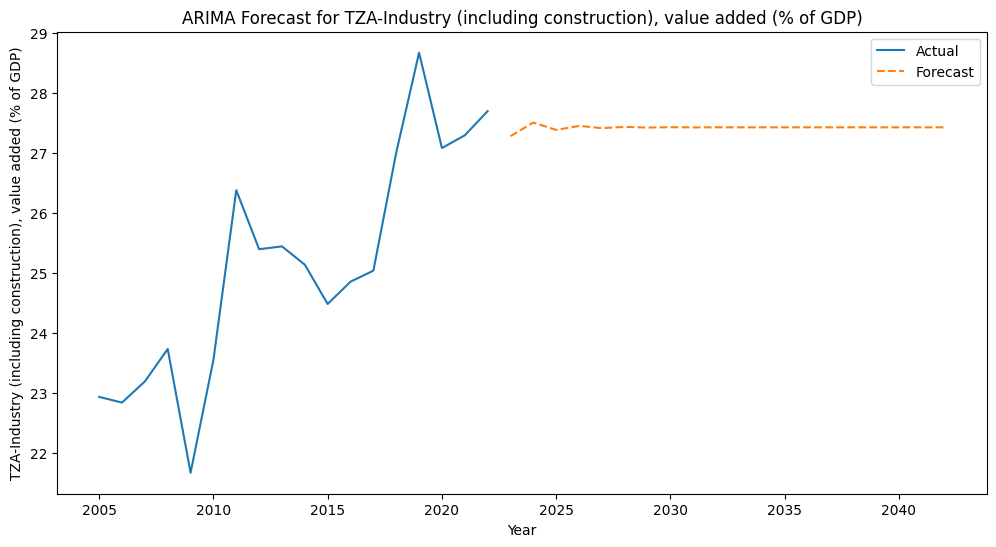

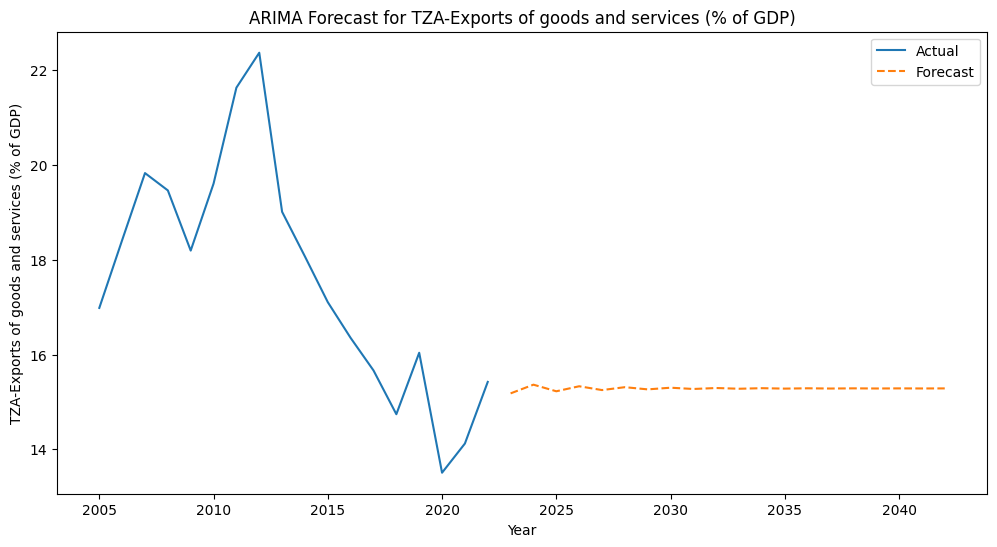

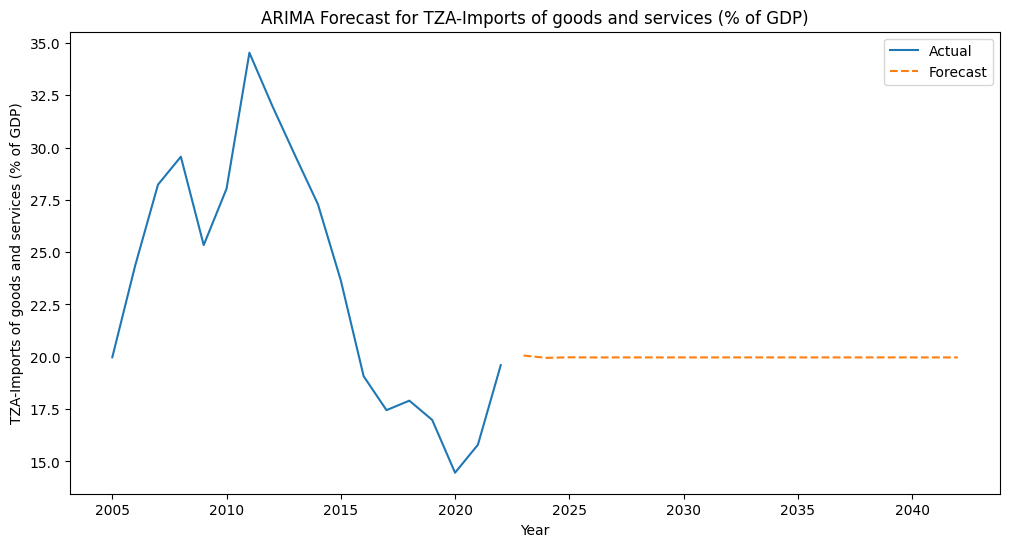

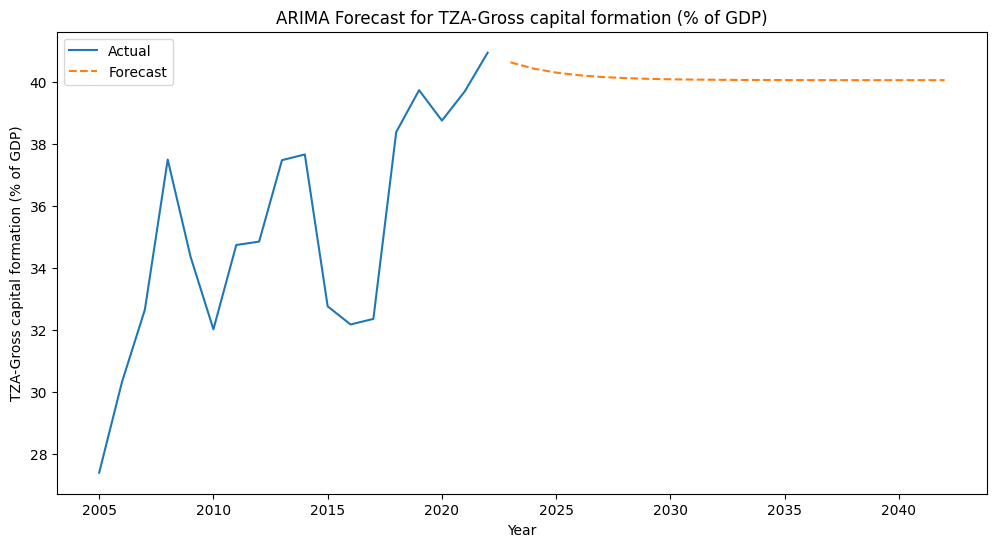

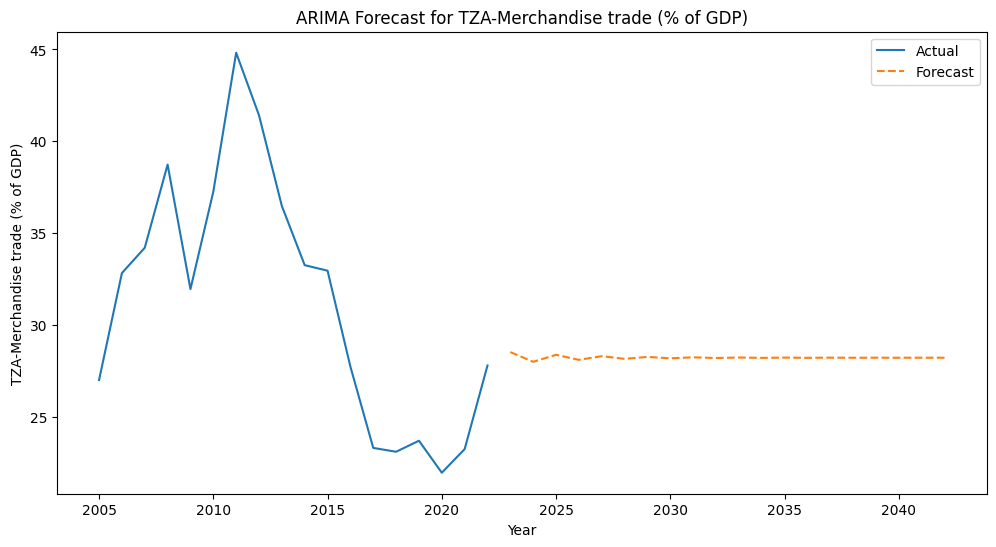

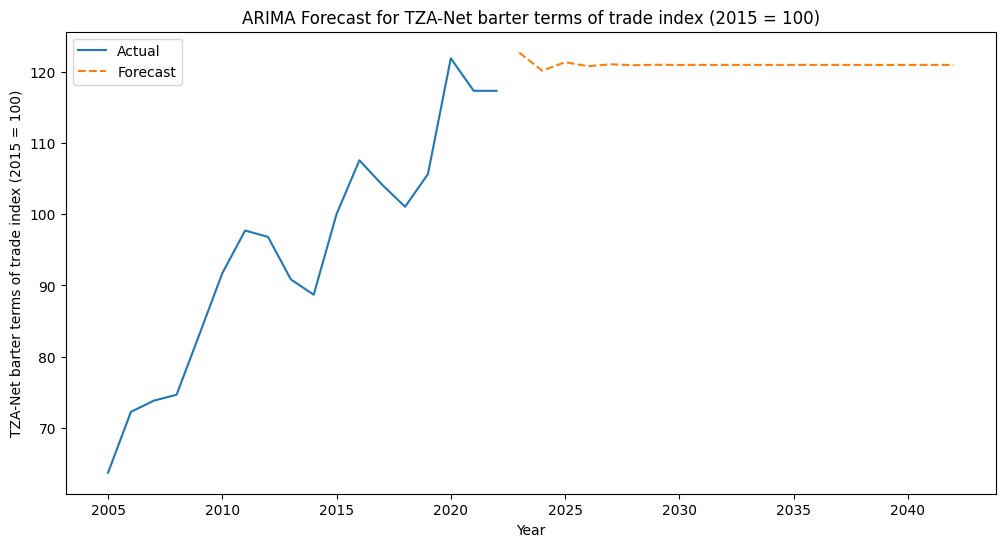

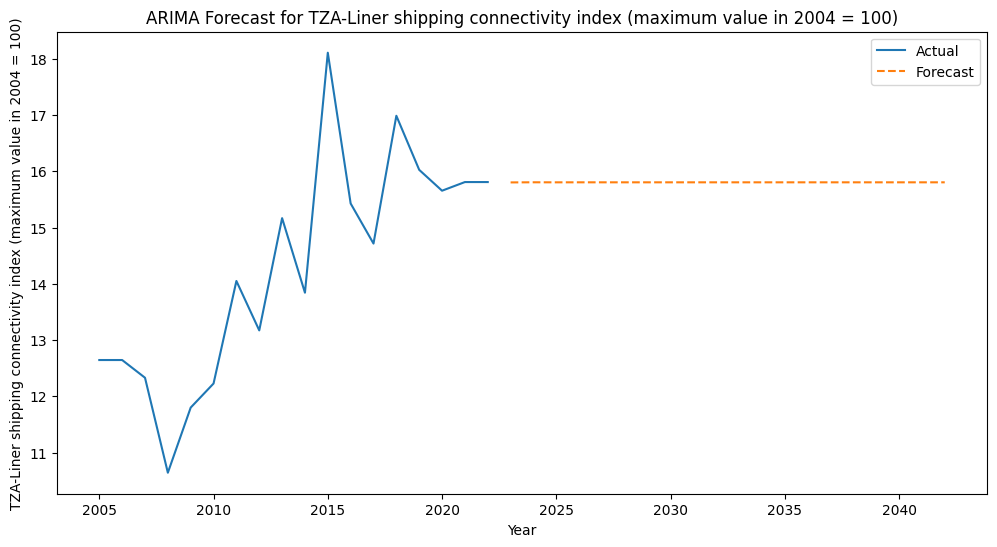

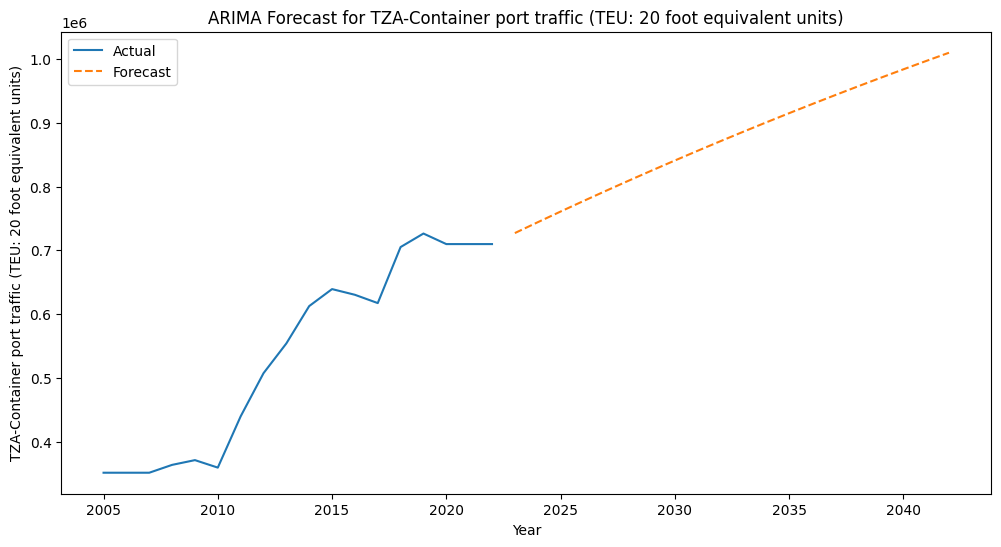

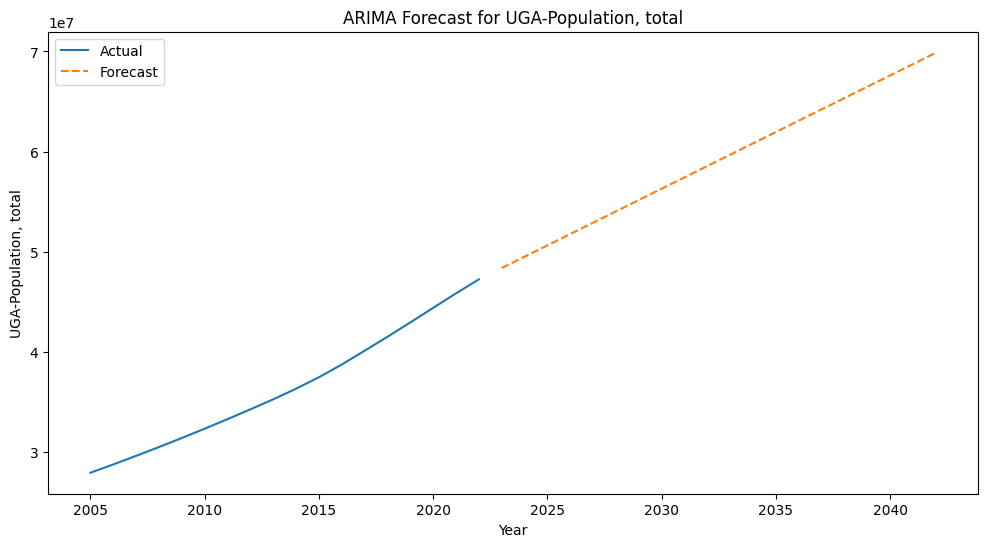

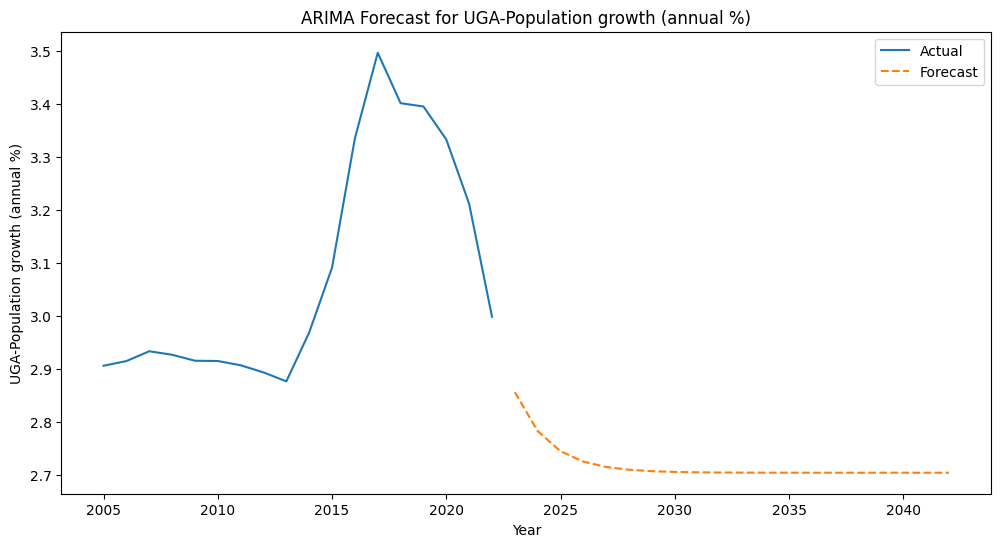

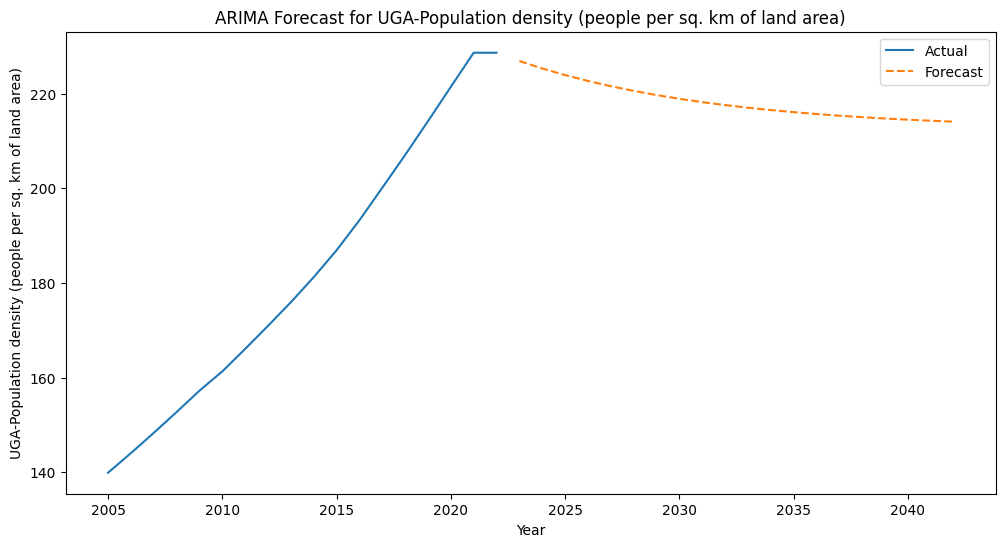

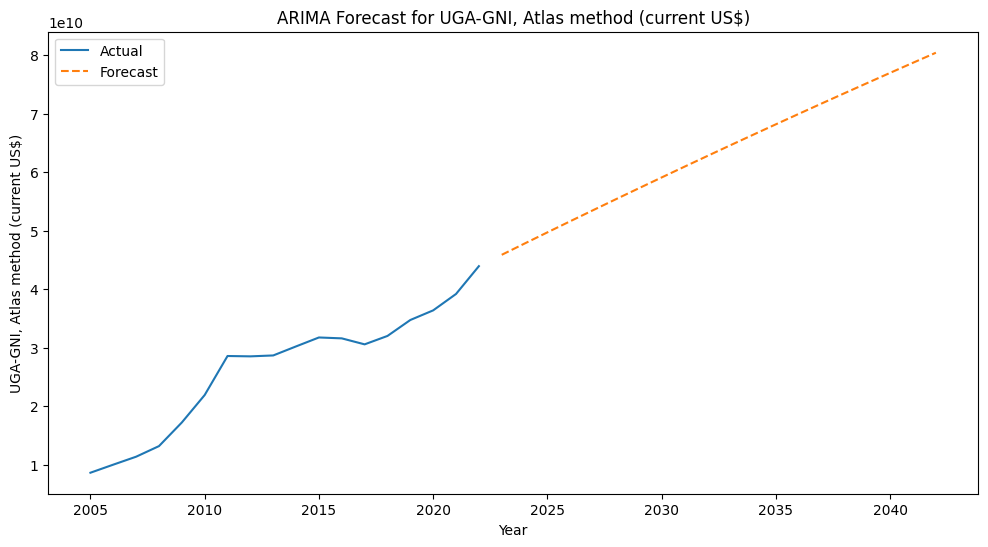

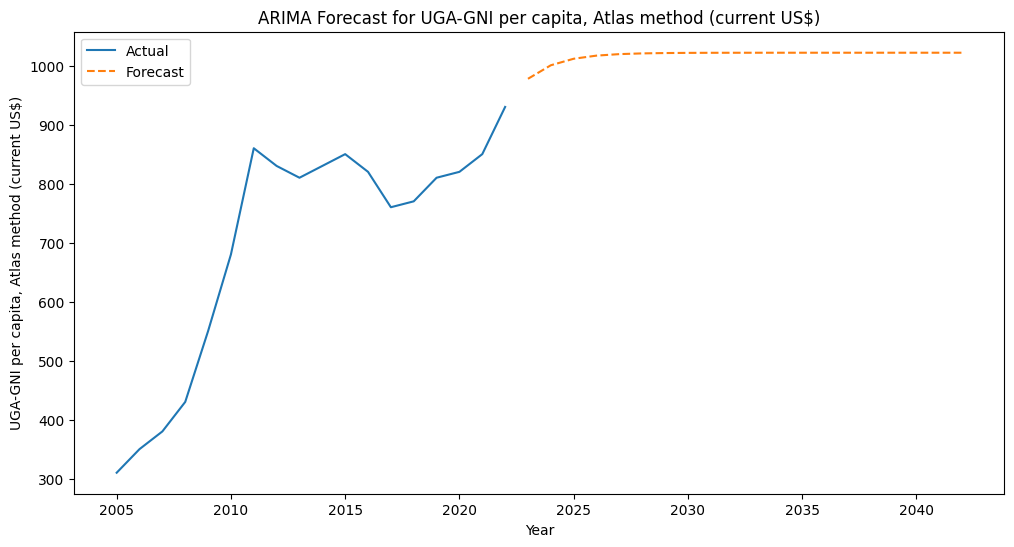

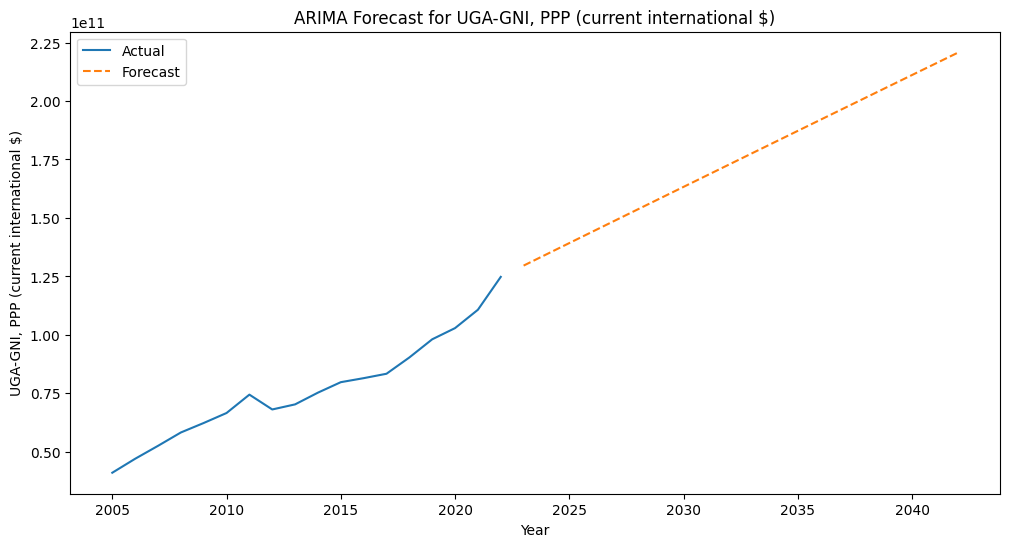

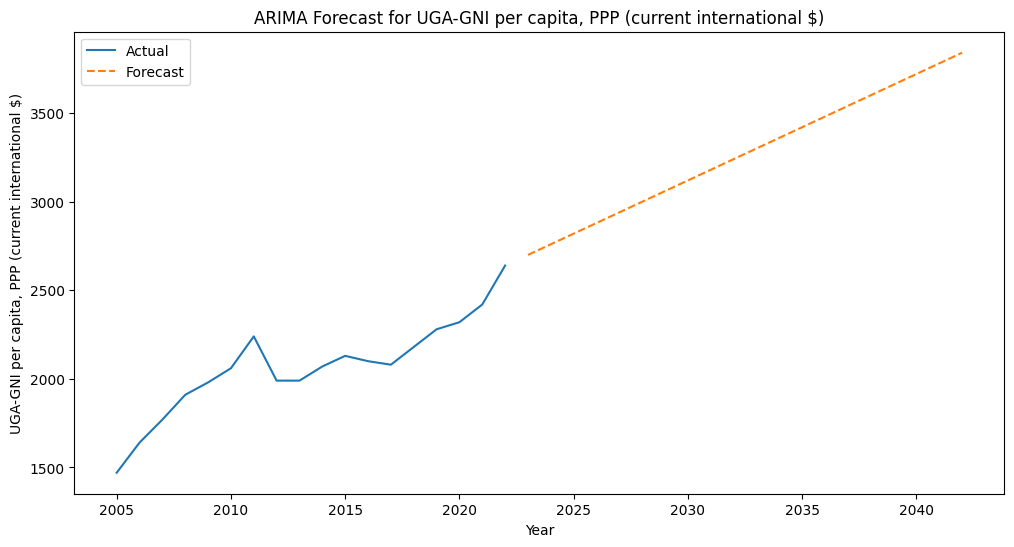

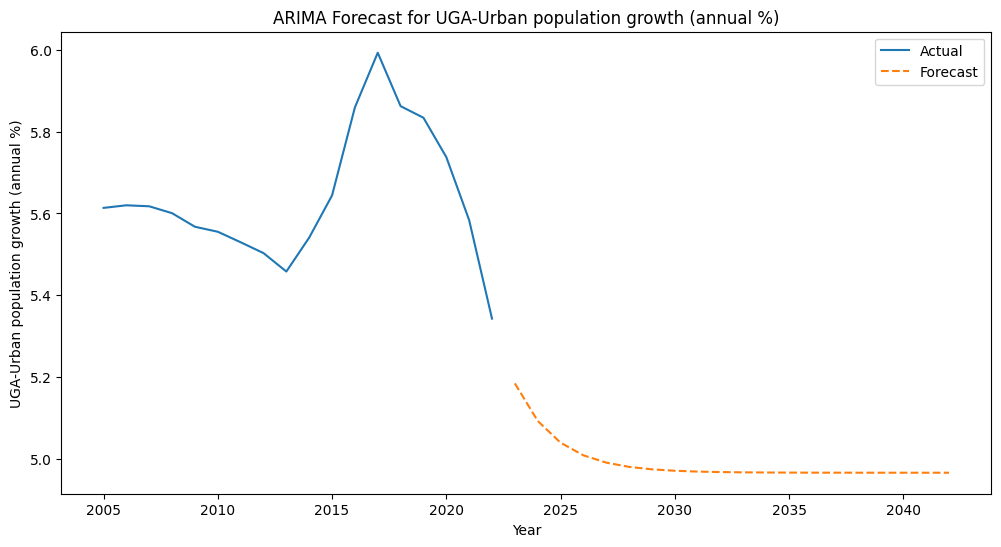

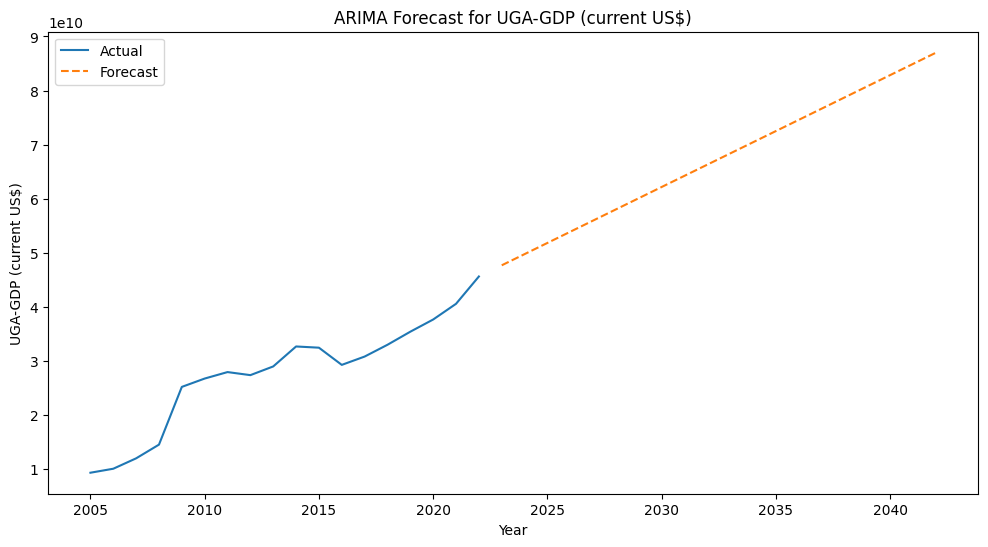

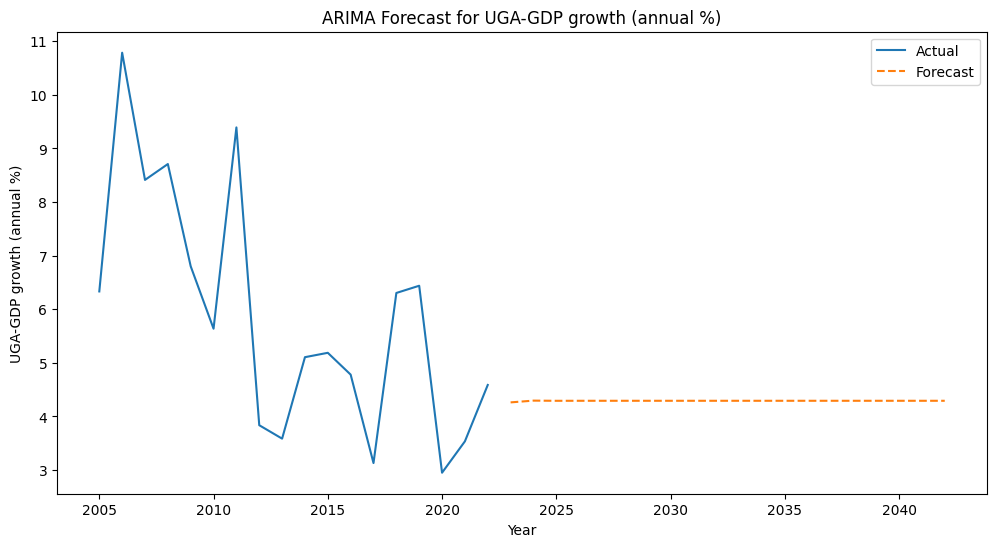

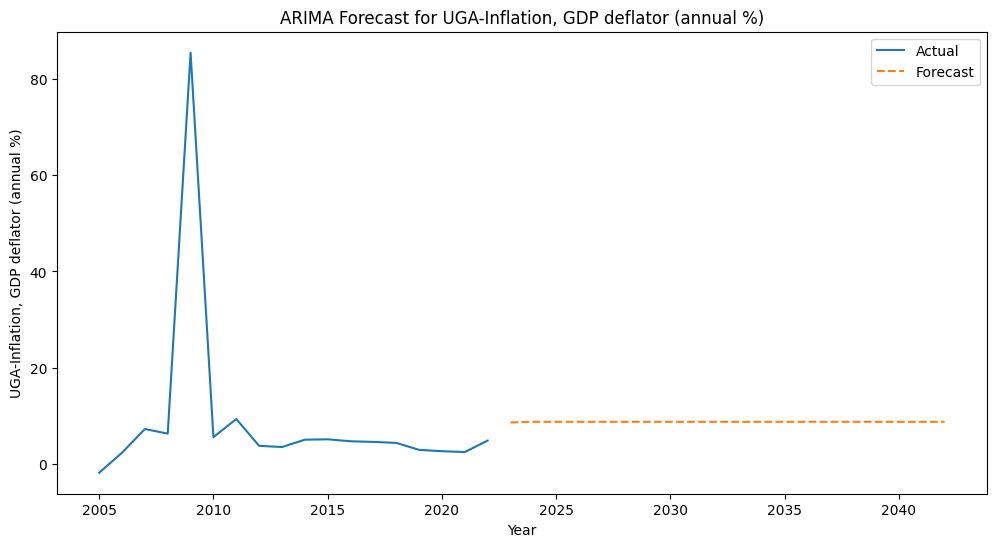

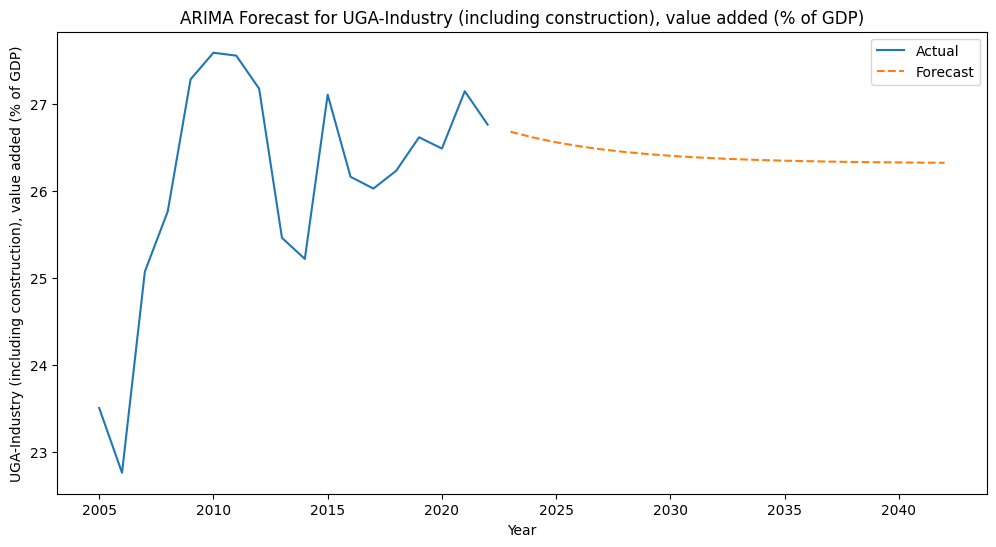

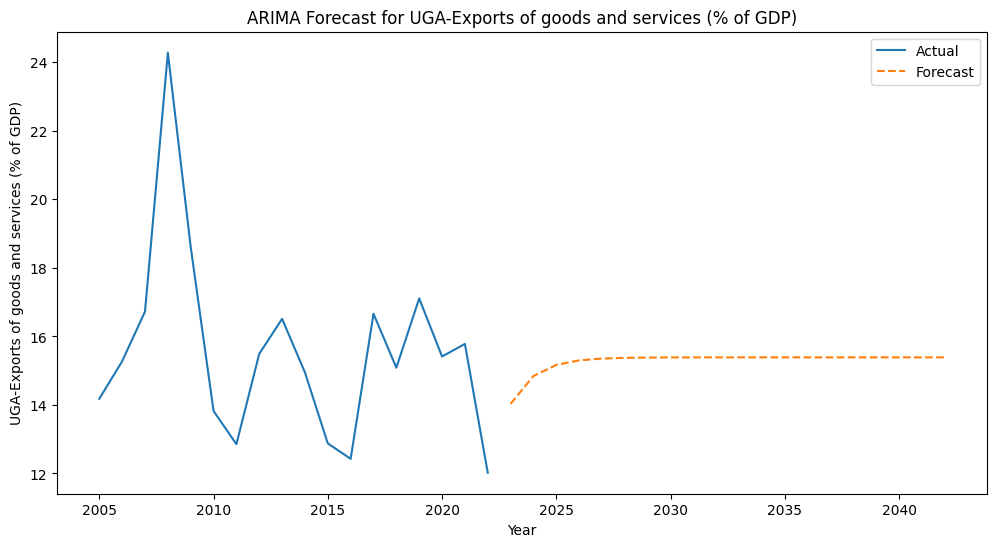

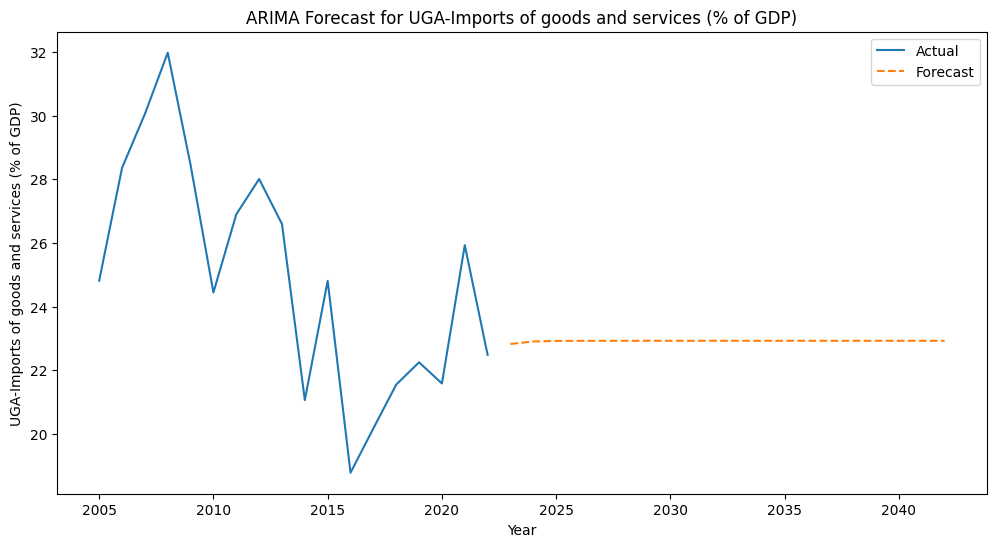

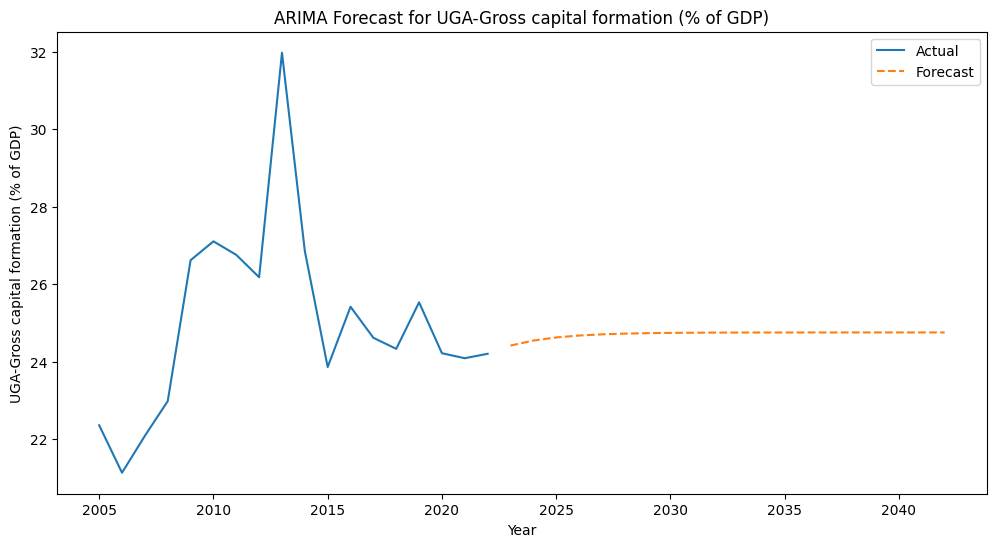

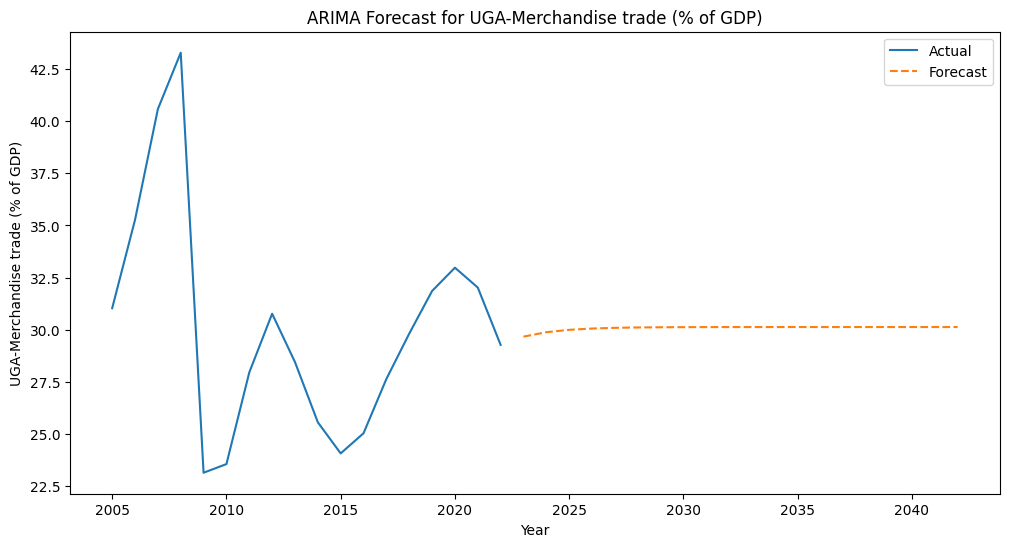

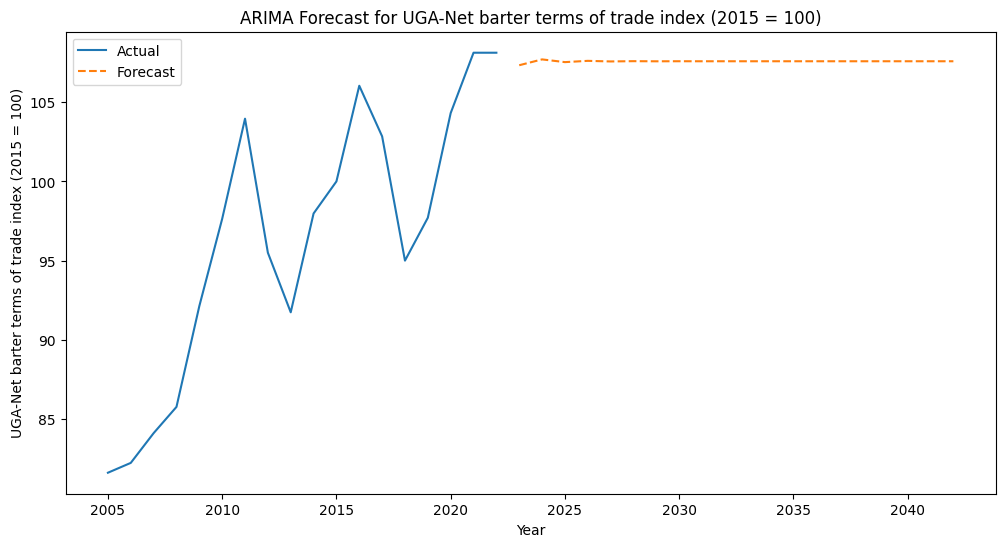

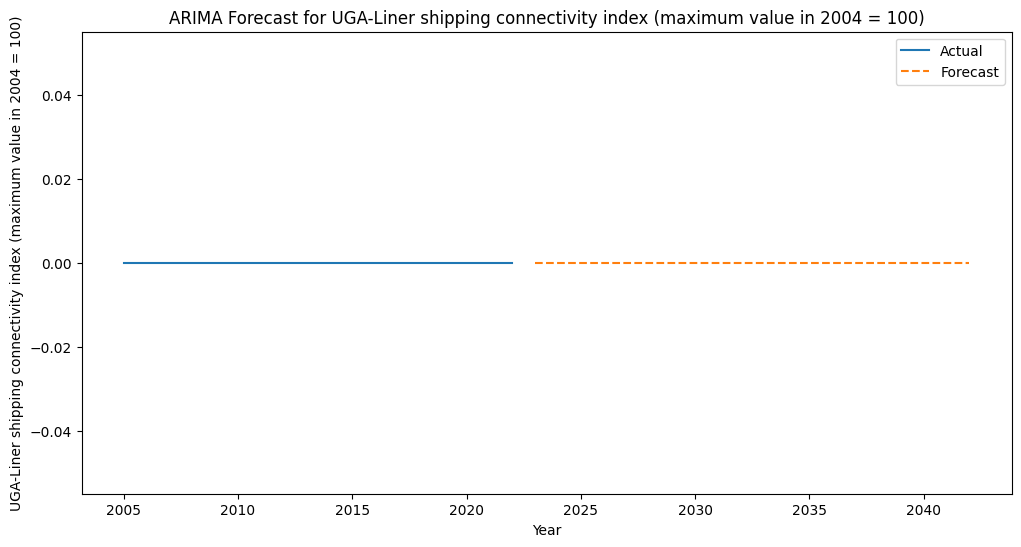

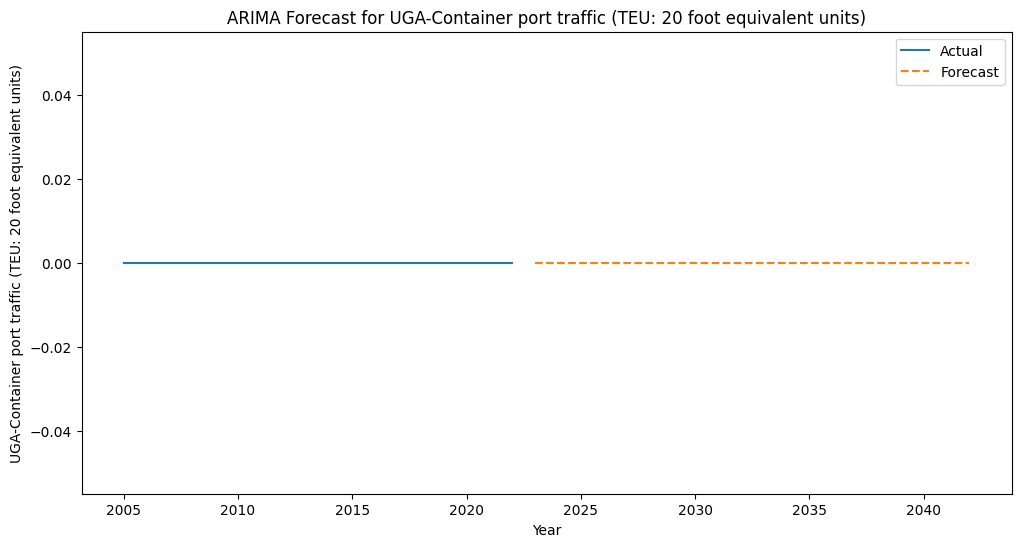

In [6]:
# Plot 3: Plots for each exogenous variable's ARIMA model forecast
for column in X.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df['Year'], df[column], label='Actual')
    plt.plot(range(2023, 2043), future_exog_predictions[column], label='Forecast', linestyle='dashed')
    plt.title(f'ARIMA Forecast for {column}')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.legend()
    plt.show()

In [ ]:
# Chapter 1: Introduction

# 1.1 Background

# Container port traffic is a crucial indicator for maritime trade and economic activities. Accurate forecasting of container port traffic is essential for efficient logistics and strategic planning. This doctoral thesis focuses on developing SARIMAX models for predicting container port traffic, utilizing exogenous variables related to economic and demographic factors.

# 1.2 Research Objectives

# The primary objectives of this research are to develop accurate time series forecasting models for container port traffic and to explore the impact of exogenous variables on the predictions. The SARIMAX model, combining autoregressive integrated moving average (ARIMA) and exogenous factors, is employed for this purpose.

# Chapter 2: Literature Review

# 2.1 Time Series Forecasting

# A comprehensive review of time series forecasting techniques, including ARIMA and SARIMAX models, is presented. Previous studies on container port traffic forecasting and the incorporation of exogenous variables are discussed. The significance of considering economic and demographic factors for accurate predictions is emphasized.

# Chapter 3: Methodology

# 3.1 Data Collection

# The dataset consists of economic and demographic variables for several countries, with a focus on container port traffic. Exogenous variables such as population, GDP, and inflation rates are considered.

# 3.2 SARIMAX Modeling

# The SARIMAX model is employed to predict container port traffic. The target variable 'container_port_traffic' is modeled based on exogenous variables (X), and the parameters (p, d, q) and seasonal parameters are set to (1, 1, 1) and (1, 1, 1, 12) respectively.

# Chapter 4: Results and Analysis

# 4.1 SARIMAX Model Fitting

# The SARIMAX model is fitted using the provided code, and an abnormal termination in the L-BFGS-B code is observed during the optimization process. This termination may indicate issues with function or gradient evaluation, emphasizing the need for careful model tuning and evaluation.

# 4.2 Exogenous Variable Impact

# ARIMA models are fitted for each exogenous variable, and future predictions are generated. The SARIMAX model is then trained, incorporating these predictions as exogenous variables. The forecasted container port traffic values and confidence intervals are obtained for the next 20 years.

# Chapter 5: Discussion

# 5.1 Model Evaluation

# The abnormal termination in the optimization process raises concerns about the stability of the SARIMAX model. Further investigation into parameter tuning and data preprocessing is recommended to improve model performance.

# 5.2 Exogenous Variable Insights

# The impact of each exogenous variable on container port traffic is examined. Insights into how economic and demographic factors influence port traffic are discussed, providing valuable information for policymakers and stakeholders in the shipping industry.

# Chapter 6: Conclusion and Future Work

# 6.1 Summary

# Despite challenges in model optimization, the SARIMAX model demonstrates potential for container port traffic forecasting. The incorporation of exogenous variables enhances the model's predictive capabilities.

# 6.2 Future Work

# Future research should focus on addressing the optimization issues observed and refining the model. Additionally, the inclusion of more sophisticated machine learning models and a broader set of exogenous variables may further enhance the accuracy of container port traffic predictions.

